In [1]:
#test2: with outliers (>Q3 + 1.5 IQR, < Q1 - 1.5IQR) removed before normalization
#test 2 + 
#1. Signed curvature computed (instead of absolute value) i.e. sign determined by direction
#2. Smoothing signed curvature
#3. Taking absolute value of signed curvature 
# For this modified curvature the next steps as always (sigmoid normalisation and comp BDD)
#for test 10: if sd < 1 then set sd = 1
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [2]:
FR_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results11/FR_test_higher/Results_BDD.csv")
FR_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results11/FR_test_lower/Results_BDD.csv")
density_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results11/density_test_higher/Results_BDD.csv") 
density_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results11/density_test_lower/Results_BDD.csv")

In [3]:
#some data cleaning
FR_high_sequence = []
for i in range(24, 240, 4):
    FR_high_sequence.append(i)
    
FR_test_high.columns = FR_high_sequence
FR_test_high['curve_no'] = list(range(0,50))
FR_test_high = FR_test_high.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_high.sort_values(by=['curve_no','FR'],inplace=True)

FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
FR_test_low.columns = FR_low_sequence
FR_test_low['curve_no'] = list(range(0,50))
FR_test_low = FR_test_low.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_low.sort_values(by=['curve_no','FR'],inplace=True)

In [4]:
density_high_sequence = list(range(15, 30, 1))

#density values copied from the Results_variables.json file 
    
density_test_high.columns = density_high_sequence
density_test_high['curve_no'] = list(range(0,50))
density_test_high = density_test_high.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_high.sort_values(by=['curve_no','density'],inplace=True)

density_low_sequence = list(range(1, 15, 1))
    
density_test_low.columns = density_low_sequence
density_test_low['curve_no'] = list(range(0,50))
density_test_low = density_test_low.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_low.sort_values(by=['curve_no','density'],inplace=True)

In [5]:
density_test = pd.concat([density_test_low, density_test_high])
FR_test = pd.concat([FR_test_low, FR_test_high])

In [6]:
#assume we're given a data frame with 3 columns: 'curve_no', 'FR'/'RES', 'Value' (BDD) 
#important: if the data frame = 2 data frames merged then rememember not to double-count values for curves with meanVAR
#even if double counting it shouln't affect the outcome (only the number of curves will be greater)

def plotBDDforVar (data_Vartest, Var, meanVar):
    n_values = data_Vartest[Var].nunique()
    n_curves = int((len(data_Vartest.Value))/n_values) 
    colors = cm.rainbow(np.linspace(0, 1, 50))
    
    if Var == "FR":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.FR != meanVar]
            plt.scatter('FR','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. Frame Rate (frames/sec) for " + str(n_curves) + " Randomly Generated Curves")
    elif Var == "density":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.density != meanVar]
            plt.scatter('density','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. pixel density (px/mm) for " + str(n_curves) + " Randomly Generated Curves")
    else:
        print("The variable must be either FR (Frame Rate) or RES (Resolution)")
        

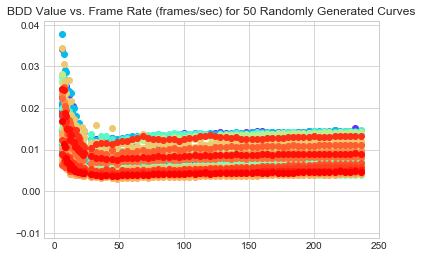

In [7]:
plotBDDforVar(FR_test, "FR", 24)

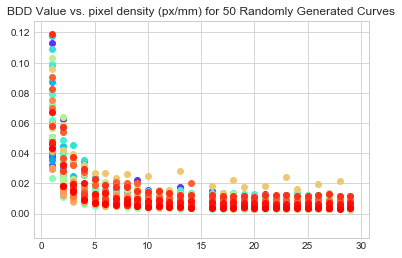

In [8]:
plotBDDforVar(density_test, "density", 15)

In [9]:
#plot curves separately 

def plotBDDforVarSep (var, meanVar, curves = range(50)):
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if var == "FR":
        for i, c in zip(curves, colors):
            data = FR_test[FR_test.curve_no == i]
            data = data[data.FR != meanVar]
            label = 'curve ' + str(i)
            xlab = 'FR' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x = 'FR', y = 'Value', data = data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    elif var == "density":
        for i in curves:
            data = density_test[density_test.curve_no == i]
            data = data[data.density != meanVar]
            label = 'density_test_curve ' + str(i)
            xlab = 'density' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x='density',y='Value', data= data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    else:
        print("There is no such variable as " + var)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


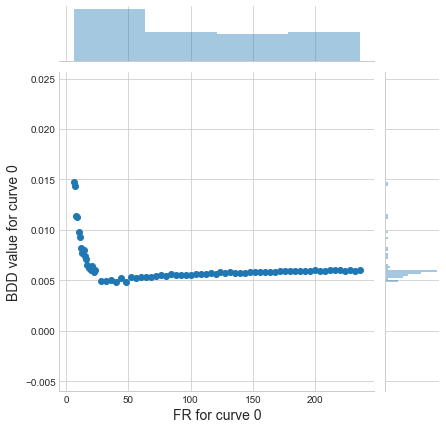

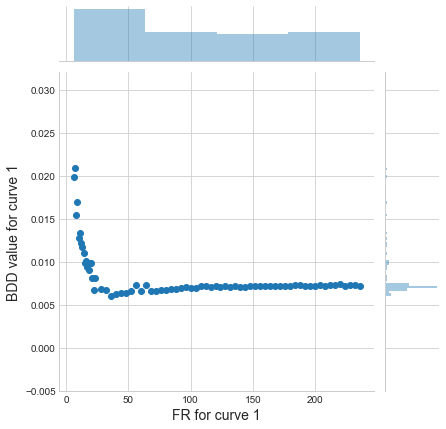

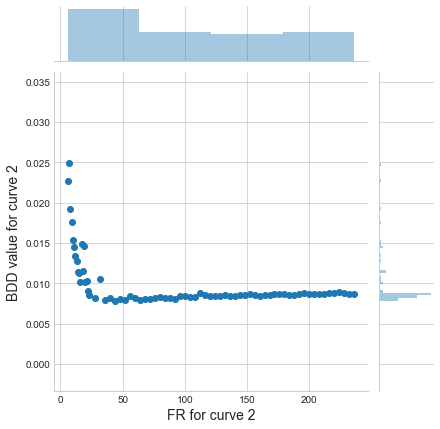

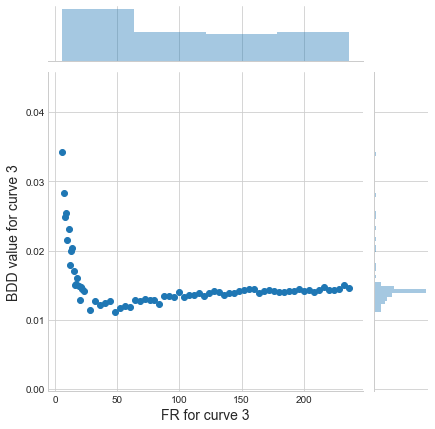

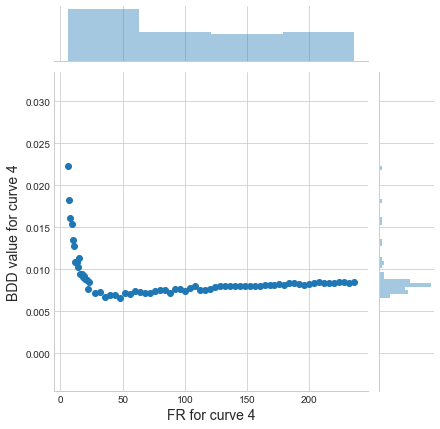

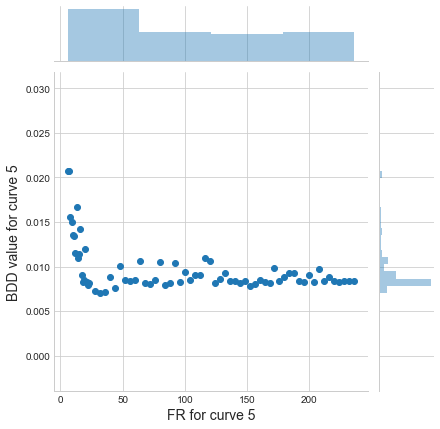

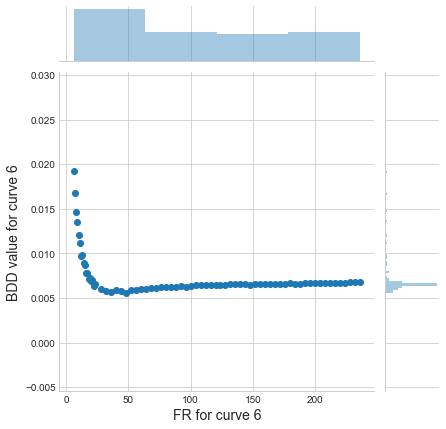

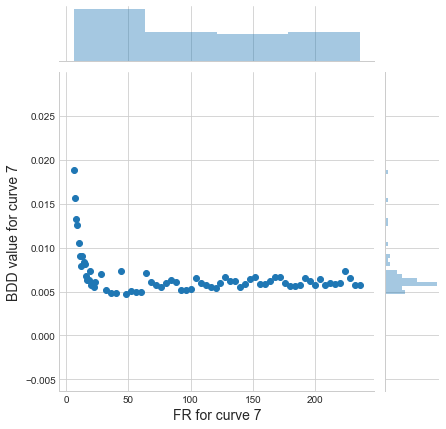

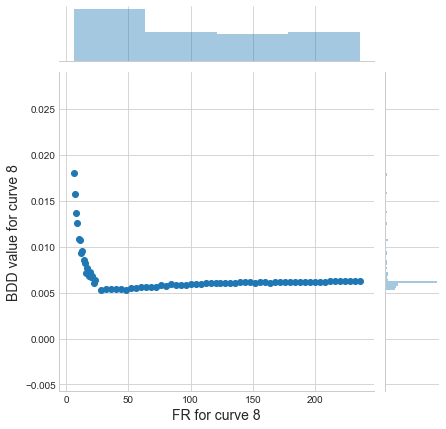

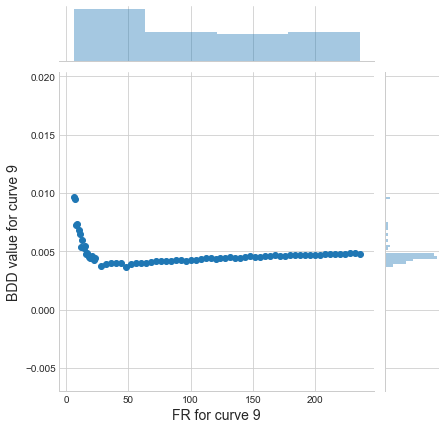

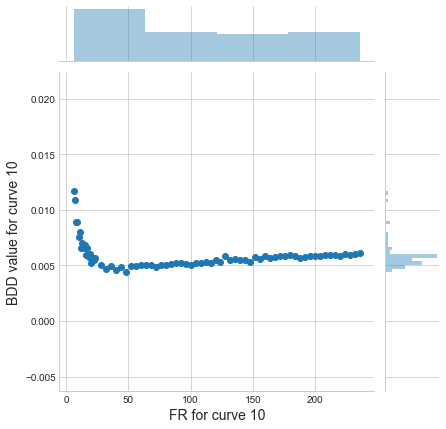

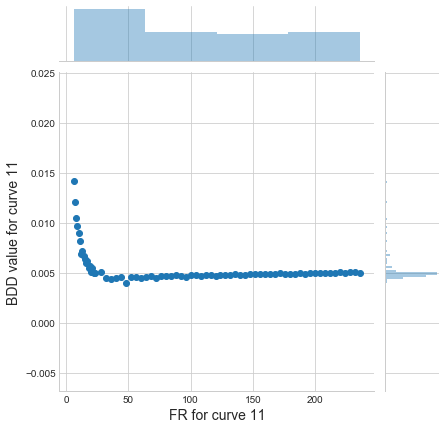

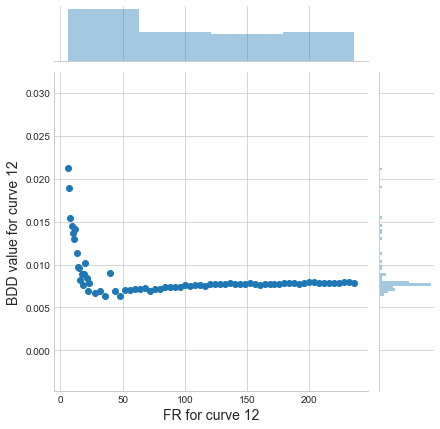

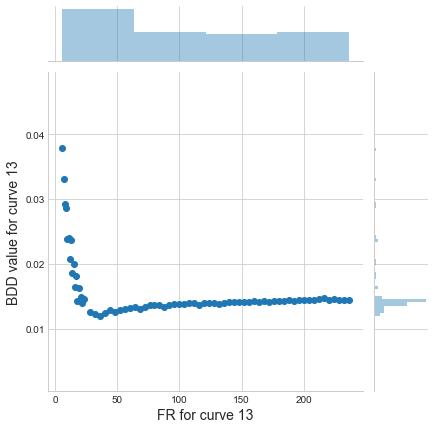

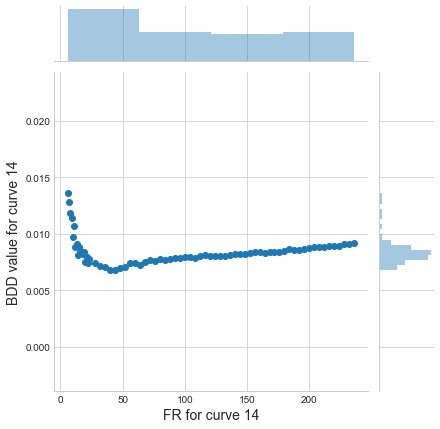

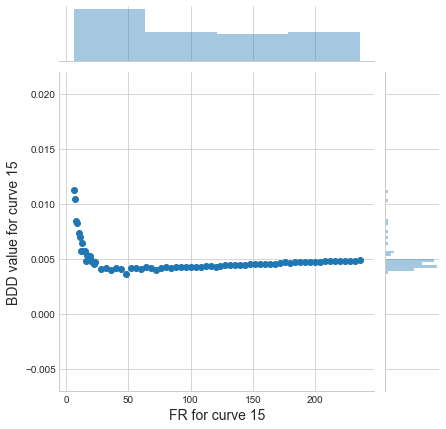

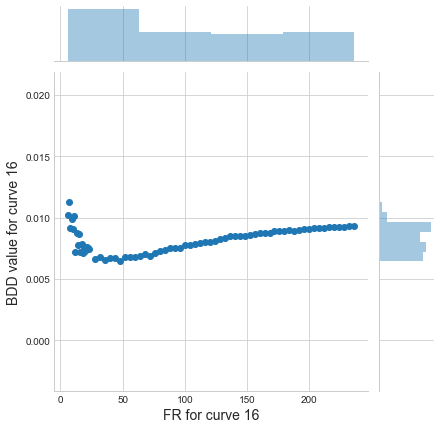

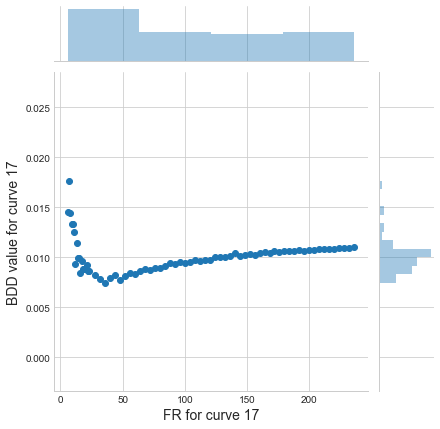

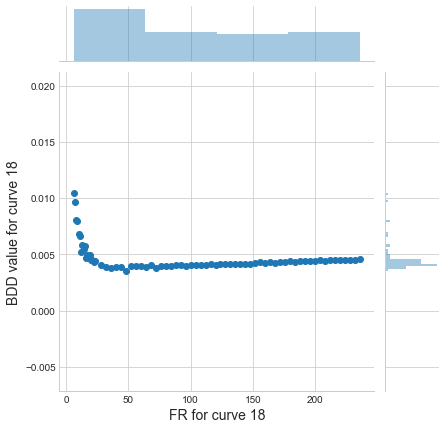

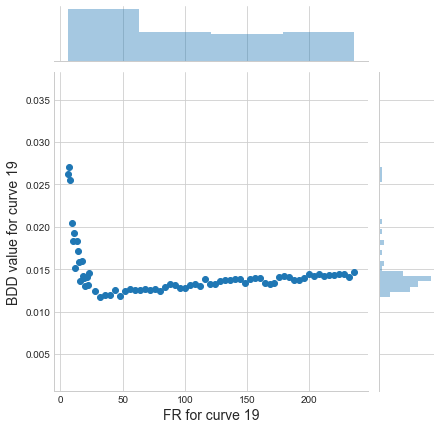

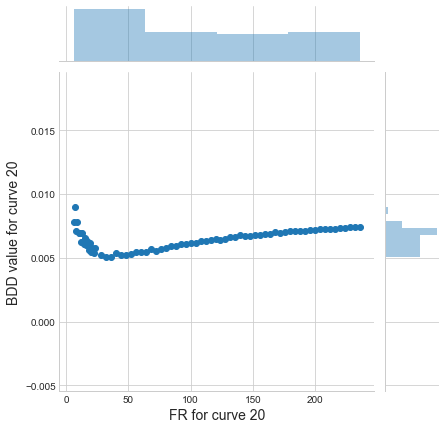

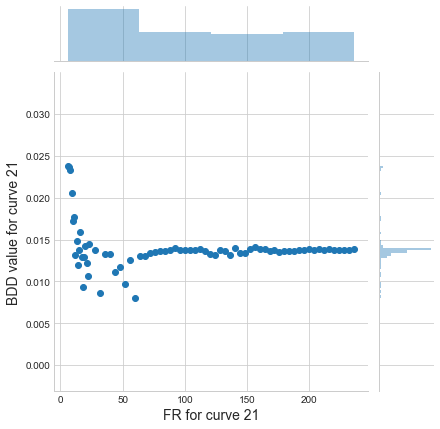

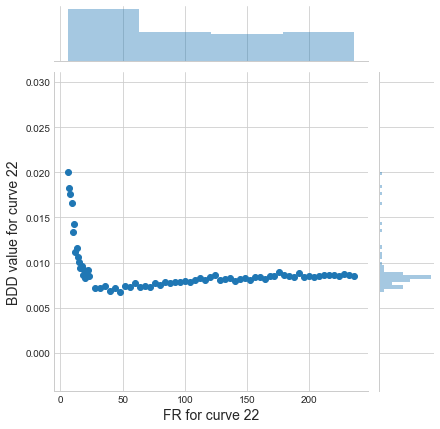

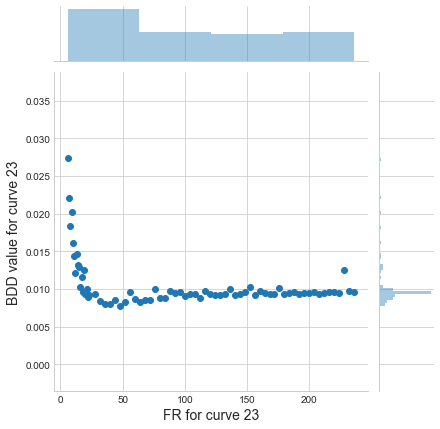

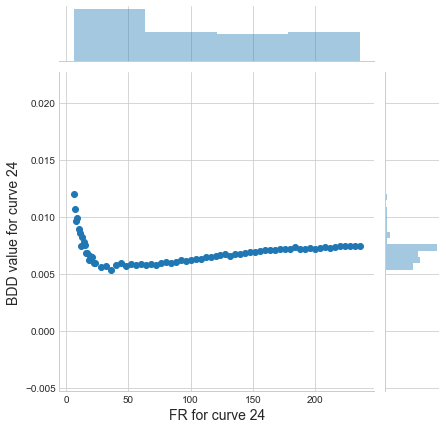

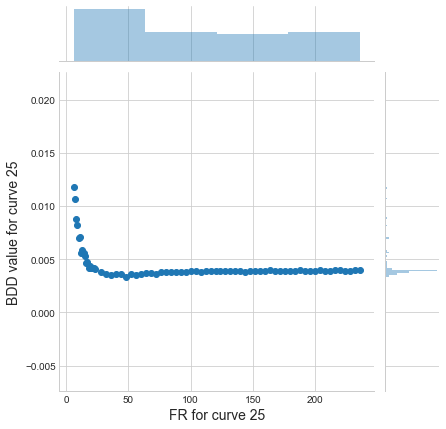

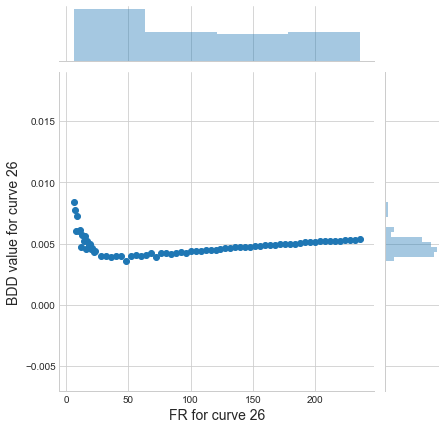

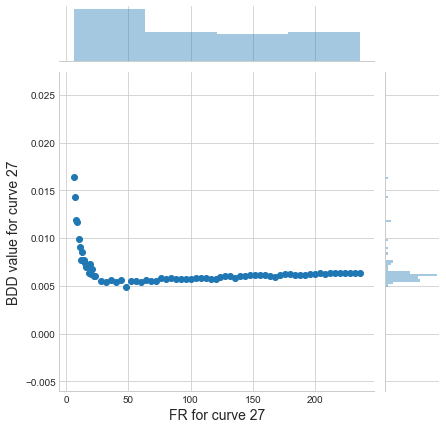

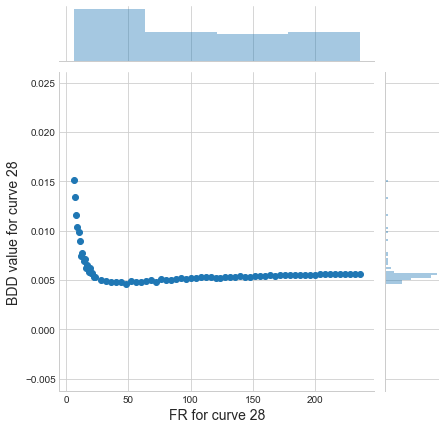

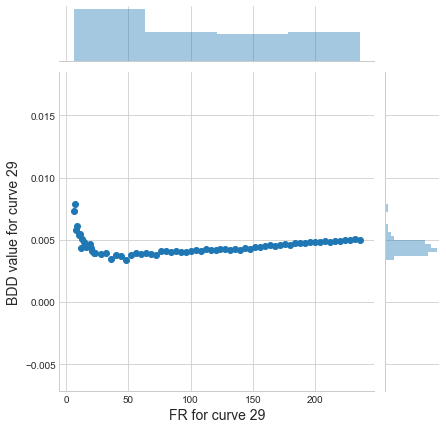

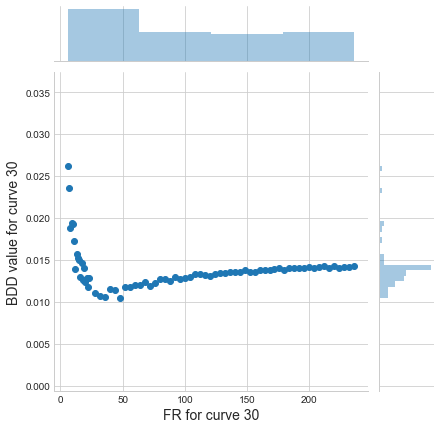

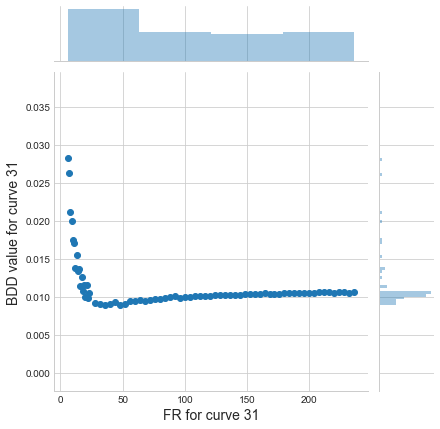

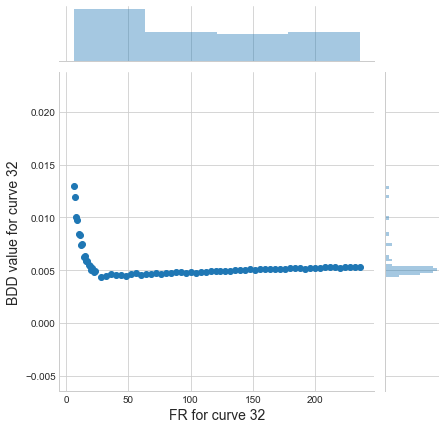

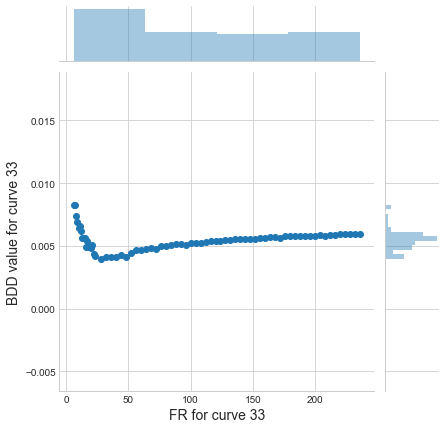

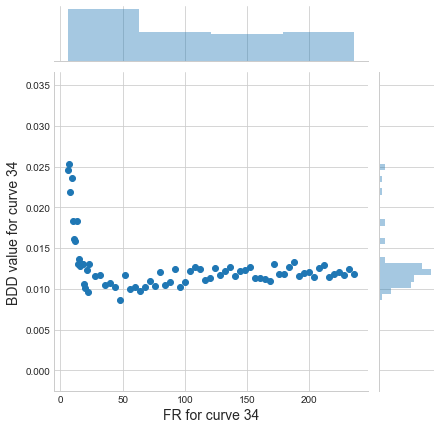

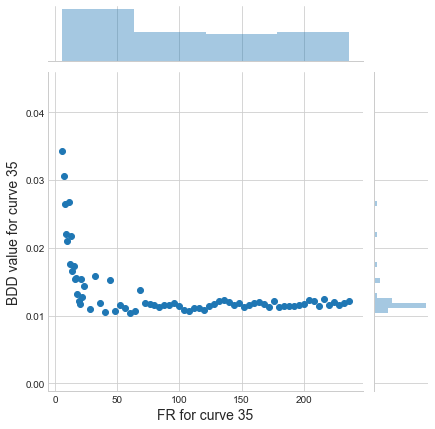

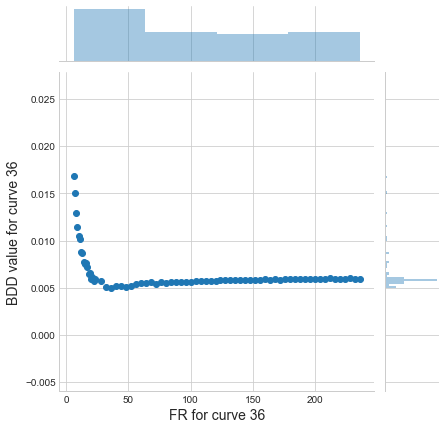

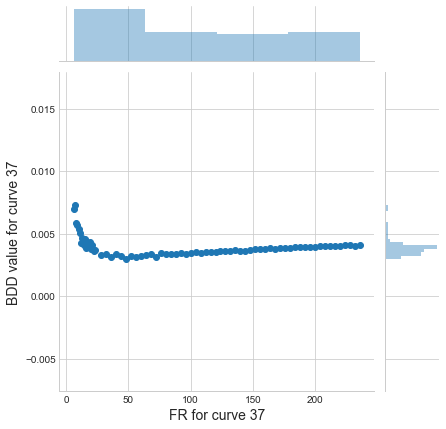

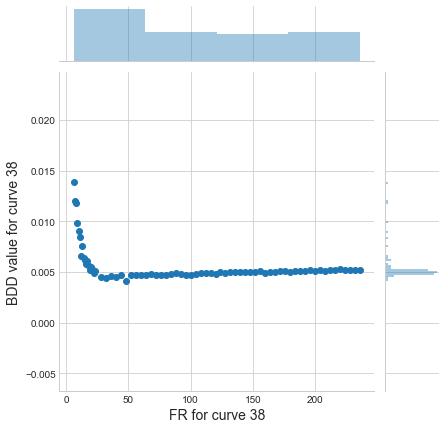

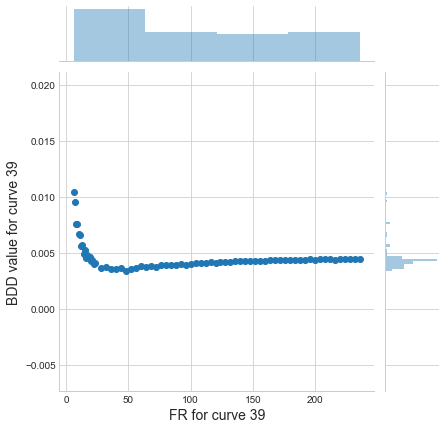

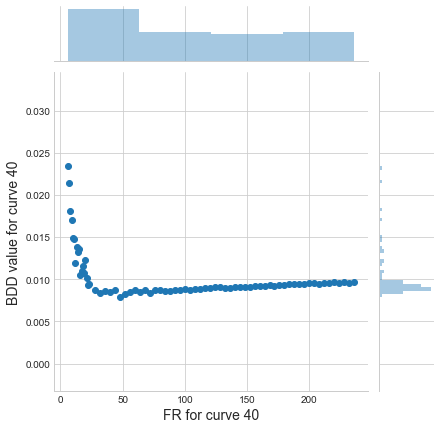

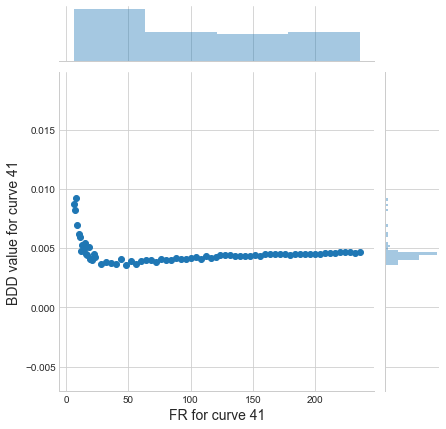

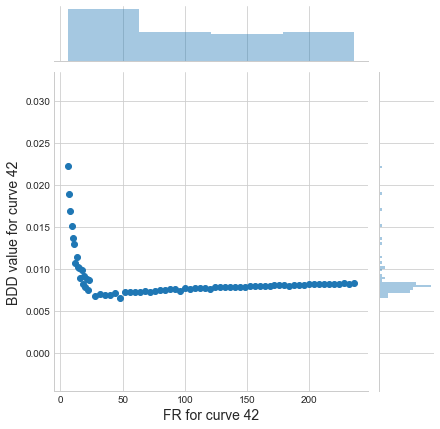

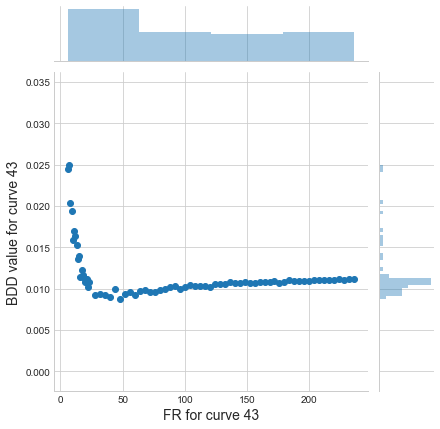

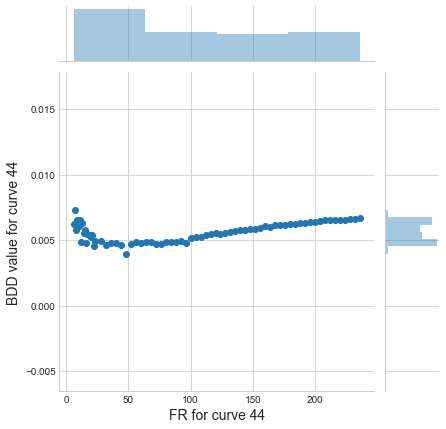

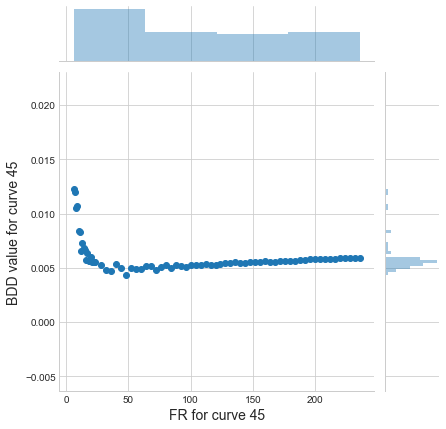

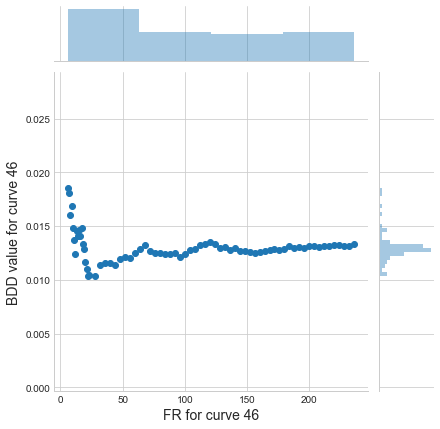

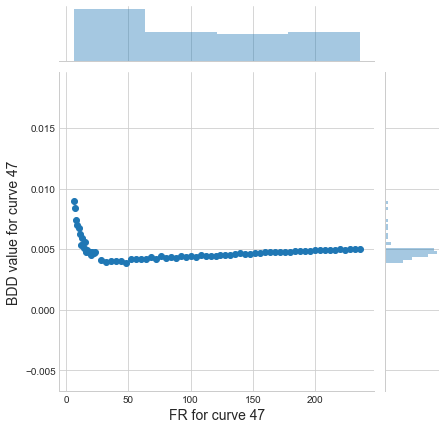

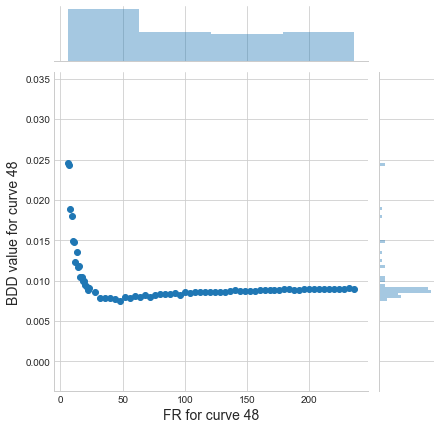

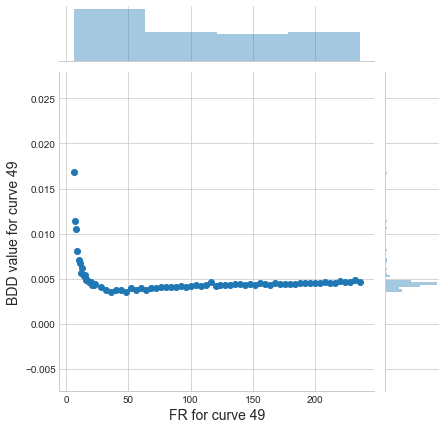

In [10]:
plotBDDforVarSep("FR", 24)
#outlier curves: 21, 34

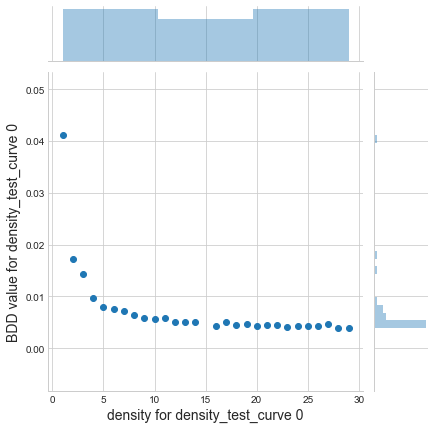

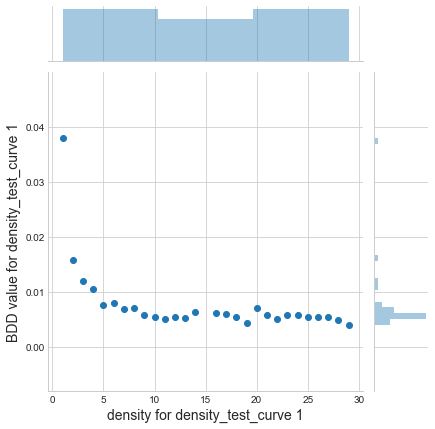

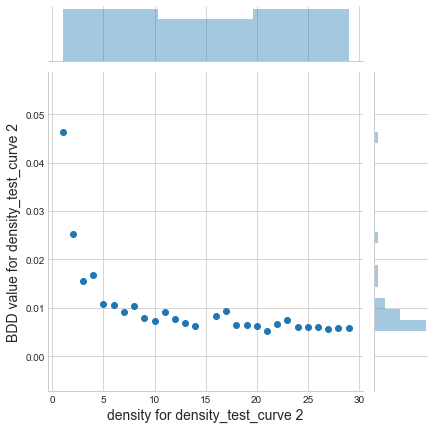

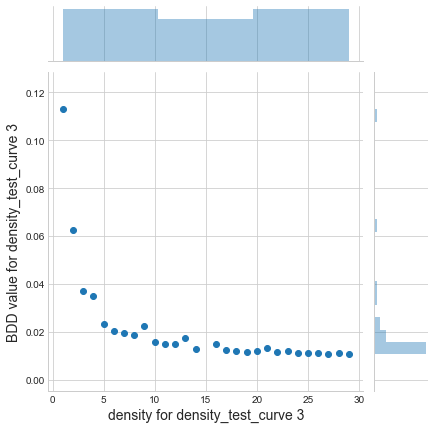

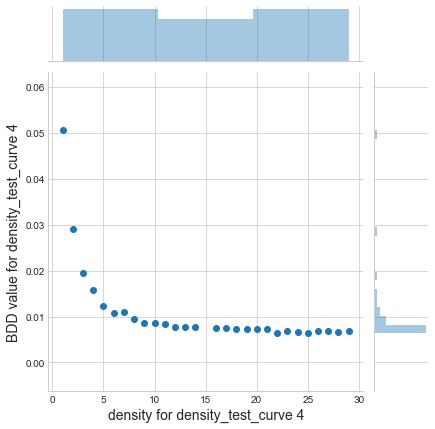

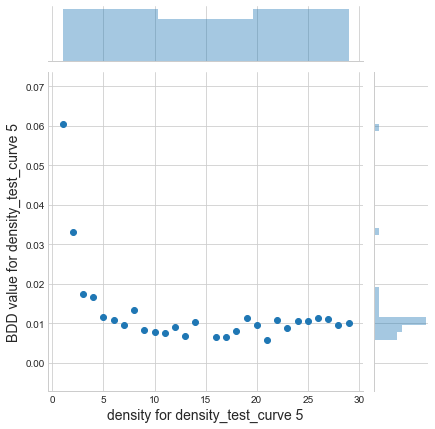

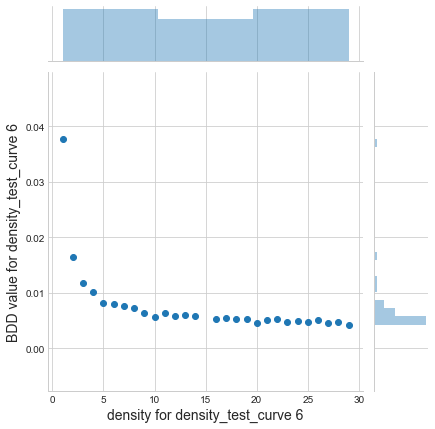

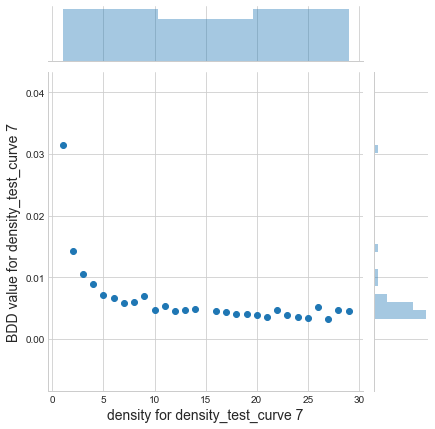

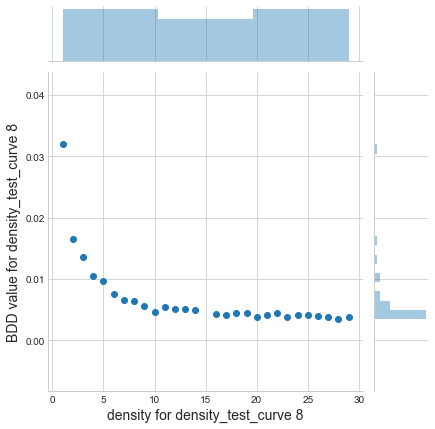

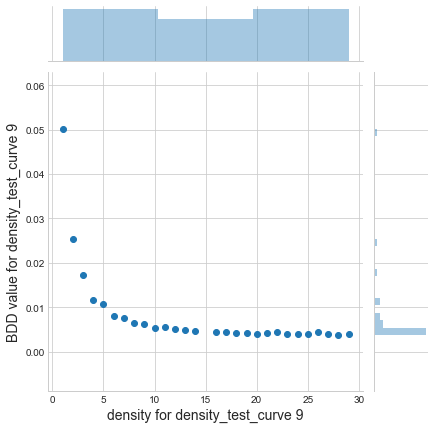

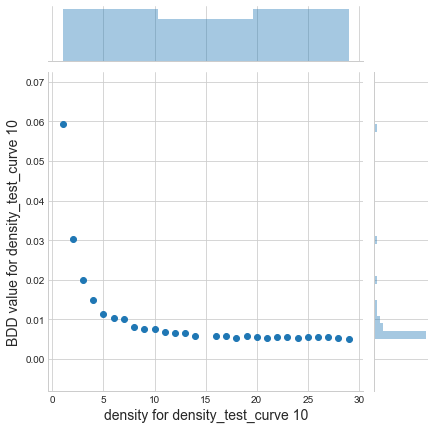

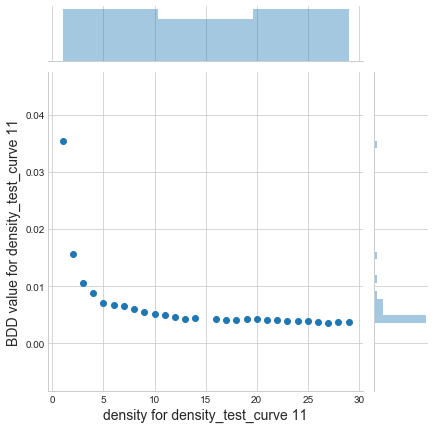

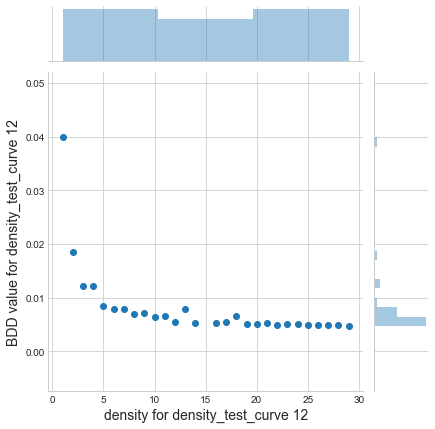

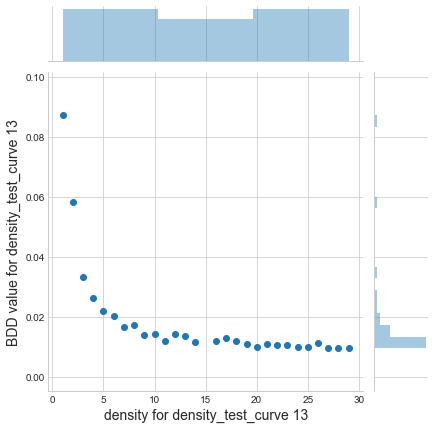

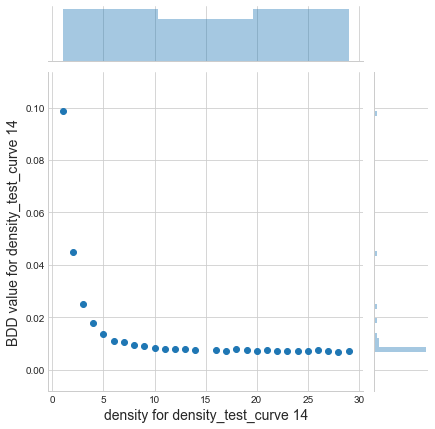

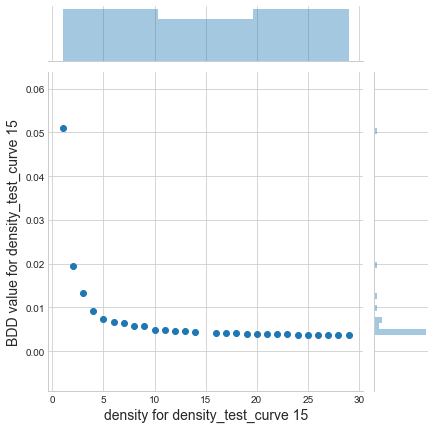

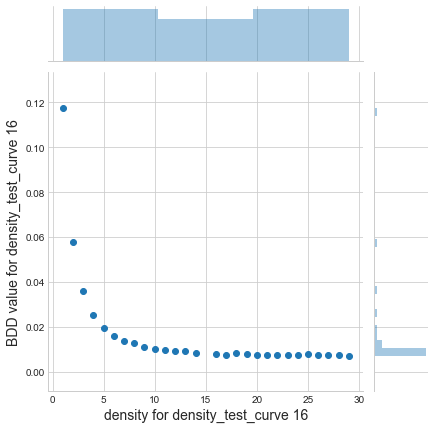

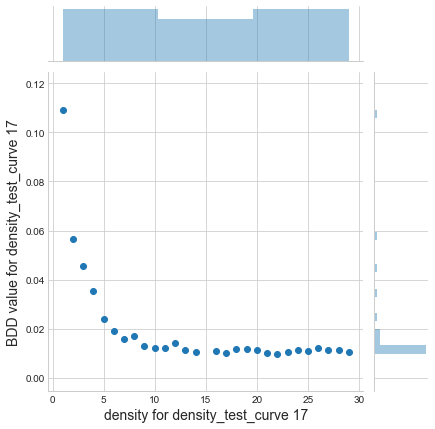

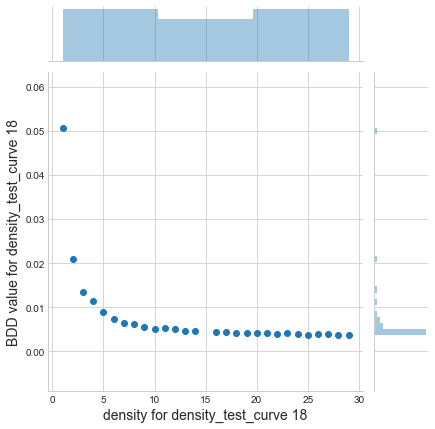

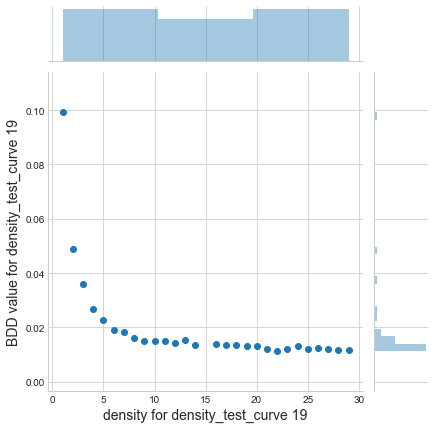

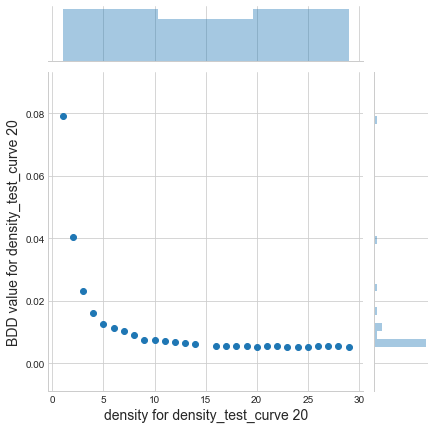

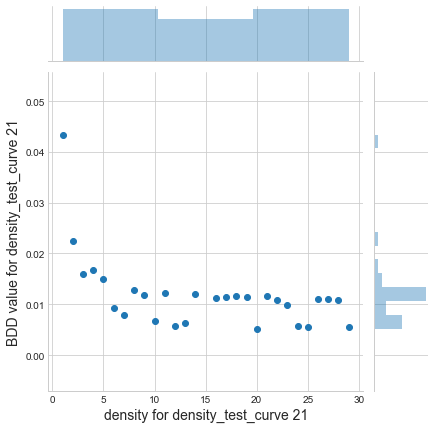

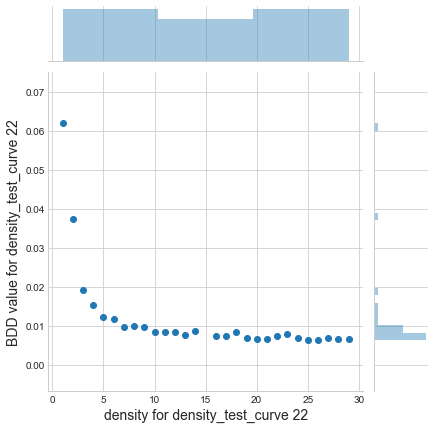

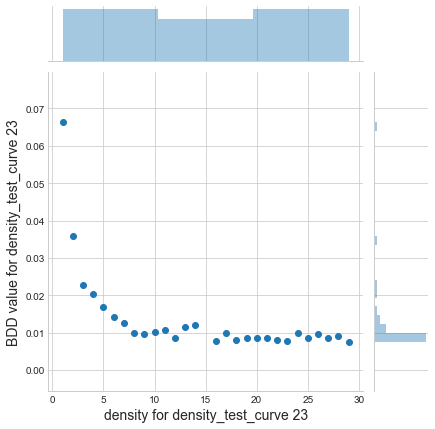

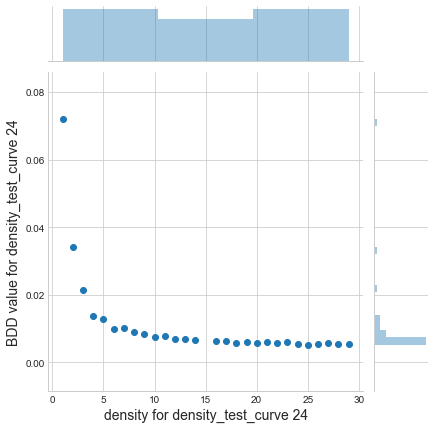

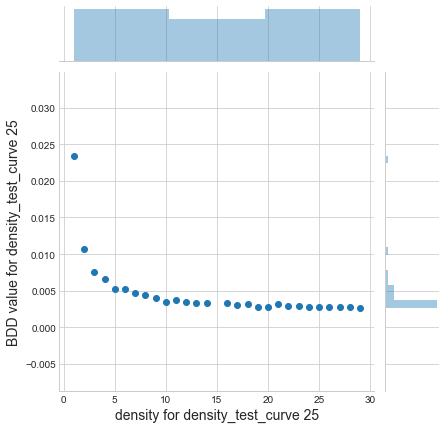

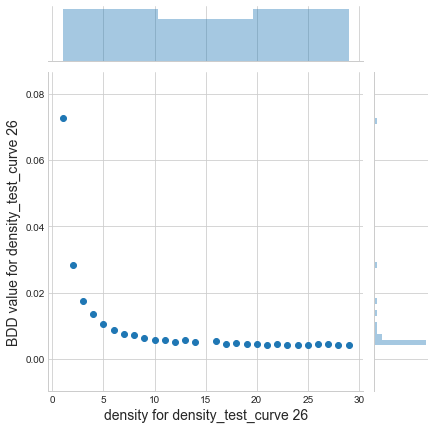

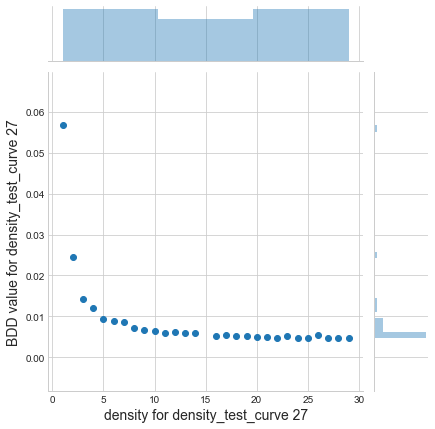

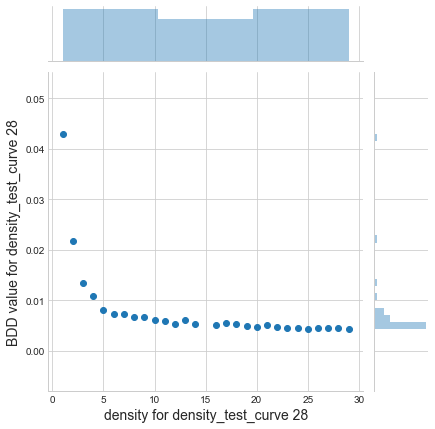

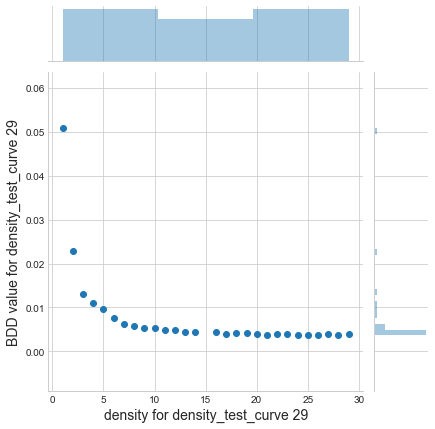

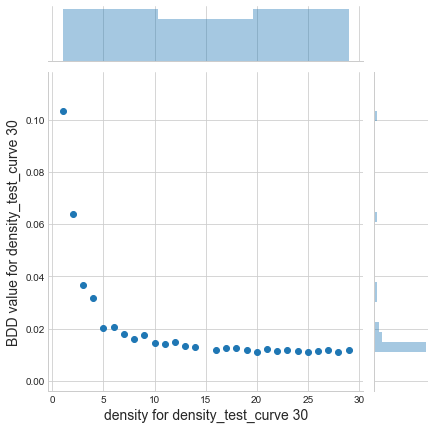

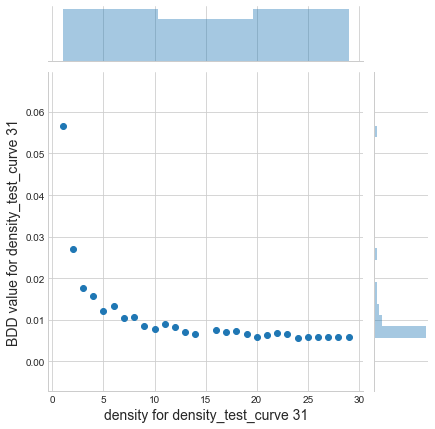

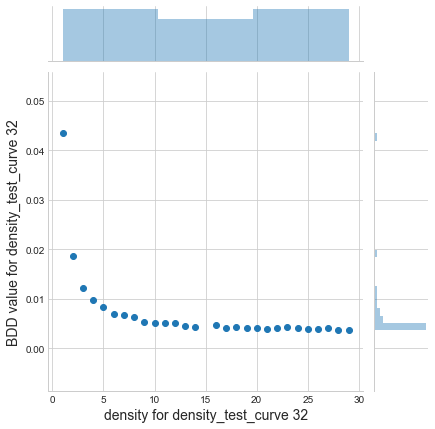

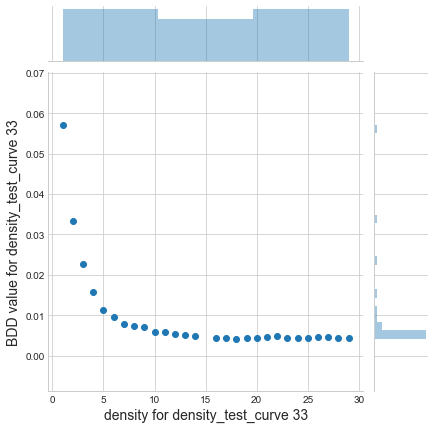

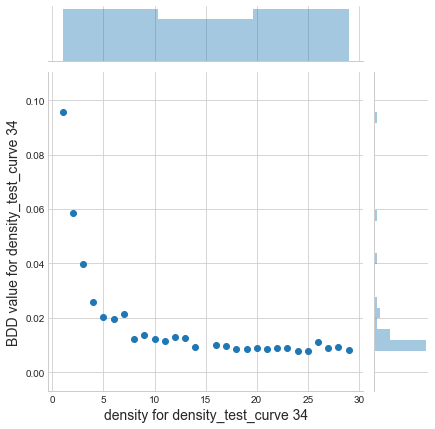

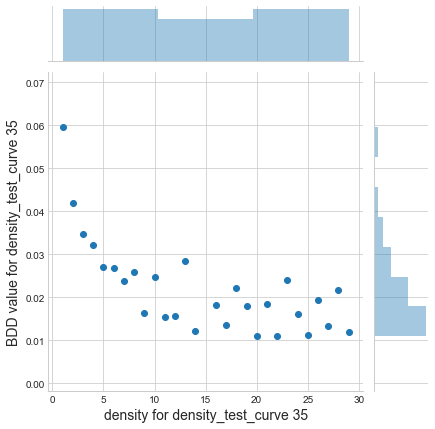

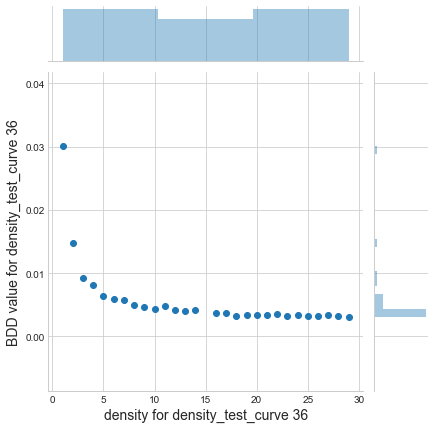

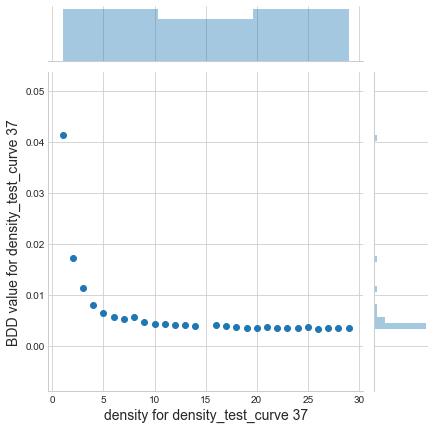

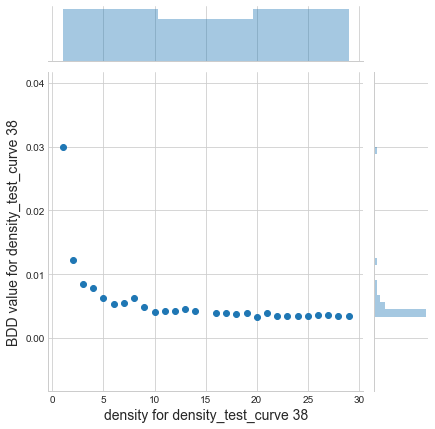

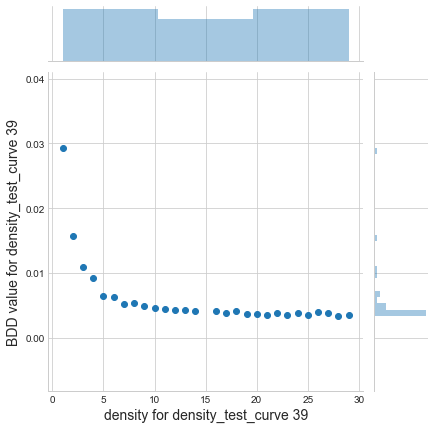

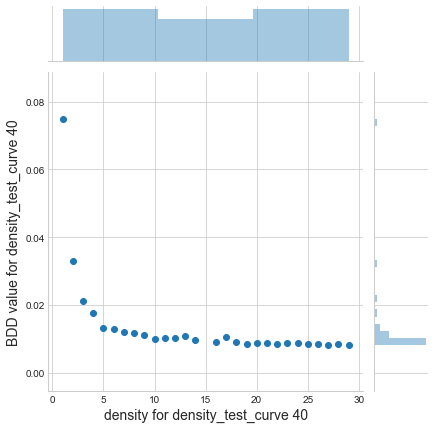

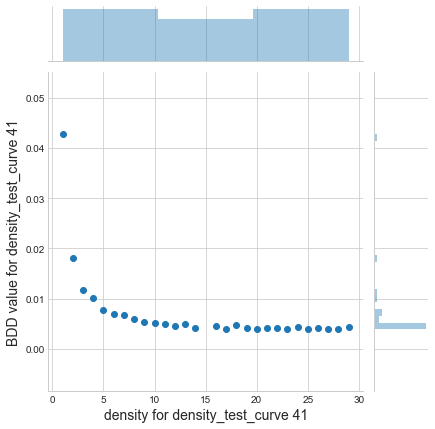

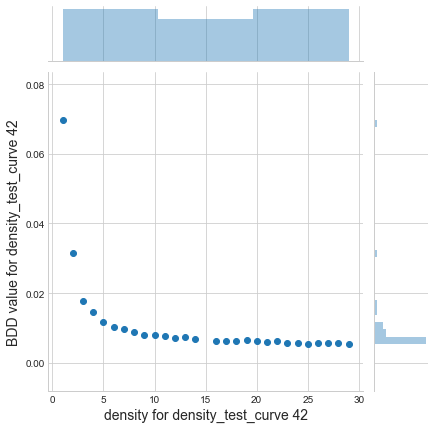

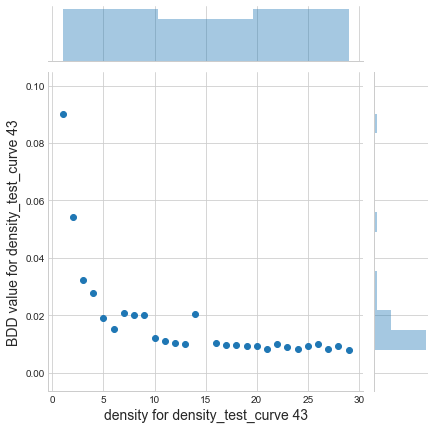

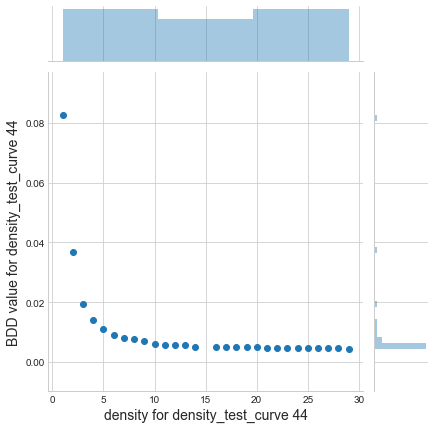

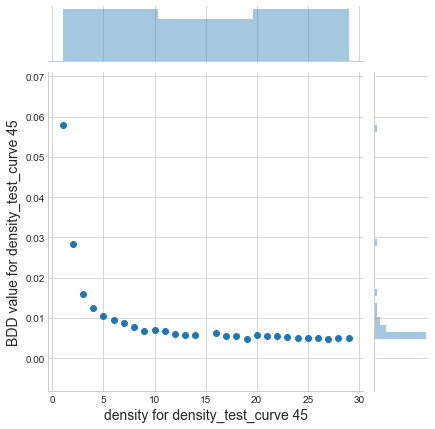

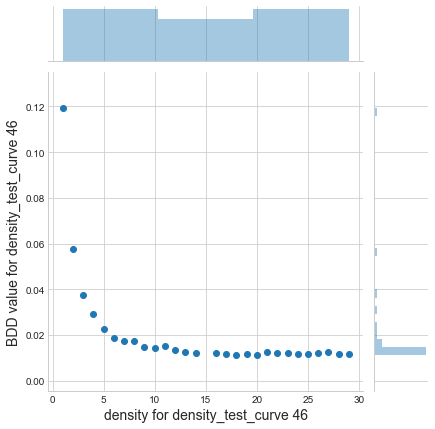

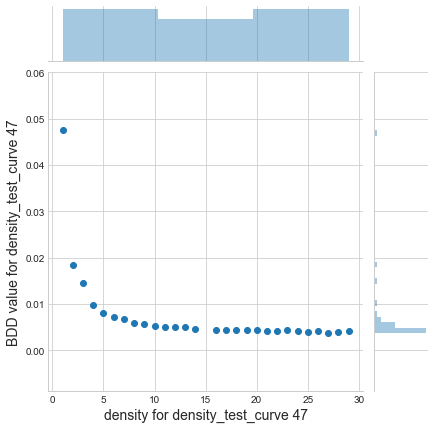

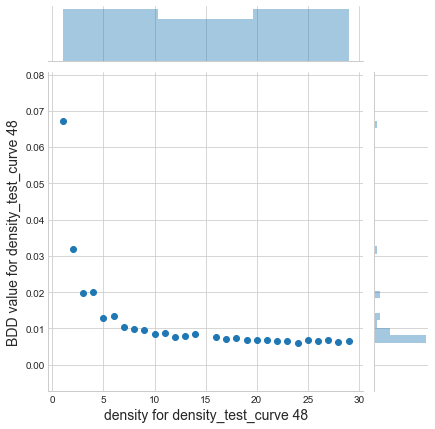

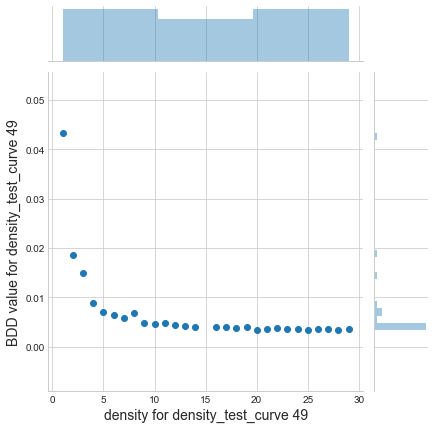

In [11]:
plotBDDforVarSep("density", 15)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
from sklearn.metrics import mean_squared_error 
import os
import sys

In [20]:
#QUADRATIC REGRESSION FOR FR < 24

r_values = np.zeros(50)
mse_values = np.zeros(50)
m_values_quadrreg = np.zeros(50)
c_values_quadrreg = np.zeros(50)
# where y = mx + c / we want to store the gradient values to analyse them later

def fitQuadrRegression(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    sqrt_of_BDD = np.sqrt(BDD) #take cube root of -y-axis
    curve_fit = np.polyfit(FR, sqrt_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, sqrt_of_BDD, "o", label = 'actual values')
    plt.title("FR vs sqrt(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('sqrt(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    sqrt_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'sqrt_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, sqrt_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and sqrt(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(sqrt_of_BDD, sqrt_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse
    
#store line data
    m_values_quadrreg[curve]=curve_fit[0]
    c_values_quadrreg[curve]=curve_fit[1]

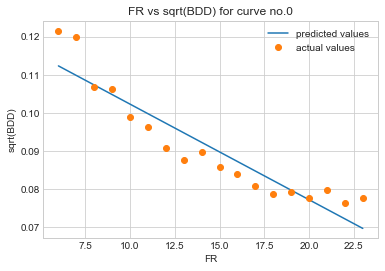

Equation of the line of best fit for curve no. 0: sqrt_of_BDD_pred = -0.002505490248524635*FR + 0.12733723323530868
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9302994120736247
The Mean-Squared Error is equal to 2.6267717482815996e-05


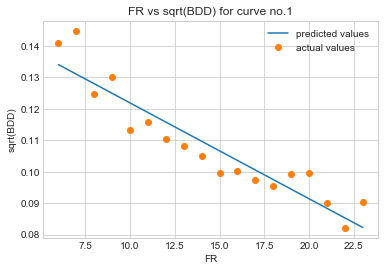

Equation of the line of best fit for curve no. 1: sqrt_of_BDD_pred = -0.003046206470512436*FR + 0.15231004800985998
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9320646626692003
The Mean-Squared Error is equal to 3.7736816204863014e-05


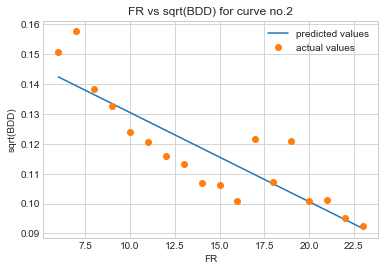

Equation of the line of best fit for curve no. 2: sqrt_of_BDD_pred = -0.0029847278437880255*FR + 0.16033198438092264
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8639611541566586
The Mean-Squared Error is equal to 8.145957020615381e-05


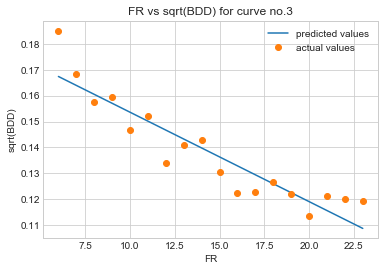

Equation of the line of best fit for curve no. 3: sqrt_of_BDD_pred = -0.003444391254881693*FR + 0.1880277854599252
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9236629542353718
The Mean-Squared Error is equal to 5.4964655625347826e-05


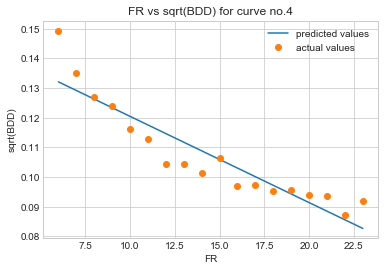

Equation of the line of best fit for curve no. 4: sqrt_of_BDD_pred = -0.0029081398436203794*FR + 0.14954995516425942
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9184772619275967
The Mean-Squared Error is equal to 4.220369199887486e-05


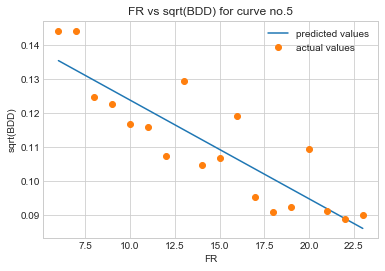

Equation of the line of best fit for curve no. 5: sqrt_of_BDD_pred = -0.0028990967863114195*FR + 0.15274138296621212
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8719135258168149
The Mean-Squared Error is equal to 7.134917060760145e-05


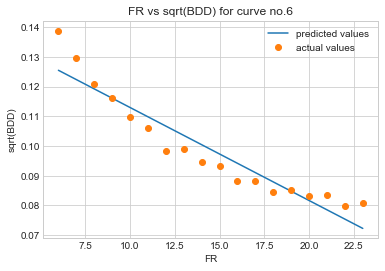

Equation of the line of best fit for curve no. 6: sqrt_of_BDD_pred = -0.003130066180388958*FR + 0.14425796759064383
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9444858305565865
The Mean-Squared Error is equal to 3.19114142868992e-05


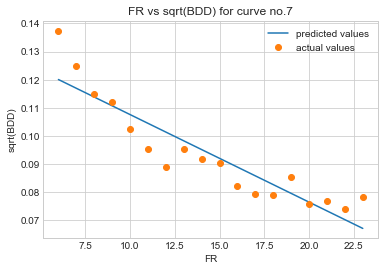

Equation of the line of best fit for curve no. 7: sqrt_of_BDD_pred = -0.003115721075401229*FR + 0.13876305748076154
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9128103505695179
The Mean-Squared Error is equal to 5.2301500997847354e-05


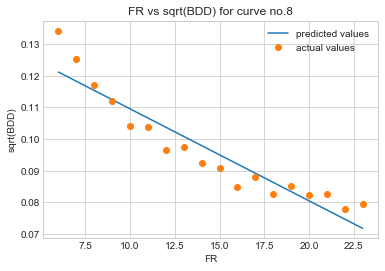

Equation of the line of best fit for curve no. 8: sqrt_of_BDD_pred = -0.002907244693532763*FR + 0.13862306905000144
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9388646052269054
The Mean-Squared Error is equal to 3.059276420545371e-05


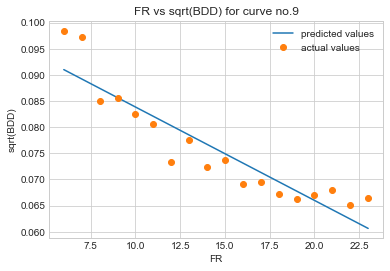

Equation of the line of best fit for curve no. 9: sqrt_of_BDD_pred = -0.0017873737210172766*FR + 0.10173317663262496
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9193209908950584
The Mean-Squared Error is equal to 1.5755269223841724e-05


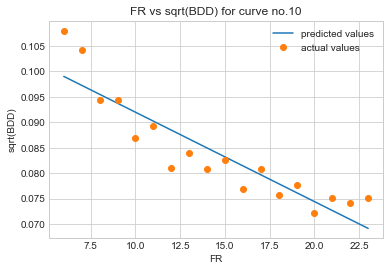

Equation of the line of best fit for curve no. 10: sqrt_of_BDD_pred = -0.001755179124530686*FR + 0.10951381972692886
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9064926969860269
The Mean-Squared Error is equal to 1.7989381166990037e-05


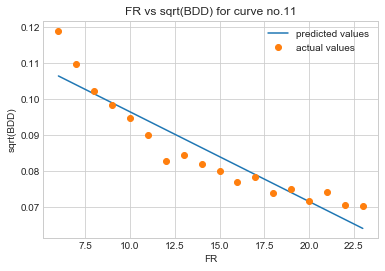

Equation of the line of best fit for curve no. 11: sqrt_of_BDD_pred = -0.0024930200727183165*FR + 0.1214715704247967
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9323370851321975
The Mean-Squared Error is equal to 2.5162888896984855e-05


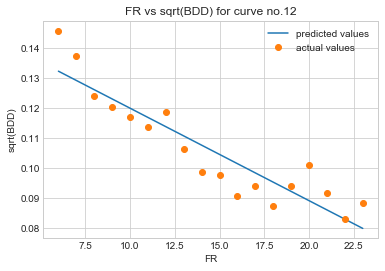

Equation of the line of best fit for curve no. 12: sqrt_of_BDD_pred = -0.003083034037663001*FR + 0.1509118074543671
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.914583450575912
The Mean-Squared Error is equal to 5.002044626578271e-05


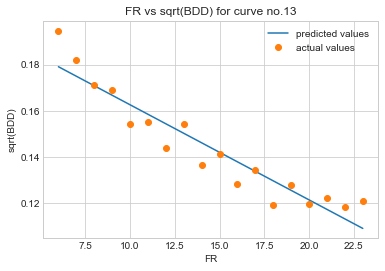

Equation of the line of best fit for curve no. 13: sqrt_of_BDD_pred = -0.004130730510870741*FR + 0.203870611470171
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9446972011090933
The Mean-Squared Error is equal to 5.534633210608982e-05


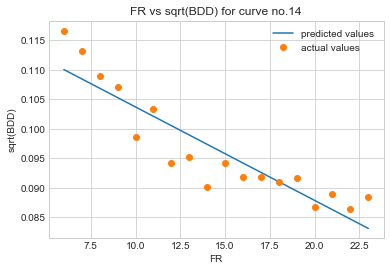

Equation of the line of best fit for curve no. 14: sqrt_of_BDD_pred = -0.0015821909920369706*FR + 0.11950670955179475
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.907528156453362
The Mean-Squared Error is equal to 1.4431097084633167e-05


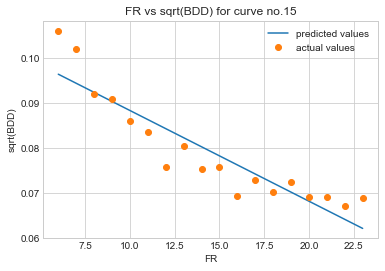

Equation of the line of best fit for curve no. 15: sqrt_of_BDD_pred = -0.0020143532864113846*FR + 0.10849263241255824
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9125636794158123
The Mean-Squared Error is equal to 2.193178489605885e-05


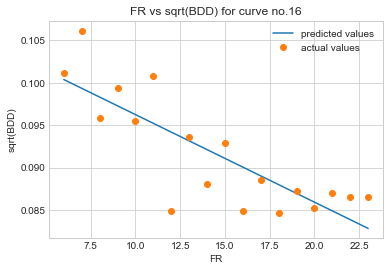

Equation of the line of best fit for curve no. 16: sqrt_of_BDD_pred = -0.0010329748629110892*FR + 0.10658591847682368
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8148738110553817
The Mean-Squared Error is equal to 1.4532300058278316e-05


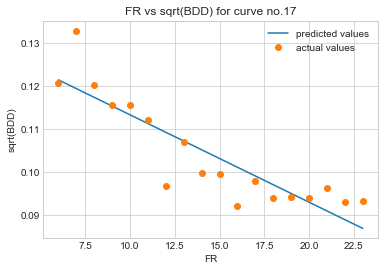

Equation of the line of best fit for curve no. 17: sqrt_of_BDD_pred = -0.0020326117601926195*FR + 0.13363660306657277
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.881365854871991
The Mean-Squared Error is equal to 3.1952192512405744e-05


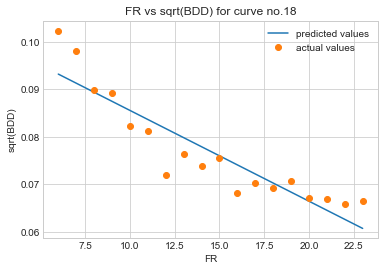

Equation of the line of best fit for curve no. 18: sqrt_of_BDD_pred = -0.0019145555123311756*FR + 0.10471773525656854
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9096930547353234
The Mean-Squared Error is equal to 2.0561375542753713e-05


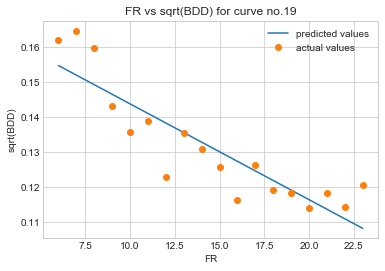

Equation of the line of best fit for curve no. 19: sqrt_of_BDD_pred = -0.0027372441537259705*FR + 0.17112537824491264
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8855881258638184
The Mean-Squared Error is equal to 5.547569026398855e-05


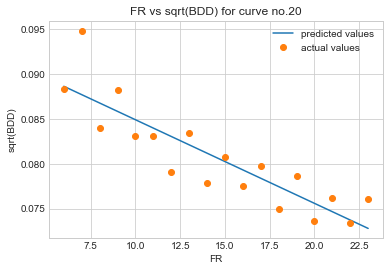

Equation of the line of best fit for curve no. 20: sqrt_of_BDD_pred = -0.0009335958873349748*FR + 0.094257234250325
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8750241138511479
The Mean-Squared Error is equal to 7.180127816591167e-06


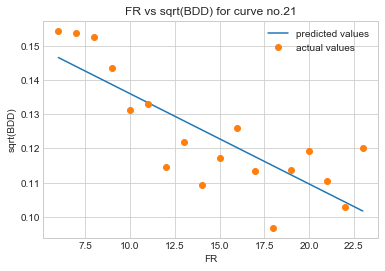

Equation of the line of best fit for curve no. 21: sqrt_of_BDD_pred = -0.0026414797423408997*FR + 0.16244478755543837
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8107999469621872
The Mean-Squared Error is equal to 9.787688716582696e-05


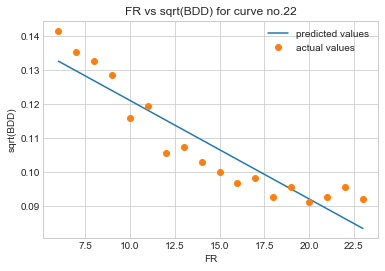

Equation of the line of best fit for curve no. 22: sqrt_of_BDD_pred = -0.0028951158103947983*FR + 0.15006878842815838
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9286579064190346
The Mean-Squared Error is equal to 3.599504236381196e-05


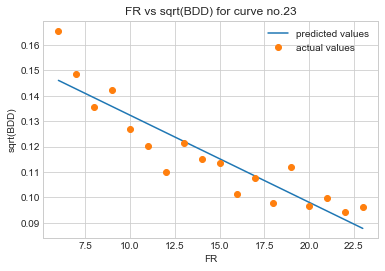

Equation of the line of best fit for curve no. 23: sqrt_of_BDD_pred = -0.0034267587242976234*FR + 0.16661037892861735
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9076914264807309
The Mean-Squared Error is equal to 6.755570513037404e-05


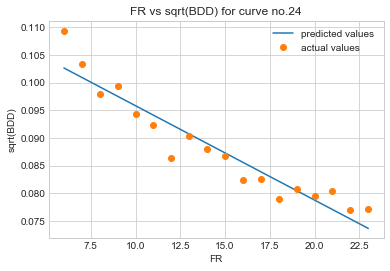

Equation of the line of best fit for curve no. 24: sqrt_of_BDD_pred = -0.0017071163265059866*FR + 0.11288385442110711
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9510867669627227
The Mean-Squared Error is equal to 8.275803736120635e-06


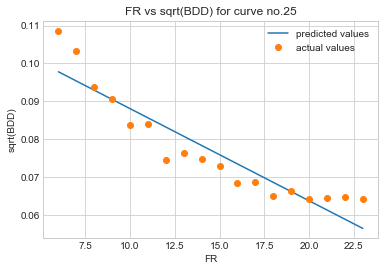

Equation of the line of best fit for curve no. 25: sqrt_of_BDD_pred = -0.002429442680517895*FR + 0.11238138540140724
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9274349399361642
The Mean-Squared Error is equal to 2.5833007494171314e-05


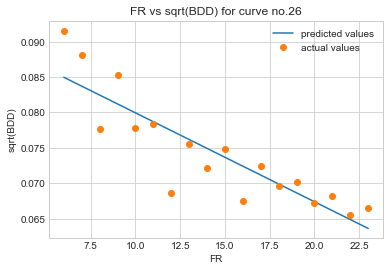

Equation of the line of best fit for curve no. 26: sqrt_of_BDD_pred = -0.0012560650667649096*FR + 0.09251032129062439
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8744226231848221
The Mean-Squared Error is equal to 1.3073193961363804e-05


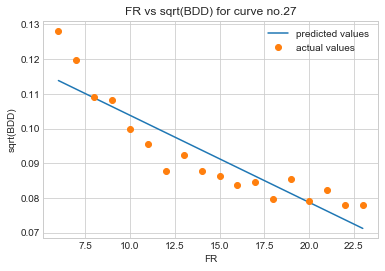

Equation of the line of best fit for curve no. 27: sqrt_of_BDD_pred = -0.0025081518430298557*FR + 0.1288892474314263
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9020820543438967
The Mean-Squared Error is equal to 3.8755057124093186e-05


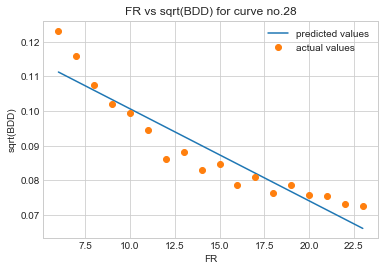

Equation of the line of best fit for curve no. 28: sqrt_of_BDD_pred = -0.002656257581567692*FR + 0.12719095690927765
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9335635057700047
The Mean-Squared Error is equal to 2.799233104295604e-05


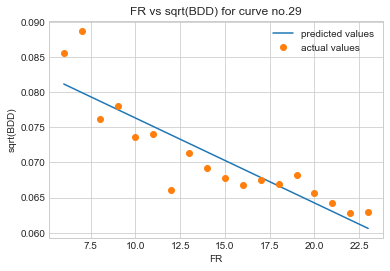

Equation of the line of best fit for curve no. 29: sqrt_of_BDD_pred = -0.0012089526608002634*FR + 0.08840798004040866
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8786329405184886
The Mean-Squared Error is equal to 1.1618970998663911e-05


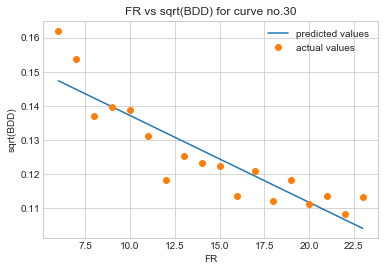

Equation of the line of best fit for curve no. 30: sqrt_of_BDD_pred = -0.0025456303059324687*FR + 0.16259773597649155
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8951847856451381
The Mean-Squared Error is equal to 4.323768615513719e-05


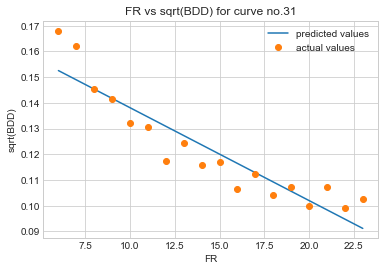

Equation of the line of best fit for curve no. 31: sqrt_of_BDD_pred = -0.0036114703948867764*FR + 0.1742204426986484
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9241075939461842
The Mean-Squared Error is equal to 6.003050426790951e-05


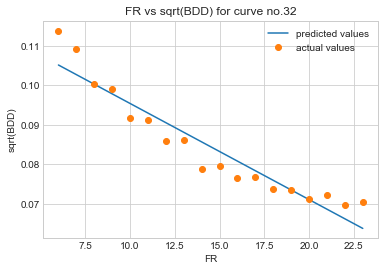

Equation of the line of best fit for curve no. 32: sqrt_of_BDD_pred = -0.0024306058452749336*FR + 0.1196993344408967
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.949193629816788
The Mean-Squared Error is equal to 1.7478890996976785e-05


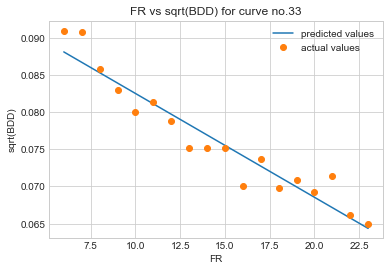

Equation of the line of best fit for curve no. 33: sqrt_of_BDD_pred = -0.0013965161000995872*FR + 0.09647436117160103
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9574330712421236
The Mean-Squared Error is equal to 4.771506931359366e-06


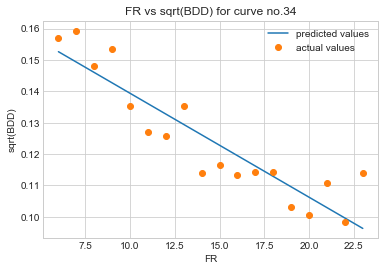

Equation of the line of best fit for curve no. 34: sqrt_of_BDD_pred = -0.0033140063150222054*FR + 0.17250904001790454
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9102409463864891
The Mean-Squared Error is equal to 6.117607626281346e-05


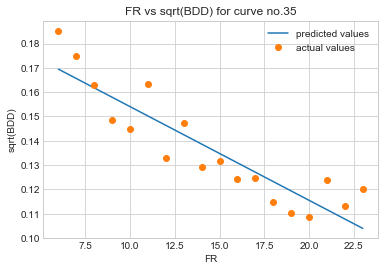

Equation of the line of best fit for curve no. 35: sqrt_of_BDD_pred = -0.0038559642273882804*FR + 0.19262512706312396
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9006336164013771
The Mean-Squared Error is equal to 9.318131884905567e-05


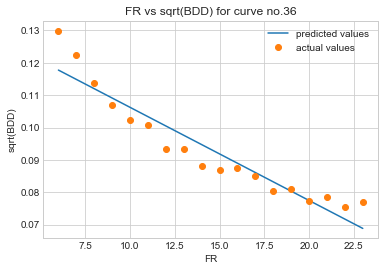

Equation of the line of best fit for curve no. 36: sqrt_of_BDD_pred = -0.0028783665520667506*FR + 0.13501678032684541
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9446830584375786
The Mean-Squared Error is equal to 2.688117276069742e-05


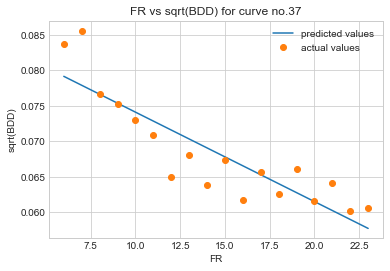

Equation of the line of best fit for curve no. 37: sqrt_of_BDD_pred = -0.0012615120066550086*FR + 0.08674292103363745
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.882227436009478
The Mean-Squared Error is equal to 1.2199981255300651e-05


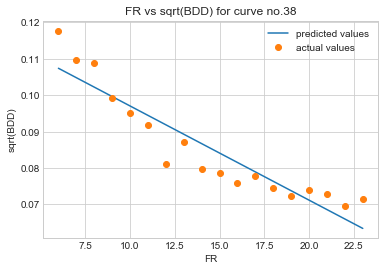

Equation of the line of best fit for curve no. 38: sqrt_of_BDD_pred = -0.0025873212688978598*FR + 0.12293318223611577
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9274755841102247
The Mean-Squared Error is equal to 2.9281286062821685e-05


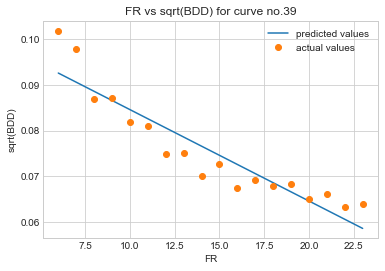

Equation of the line of best fit for curve no. 39: sqrt_of_BDD_pred = -0.0020051394292666153*FR + 0.10465373316021445
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9261873698606096
The Mean-Squared Error is equal to 1.793667475810696e-05


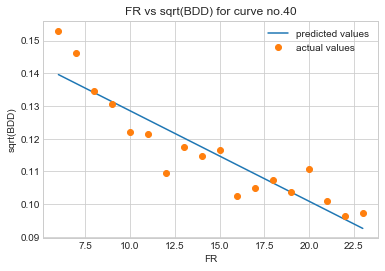

Equation of the line of best fit for curve no. 40: sqrt_of_BDD_pred = -0.0027649444395853036*FR + 0.15619823069668212
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9102306991811081
The Mean-Squared Error is equal to 4.258972140110893e-05


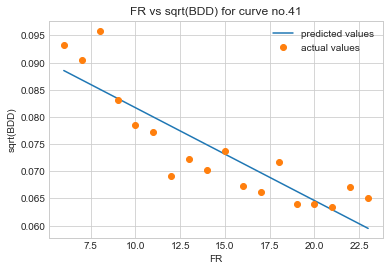

Equation of the line of best fit for curve no. 41: sqrt_of_BDD_pred = -0.0017087639047715984*FR + 0.09879551842475122
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.880240650185068
The Mean-Squared Error is equal to 2.2840490451924778e-05


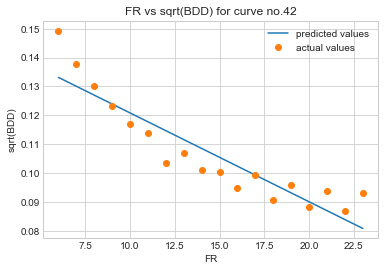

Equation of the line of best fit for curve no. 42: sqrt_of_BDD_pred = -0.0030777729256536994*FR + 0.15161488103527554
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9151757569227102
The Mean-Squared Error is equal to 4.945543663587881e-05


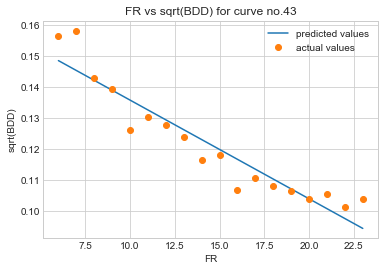

Equation of the line of best fit for curve no. 43: sqrt_of_BDD_pred = -0.0031900148924663817*FR + 0.1676376840582177
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9420101033929882
The Mean-Squared Error is equal to 3.476157097723229e-05


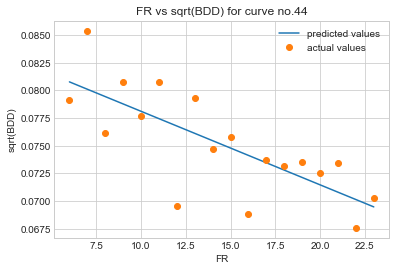

Equation of the line of best fit for curve no. 44: sqrt_of_BDD_pred = -0.0006645464743336544*FR + 0.08476616911647154
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.7504778064471802
The Mean-Squared Error is equal to 9.218538508745053e-06


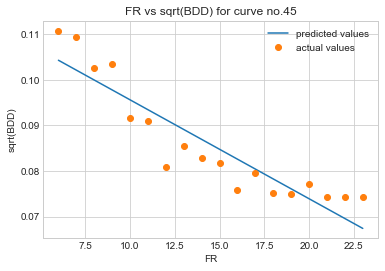

Equation of the line of best fit for curve no. 45: sqrt_of_BDD_pred = -0.0021730751256144893*FR + 0.11736674039599046
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9143583856186946
The Mean-Squared Error is equal to 2.4925618493315773e-05


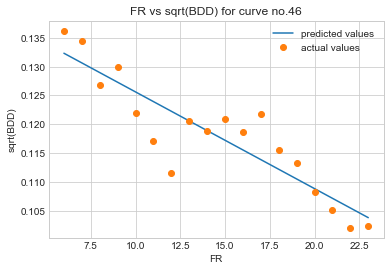

Equation of the line of best fit for curve no. 46: sqrt_of_BDD_pred = -0.0016794825559309798*FR + 0.14240435761887543
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8953116140876536
The Mean-Squared Error is equal to 1.8793296355861666e-05


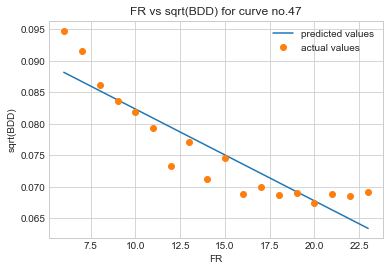

Equation of the line of best fit for curve no. 47: sqrt_of_BDD_pred = -0.0014571924996374427*FR + 0.09691760872008795
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.906442008168349
The Mean-Squared Error is equal to 1.2407365401750282e-05


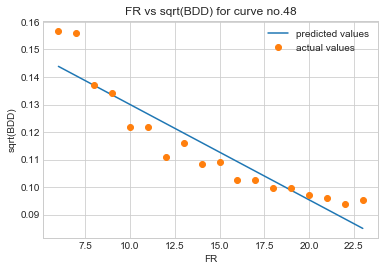

Equation of the line of best fit for curve no. 48: sqrt_of_BDD_pred = -0.0034643012287253194*FR + 0.16465050097976927
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.9270818438537967
The Mean-Squared Error is equal to 5.2814388803890606e-05


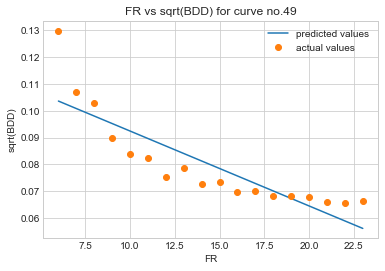

Equation of the line of best fit for curve no. 49: sqrt_of_BDD_pred = -0.0027942389839213985*FR + 0.12036261516928892
The correlation coeffcient for FR and sqrt(BDD) is equal to r =-0.8544887500268927
The Mean-Squared Error is equal to 7.767056190937483e-05
[-0.93029941 -0.93206466 -0.86396115 -0.92366295 -0.91847726 -0.87191353
 -0.94448583 -0.91281035 -0.93886461 -0.91932099 -0.9064927  -0.93233709
 -0.91458345 -0.9446972  -0.90752816 -0.91256368 -0.81487381 -0.88136585
 -0.90969305 -0.88558813 -0.87502411 -0.81079995 -0.92865791 -0.90769143
 -0.95108677 -0.92743494 -0.87442262 -0.90208205 -0.93356351 -0.87863294
 -0.89518479 -0.92410759 -0.94919363 -0.95743307 -0.91024095 -0.90063362
 -0.94468306 -0.88222744 -0.92747558 -0.92618737 -0.9102307  -0.88024065
 -0.91517576 -0.9420101  -0.75047781 -0.91435839 -0.89531161 -0.90644201
 -0.92708184 -0.85448875]
[2.62677175e-05 3.77368162e-05 8.14595702e-05 5.49646556e-05
 4.22036920e-05 7.13491706e-05 3.19114143e-05 5.23015010e-05
 3.0592764

In [21]:
for i in range(50):
    fitQuadrRegression(i)
    
print(r_values)
print(mse_values)

In [18]:
def get_cube_root(num):
    return num ** (1. / 3)

In [23]:
#CUBIC REGRESSION FOR FR < 24

r_values = np.zeros(50)
mse_values = np.zeros(50)
m_values_cubereg = np.zeros(50)
c_values_cubereg = np.zeros(50)
# where y = mx + c / we want to store the gradient values to analyse them later

def fitCubicRegression(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # 
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    cuberoot_of_BDD = get_cube_root(BDD) #take cube root of-y-axis
    curve_fit = np.polyfit(FR, cuberoot_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, cuberoot_of_BDD, "o", label = 'actual values')
    plt.title("FR vs cube_root(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('cube_root(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    cuberoot_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'cuberoot_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, cuberoot_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and cuberoot(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(cuberoot_of_BDD, cuberoot_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse
    
#store line data
    m_values_cubereg[curve]=curve_fit[0]
    c_values_cubereg[curve]=curve_fit[1]

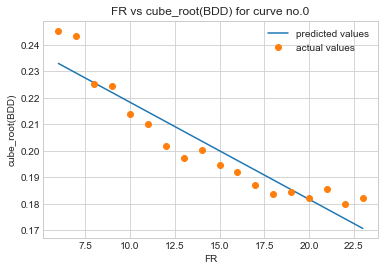

Equation of the line of best fit for curve no. 0: cuberoot_of_BDD_pred = -0.003664846018705508*FR + 0.2549630296798718
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9366702785451261
The Mean-Squared Error is equal to 5.0538520780256473e-05


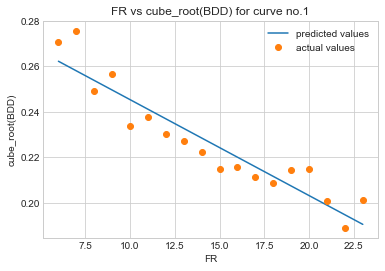

Equation of the line of best fit for curve no. 1: cuberoot_of_BDD_pred = -0.0042249694683260865*FR + 0.2876461953441703
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9374094271595468
The Mean-Squared Error is equal to 6.630406077892793e-05


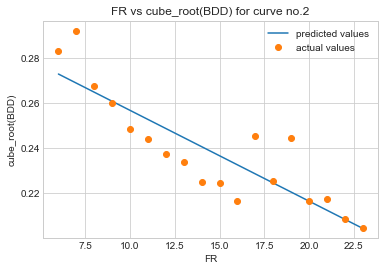

Equation of the line of best fit for curve no. 2: cuberoot_of_BDD_pred = -0.004027595263686208*FR + 0.29708899564676133
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8683614363362732
The Mean-Squared Error is equal to 0.00014241505182698935


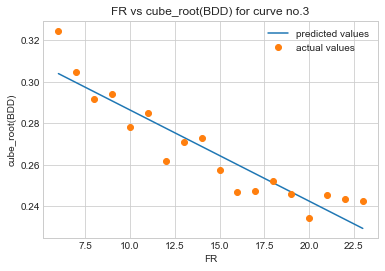

Equation of the line of best fit for curve no. 3: cuberoot_of_BDD_pred = -0.004397013039192453*FR + 0.3303507968900472
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9282330836712572
The Mean-Squared Error is equal to 8.358079787014404e-05


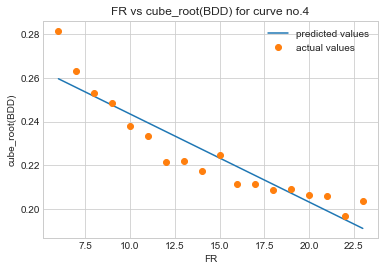

Equation of the line of best fit for curve no. 4: cuberoot_of_BDD_pred = -0.0040216376532902975*FR + 0.28367903315021636
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9260885264677843
The Mean-Squared Error is equal to 7.226204546116061e-05


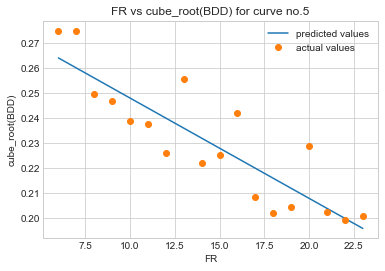

Equation of the line of best fit for curve no. 5: cuberoot_of_BDD_pred = -0.004008172243086869*FR + 0.28806381078395904
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8748010148378365
The Mean-Squared Error is equal to 0.00013263295964228815


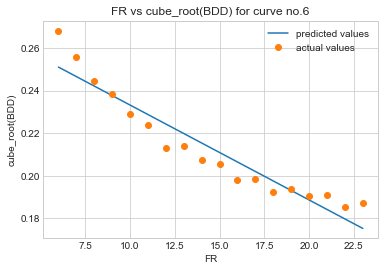

Equation of the line of best fit for curve no. 6: cuberoot_of_BDD_pred = -0.0044546652027300584*FR + 0.277731046563582
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.951609930077018
The Mean-Squared Error is equal to 5.570353459818357e-05


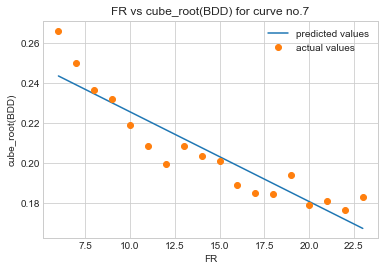

Equation of the line of best fit for curve no. 7: cuberoot_of_BDD_pred = -0.0044999515639736224*FR + 0.27060923067017456
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9209543443618489
The Mean-Squared Error is equal to 9.757887391599077e-05


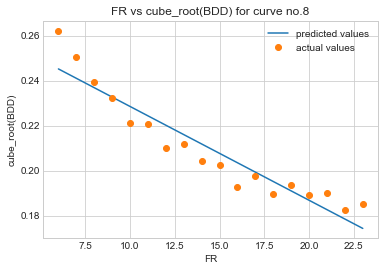

Equation of the line of best fit for curve no. 8: cuberoot_of_BDD_pred = -0.004171927510829299*FR + 0.2702177402436071
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9458380134769434
The Mean-Squared Error is equal to 5.519027055948253e-05


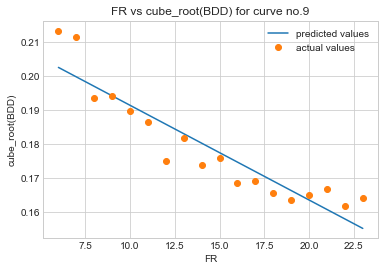

Equation of the line of best fit for curve no. 9: cuberoot_of_BDD_pred = -0.0027813583324758917*FR + 0.2191264931352009
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9250717543283926
The Mean-Squared Error is equal to 3.509755066783427e-05


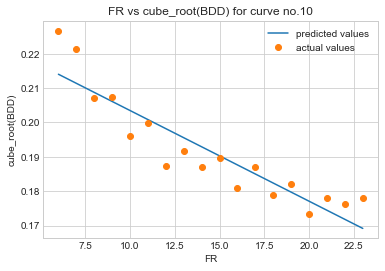

Equation of the line of best fit for curve no. 10: cuberoot_of_BDD_pred = -0.002639806276978343*FR + 0.22988521794964004
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9117821531877575
The Mean-Squared Error is equal to 3.805205122445814e-05


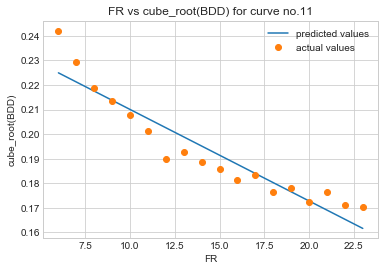

Equation of the line of best fit for curve no. 11: cuberoot_of_BDD_pred = -0.0037236860655245033*FR + 0.24726537703020907
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9398445066169091
The Mean-Squared Error is equal to 4.930575271774032e-05


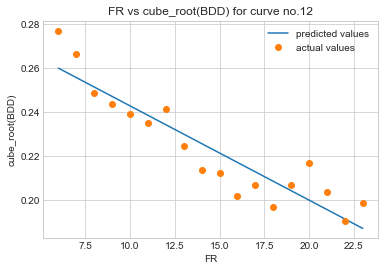

Equation of the line of best fit for curve no. 12: cuberoot_of_BDD_pred = -0.004292269122924324*FR + 0.28585753927144997
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9183641193514348
The Mean-Squared Error is equal to 9.20825790974938e-05


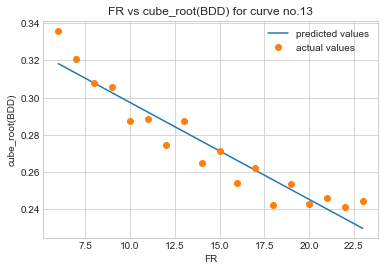

Equation of the line of best fit for curve no. 13: cuberoot_of_BDD_pred = -0.005205851986181632*FR + 0.3494529551427189
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9491477330214421
The Mean-Squared Error is equal to 8.025874311883371e-05


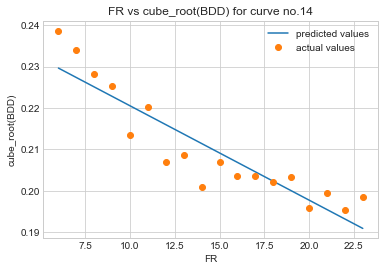

Equation of the line of best fit for curve no. 14: cuberoot_of_BDD_pred = -0.0022777914913648186*FR + 0.24331056906700194
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9106662225792646
The Mean-Squared Error is equal to 2.8742945817934416e-05


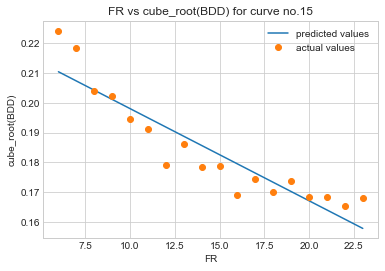

Equation of the line of best fit for curve no. 15: cuberoot_of_BDD_pred = -0.003082094880478938*FR + 0.228839715878015
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9185382247278555
The Mean-Squared Error is equal to 4.7363429690705374e-05


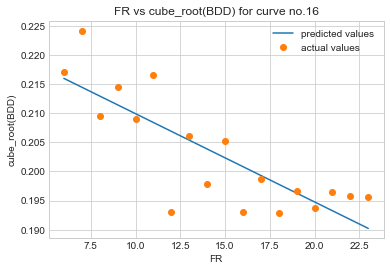

Equation of the line of best fit for curve no. 16: cuberoot_of_BDD_pred = -0.0015165925862797513*FR + 0.2250911076585682
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8151489330064627
The Mean-Squared Error is equal to 3.1262192372699665e-05


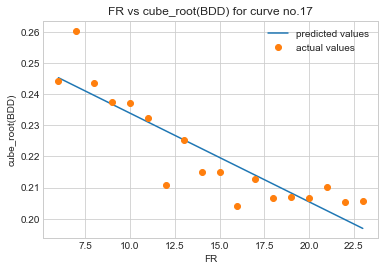

Equation of the line of best fit for curve no. 17: cuberoot_of_BDD_pred = -0.00284876569878516*FR + 0.26237758591152144
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.884538697593336
The Mean-Squared Error is equal to 6.074948155253615e-05


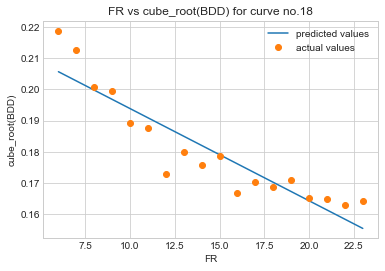

Equation of the line of best fit for curve no. 18: cuberoot_of_BDD_pred = -0.0029590159750472063*FR + 0.2234462970050305
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9153969905043142
The Mean-Squared Error is equal to 4.5576560569239226e-05


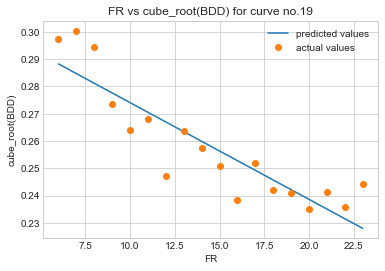

Equation of the line of best fit for curve no. 19: cuberoot_of_BDD_pred = -0.003546000463126323*FR + 0.30951528838753345
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8890512193495691
The Mean-Squared Error is equal to 8.97452673058272e-05


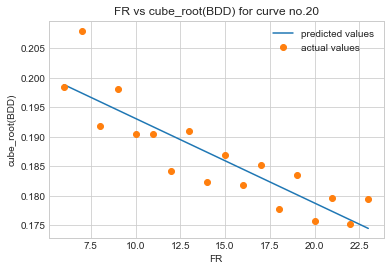

Equation of the line of best fit for curve no. 20: cuberoot_of_BDD_pred = -0.0014328896212713325*FR + 0.20745746728719913
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8780459002102576
The Mean-Squared Error is equal to 1.641779840413035e-05


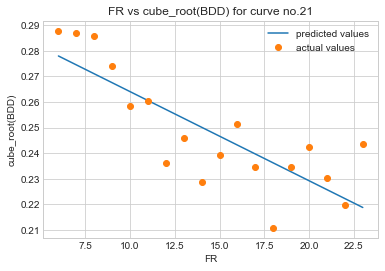

Equation of the line of best fit for curve no. 21: cuberoot_of_BDD_pred = -0.003486751841901706*FR + 0.29891288690590745
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8079244347446182
The Mean-Squared Error is equal to 0.00017409017527089763


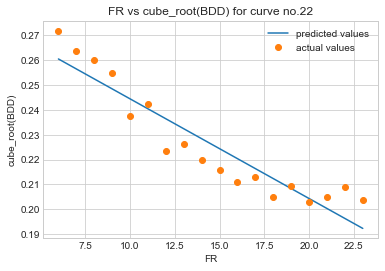

Equation of the line of best fit for curve no. 22: cuberoot_of_BDD_pred = -0.004002895440001675*FR + 0.2844122407155549
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9328012138864393
The Mean-Squared Error is equal to 6.437840027900128e-05


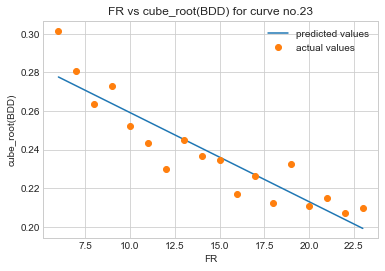

Equation of the line of best fit for curve no. 23: cuberoot_of_BDD_pred = -0.004611728645161216*FR + 0.3052723297224089
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9142761367348496
The Mean-Squared Error is equal to 0.00011238292167232116


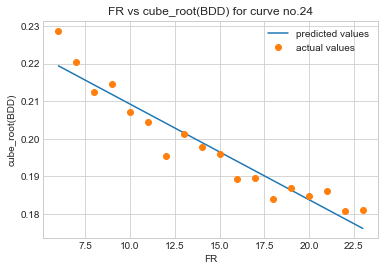

Equation of the line of best fit for curve no. 24: cuberoot_of_BDD_pred = -0.0025401983635988654*FR + 0.2346331024940076
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9547279014955835
The Mean-Squared Error is equal to 1.6862200478991534e-05


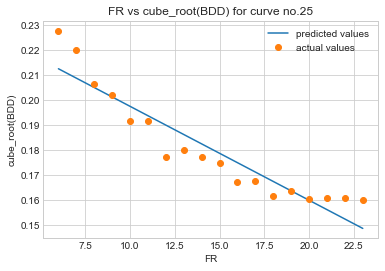

Equation of the line of best fit for curve no. 25: cuberoot_of_BDD_pred = -0.003747016148828435*FR + 0.23497722755431857
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9347199272668885
The Mean-Squared Error is equal to 5.4629614687585556e-05


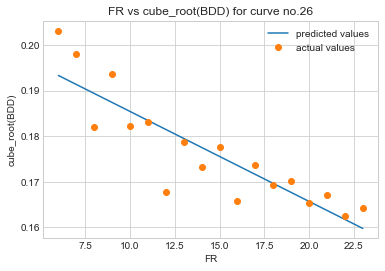

Equation of the line of best fit for curve no. 26: cuberoot_of_BDD_pred = -0.001972754966888429*FR + 0.20514636080341012
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8777432306154833
The Mean-Squared Error is equal to 3.1213445445349674e-05


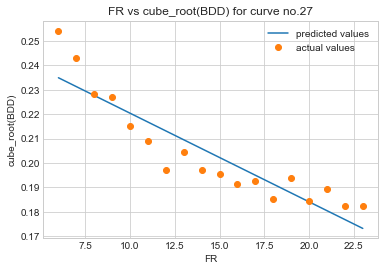

Equation of the line of best fit for curve no. 27: cuberoot_of_BDD_pred = -0.0036371208348646494*FR + 0.2567824904986609
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9093522873994071
The Mean-Squared Error is equal to 7.452728906277628e-05


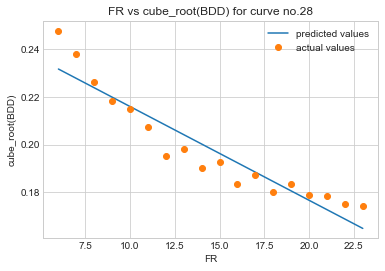

Equation of the line of best fit for curve no. 28: cuberoot_of_BDD_pred = -0.003916803865008715*FR + 0.25506819277059145
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9406259909964817
The Mean-Squared Error is equal to 5.377608649069477e-05


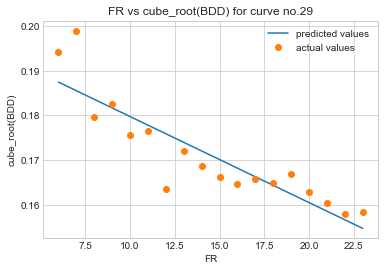

Equation of the line of best fit for curve no. 29: cuberoot_of_BDD_pred = -0.0019259853620473006*FR + 0.19900982809585185
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8841156501782153
The Mean-Squared Error is equal to 2.7889545010827193e-05


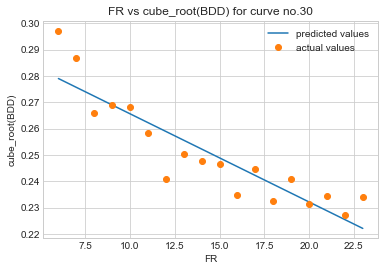

Equation of the line of best fit for curve no. 30: cuberoot_of_BDD_pred = -0.0033484268222154358*FR + 0.2990986727746226
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8999555435235327
The Mean-Squared Error is equal to 7.082674053414196e-05


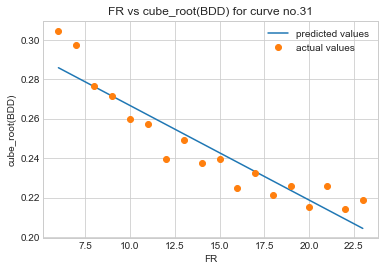

Equation of the line of best fit for curve no. 31: cuberoot_of_BDD_pred = -0.004789888395151726*FR + 0.3145241168882059
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9305576064877283
The Mean-Squared Error is equal to 9.560772516360608e-05


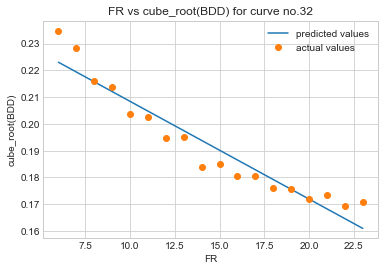

Equation of the line of best fit for curve no. 32: cuberoot_of_BDD_pred = -0.0036526554416249015*FR + 0.24495169364609115
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9550090253876752
The Mean-Squared Error is equal to 3.463362144642033e-05


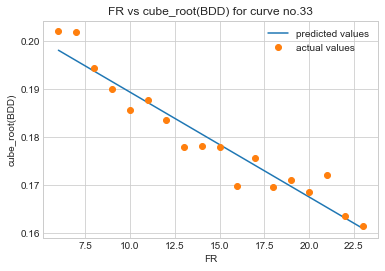

Equation of the line of best fit for curve no. 33: cuberoot_of_BDD_pred = -0.0021861520519857332*FR + 0.21128149286779002
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9597732128233369
The Mean-Squared Error is equal to 1.1009457562533634e-05


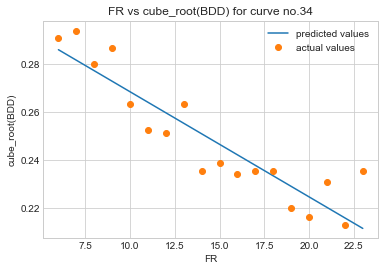

Equation of the line of best fit for curve no. 34: cuberoot_of_BDD_pred = -0.004388215820941895*FR + 0.3122814885937405
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9120691361375332
The Mean-Squared Error is equal to 0.00010475786668609092


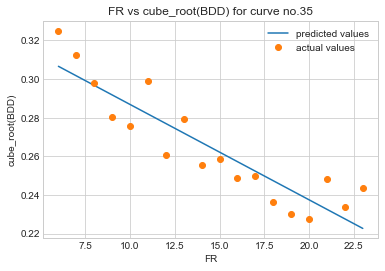

Equation of the line of best fit for curve no. 35: cuberoot_of_BDD_pred = -0.0049376968102771875*FR + 0.3362295103555958
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9039554558321792
The Mean-Squared Error is equal to 0.00014686068102297468


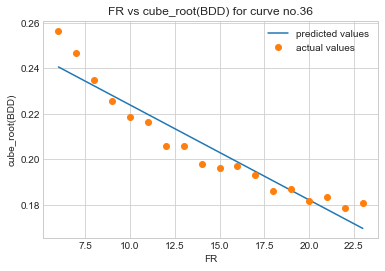

Equation of the line of best fit for curve no. 36: cuberoot_of_BDD_pred = -0.004178866204788925*FR + 0.2656508964790289
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9519420105676022
The Mean-Squared Error is equal to 4.8657493306628794e-05


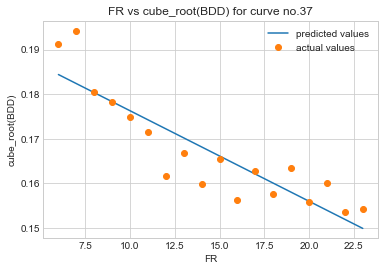

Equation of the line of best fit for curve no. 37: cuberoot_of_BDD_pred = -0.0020325180340379344*FR + 0.19659687501586834
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8861403719544029
The Mean-Squared Error is equal to 3.0410868064579086e-05


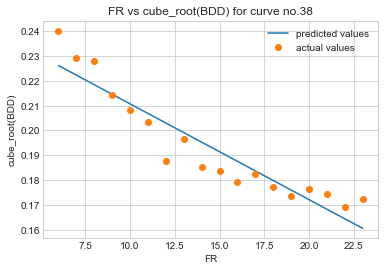

Equation of the line of best fit for curve no. 38: cuberoot_of_BDD_pred = -0.003861321947564793*FR + 0.24935535535724368
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9334970801577072
The Mean-Squared Error is equal to 5.921771013278328e-05


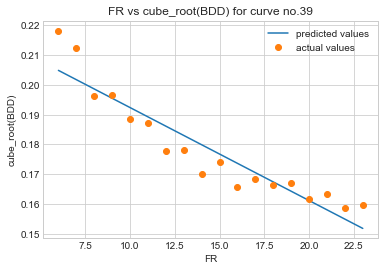

Equation of the line of best fit for curve no. 39: cuberoot_of_BDD_pred = -0.0031204965467886777*FR + 0.22359014597083937
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9329357208693693
The Mean-Squared Error is equal to 3.9036773760861756e-05


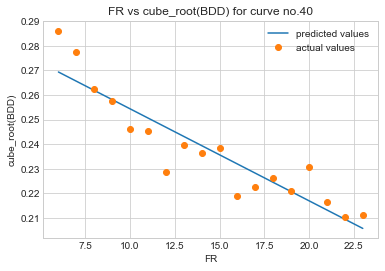

Equation of the line of best fit for curve no. 40: cuberoot_of_BDD_pred = -0.0037378755088137623*FR + 0.29172883254681237
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9152928613464443
The Mean-Squared Error is equal to 7.282927617209182e-05


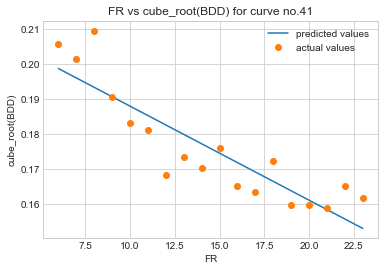

Equation of the line of best fit for curve no. 41: cuberoot_of_BDD_pred = -0.0026774024992836888*FR + 0.21476614597234212
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8847687832424475
The Mean-Squared Error is equal to 5.3532466077721686e-05


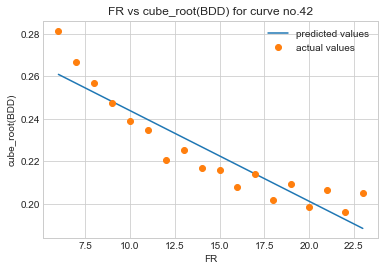

Equation of the line of best fit for curve no. 42: cuberoot_of_BDD_pred = -0.004258152068723972*FR + 0.2864792493038603
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9215130076272212
The Mean-Squared Error is equal to 8.667656395094572e-05


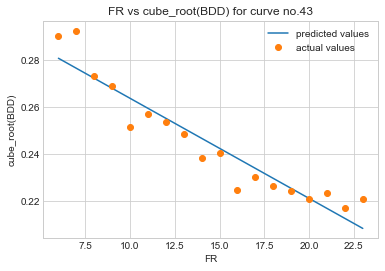

Equation of the line of best fit for curve no. 43: cuberoot_of_BDD_pred = -0.004252676962921713*FR + 0.3062680457016102
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9470093470103882
The Mean-Squared Error is equal to 5.600216825690679e-05


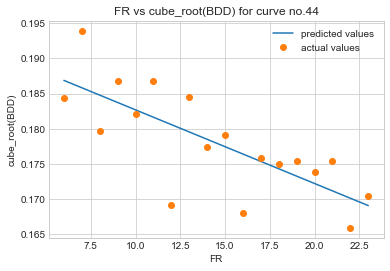

Equation of the line of best fit for curve no. 44: cuberoot_of_BDD_pred = -0.0010463729746615015*FR + 0.19314943536818543
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.7499225799953028
The Mean-Squared Error is equal to 2.293267728475809e-05


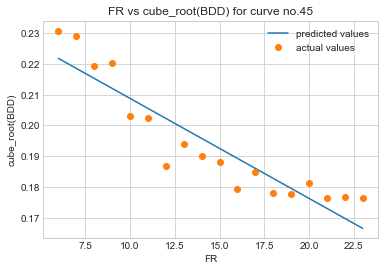

Equation of the line of best fit for curve no. 45: cuberoot_of_BDD_pred = -0.0032409010164275503*FR + 0.24118607578891396
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9188828966711524
The Mean-Squared Error is equal to 5.2118676649218e-05


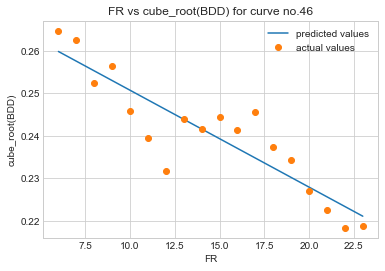

Equation of the line of best fit for curve no. 46: cuberoot_of_BDD_pred = -0.002283367383292641*FR + 0.2735746675734742
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8954775593519433
The Mean-Squared Error is equal to 3.467301743400759e-05


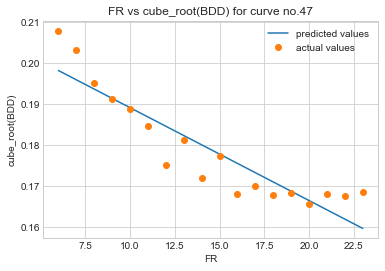

Equation of the line of best fit for curve no. 47: cuberoot_of_BDD_pred = -0.0022696857097039853*FR + 0.2117674283383075
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9098214437327444
The Mean-Squared Error is equal to 2.8849376342135476e-05


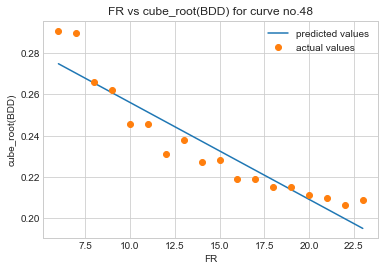

Equation of the line of best fit for curve no. 48: cuberoot_of_BDD_pred = -0.004688399382646599*FR + 0.3029571796620698
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.9349809049671828
The Mean-Squared Error is equal to 8.514959717388167e-05


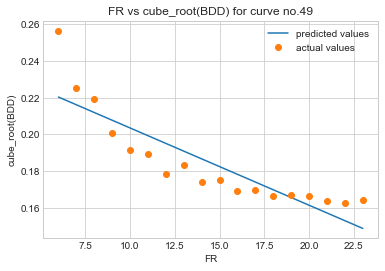

Equation of the line of best fit for curve no. 49: cuberoot_of_BDD_pred = -0.0042042062476555266*FR + 0.24555926596750569
The correlation coeffcient for FR and cuberoot(BDD) is equal to r =-0.8689003372184955
The Mean-Squared Error is equal to 0.00015439637098769258
[-0.93667028 -0.93740943 -0.86836144 -0.92823308 -0.92608853 -0.87480101
 -0.95160993 -0.92095434 -0.94583801 -0.92507175 -0.91178215 -0.93984451
 -0.91836412 -0.94914773 -0.91066622 -0.91853822 -0.81514893 -0.8845387
 -0.91539699 -0.88905122 -0.8780459  -0.80792443 -0.93280121 -0.91427614
 -0.9547279  -0.93471993 -0.87774323 -0.90935229 -0.94062599 -0.88411565
 -0.89995554 -0.93055761 -0.95500903 -0.95977321 -0.91206914 -0.90395546
 -0.95194201 -0.88614037 -0.93349708 -0.93293572 -0.91529286 -0.88476878
 -0.92151301 -0.94700935 -0.74992258 -0.9188829  -0.89547756 -0.90982144
 -0.9349809  -0.86890034]
[5.05385208e-05 6.63040608e-05 1.42415052e-04 8.35807979e-05
 7.22620455e-05 1.32632960e-04 5.57035346e-05 9.75788739e-05
 5

In [24]:
for i in range(50):
    fitCubicRegression(i)
    
print(r_values)
print(mse_values)

In [25]:
#REGRESSION FOR FR < 24

r_values = np.zeros(50)
mse_values = np.zeros(50)
m_values_expreg = np.zeros(50)
c_values_expreg = np.zeros(50)
# where y = mx + c / we want to store the gradient values to analyse them later

def fitExpRegression(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    log_of_BDD = np.log(BDD) #log-y-axis
    curve_fit = np.polyfit(FR, log_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, log_of_BDD, "o", label = 'actual values')
    plt.title("FR vs log(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('log(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    log_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'log_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, log_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and log(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(log_of_BDD, log_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse
    
#store line data
    m_values_expreg[curve]=curve_fit[0]
    c_values_expreg[curve]=curve_fit[1]

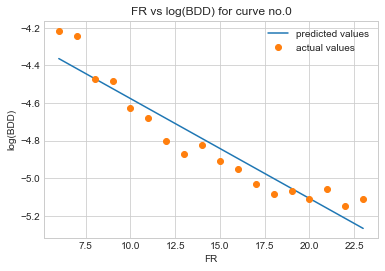

Equation of the line of best fit for curve no. 0: log_of_BDD_pred = -0.05317175240160601*FR + -4.044556395345116
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9481608641197151
The Mean-Squared Error is equal to 0.00854873275923292


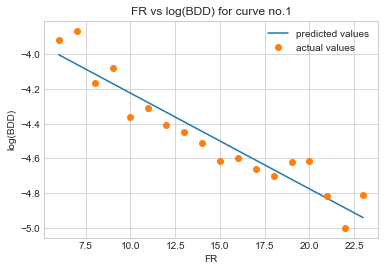

Equation of the line of best fit for curve no. 1: log_of_BDD_pred = -0.05516309239127859*FR + -3.6721949941050895
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9456855768144798
The Mean-Squared Error is equal to 0.009678605432834077


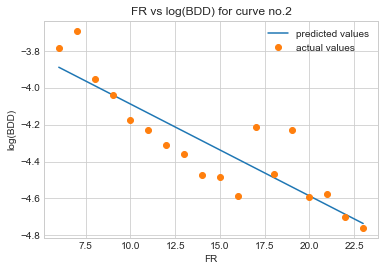

Equation of the line of best fit for curve no. 2: log_of_BDD_pred = -0.04977664727097936*FR + -3.590758116143598
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8754342809535979
The Mean-Squared Error is equal to 0.020329460331423688


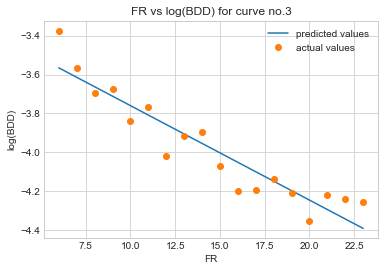

Equation of the line of best fit for curve no. 3: log_of_BDD_pred = -0.048559312500535246*FR + -3.2742674211929055
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9357648813297096
The Mean-Squared Error is equal to 0.009012763763179053


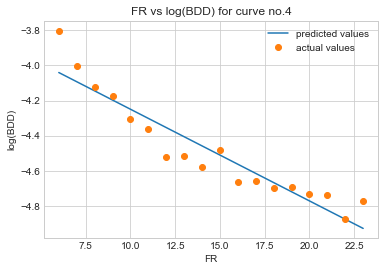

Equation of the line of best fit for curve no. 4: log_of_BDD_pred = -0.05217484597218458*FR + -3.727763430022667
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9396174066938006
The Mean-Squared Error is equal to 0.009720069146236111


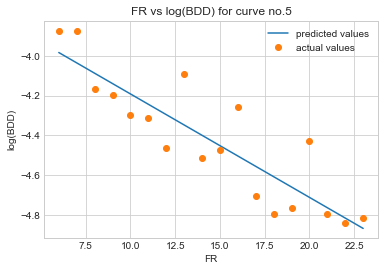

Equation of the line of best fit for curve no. 5: log_of_BDD_pred = -0.05198438724782592*FR + -3.671762330505474
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8790178208420946
The Mean-Squared Error is equal to 0.021400507713565765


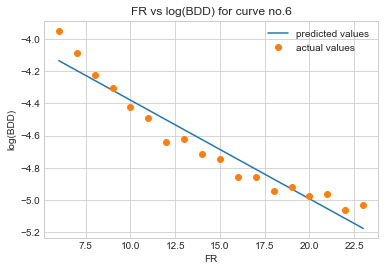

Equation of the line of best fit for curve no. 6: log_of_BDD_pred = -0.06126462771740425*FR + -3.767652811956803
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9641343644799018
The Mean-Squared Error is equal to 0.007656238848480757


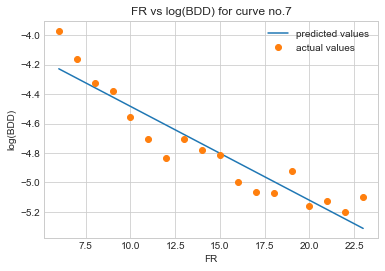

Equation of the line of best fit for curve no. 7: log_of_BDD_pred = -0.06382378879262529*FR + -3.8450525337064776
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9348634104669776
The Mean-Squared Error is equal to 0.015811222232851016


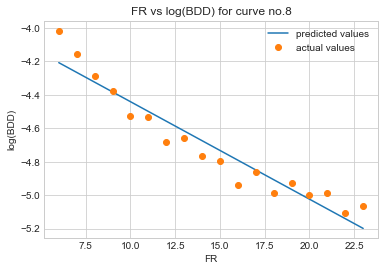

Equation of the line of best fit for curve no. 8: log_of_BDD_pred = -0.05831337449964014*FR + -3.857348761370575
The correlation coeffcient for FR and log(BDD) is equal to r =-0.958040917362434
The Mean-Squared Error is equal to 0.008192892493469455


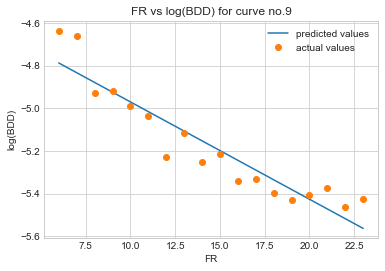

Equation of the line of best fit for curve no. 9: log_of_BDD_pred = -0.04562490098590843*FR + -4.513865884470627
The correlation coeffcient for FR and log(BDD) is equal to r =-0.935481757630321
The Mean-Squared Error is equal to 0.007995140688527328


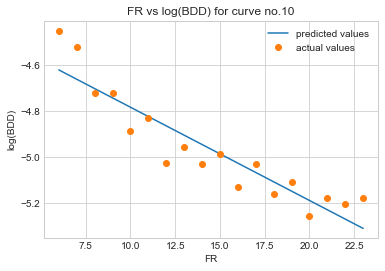

Equation of the line of best fit for curve no. 10: log_of_BDD_pred = -0.0404315165394482*FR + -4.379478567794163
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9213578647923875
The Mean-Squared Error is equal to 0.007831919293704089


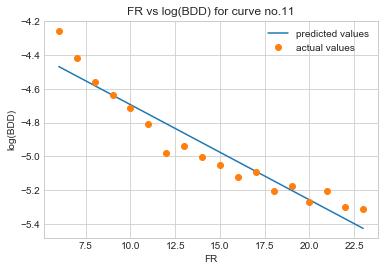

Equation of the line of best fit for curve no. 11: log_of_BDD_pred = -0.05637856962890763*FR + -4.129581301782874
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9532323767586446
The Mean-Squared Error is equal to 0.008601041180968844


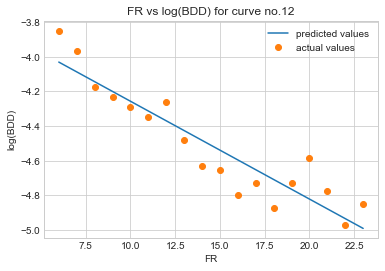

Equation of the line of best fit for curve no. 12: log_of_BDD_pred = -0.05646239106718539*FR + -3.6917569067074982
The correlation coeffcient for FR and log(BDD) is equal to r =-0.923874700841555
The Mean-Squared Error is equal to 0.014723784565407565


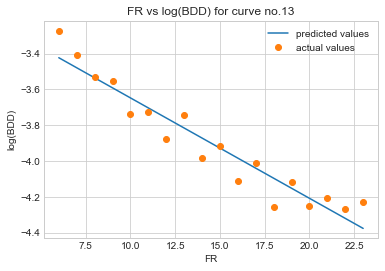

Equation of the line of best fit for curve no. 13: log_of_BDD_pred = -0.05608249512560225*FR + -3.086703158851472
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9563533954371859
The Mean-Squared Error is equal to 0.007903817338757923


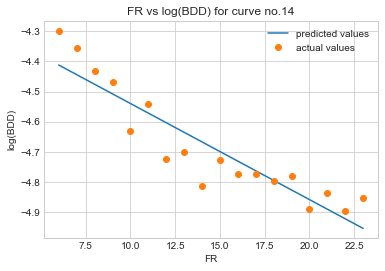

Equation of the line of best fit for curve no. 14: log_of_BDD_pred = -0.0319220646206878*FR + -4.2205689224773835
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9165646233820359
The Mean-Squared Error is equal to 0.005220964469820803


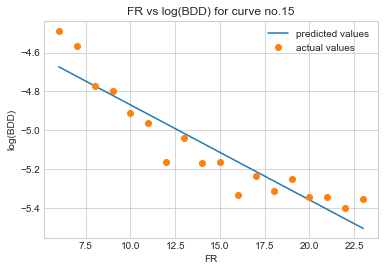

Equation of the line of best fit for curve no. 15: log_of_BDD_pred = -0.04890773787670443*FR + -4.379601925369547
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9293365694775795
The Mean-Squared Error is equal to 0.01016326121098154


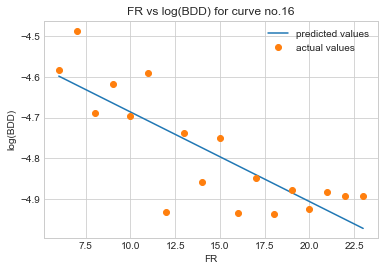

Equation of the line of best fit for curve no. 16: log_of_BDD_pred = -0.022085187236995575*FR + -4.465250748119425
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8153597260436809
The Mean-Squared Error is equal to 0.006619330525595656


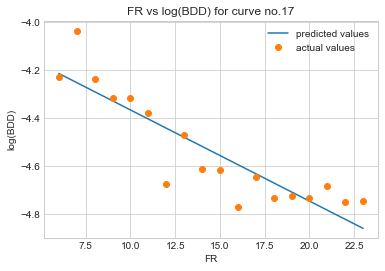

Equation of the line of best fit for curve no. 17: log_of_BDD_pred = -0.03785998233414007*FR + -3.9871150690082446
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8900789099238716
The Mean-Squared Error is equal to 0.010117798628975118


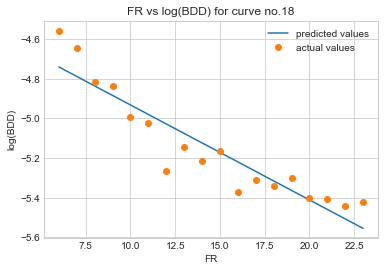

Equation of the line of best fit for curve no. 18: log_of_BDD_pred = -0.04790154538270061*FR + -4.453136718390324
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9258260255539177
The Mean-Squared Error is equal to 0.010292719978999616


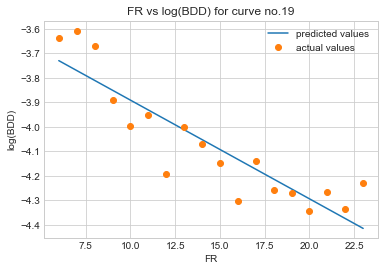

Equation of the line of best fit for curve no. 19: log_of_BDD_pred = -0.040285359269225524*FR + -3.488372225233686
The correlation coeffcient for FR and log(BDD) is equal to r =-0.895195020233886
The Mean-Squared Error is equal to 0.010827202718869621


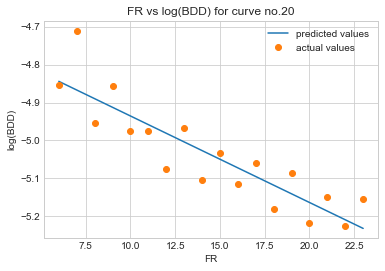

Equation of the line of best fit for curve no. 20: log_of_BDD_pred = -0.022809438640182055*FR + -4.70735303585751
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8834866822132162
The Mean-Squared Error is equal to 0.003937209993588263


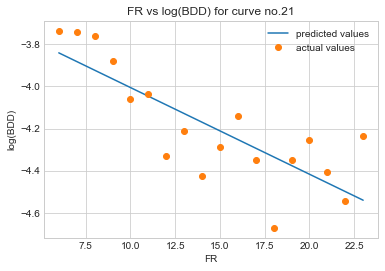

Equation of the line of best fit for curve no. 21: log_of_BDD_pred = -0.0411583809601148*FR + -3.5938551070749885
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8004826057227392
The Mean-Squared Error is equal to 0.025562524252255265


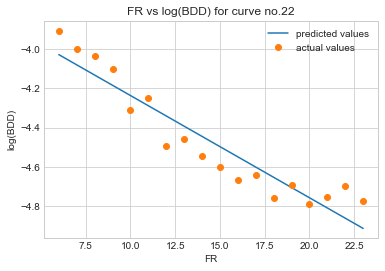

Equation of the line of best fit for curve no. 22: log_of_BDD_pred = -0.05185638606400499*FR + -3.7187573169457906
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9403495796662724
The Mean-Squared Error is equal to 0.009474157274217616


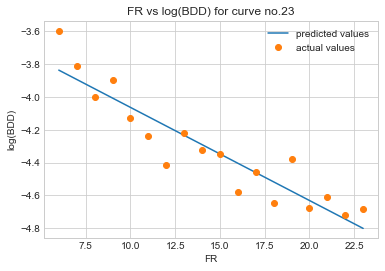

Equation of the line of best fit for curve no. 23: log_of_BDD_pred = -0.05672195899494934*FR + -3.4961638217332576
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9251744990289624
The Mean-Squared Error is equal to 0.014574583266325651


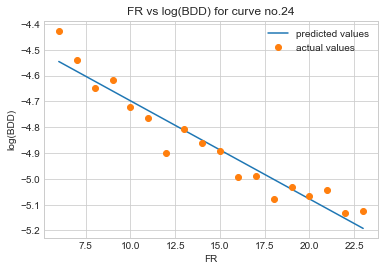

Equation of the line of best fit for curve no. 24: log_of_BDD_pred = -0.03805257543380829*FR + -4.3168505428560175
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9611871962989914
The Mean-Squared Error is equal to 0.0032112010588083418


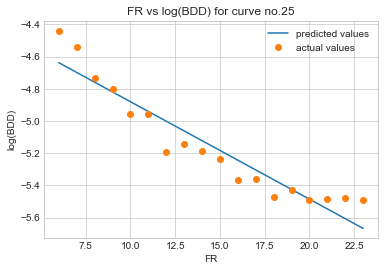

Equation of the line of best fit for curve no. 25: log_of_BDD_pred = -0.06052532528121308*FR + -4.274844370760301
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9476724941490413
The Mean-Squared Error is equal to 0.011189867792201704


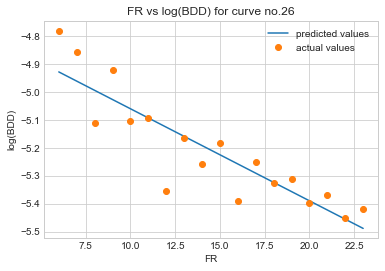

Equation of the line of best fit for curve no. 26: log_of_BDD_pred = -0.03291927553034687*FR + -4.731598042493183
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8837216103969994
The Mean-Squared Error is equal to 0.008181003755739252


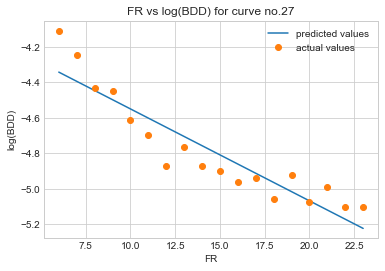

Equation of the line of best fit for curve no. 27: log_of_BDD_pred = -0.05188587747950477*FR + -4.030522195876091
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9225802527255581
The Mean-Squared Error is equal to 0.012672068892297621


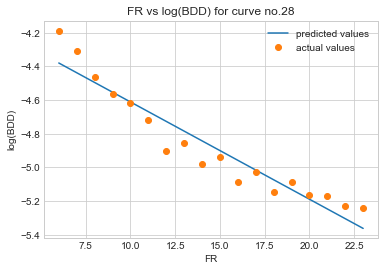

Equation of the line of best fit for curve no. 28: log_of_BDD_pred = -0.057801259174815454*FR + -4.033103551686398
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9532824082955256
The Mean-Squared Error is equal to 0.00903021734359799


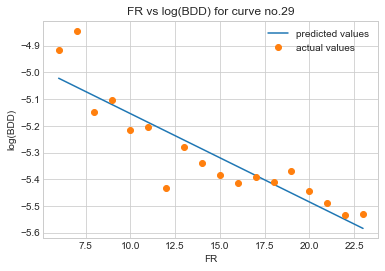

Equation of the line of best fit for curve no. 29: log_of_BDD_pred = -0.033073233607606174*FR + -4.823524302848182
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8943247828420742
The Mean-Squared Error is equal to 0.007369052518002854


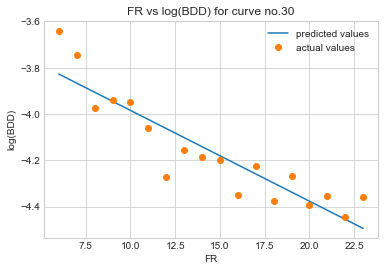

Equation of the line of best fit for curve no. 30: log_of_BDD_pred = -0.03922274187945301*FR + -3.5921392575339643
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9084403806438454
The Mean-Squared Error is equal to 0.008767724412923514


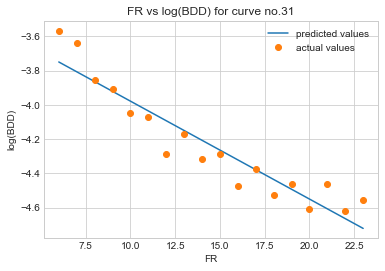

Equation of the line of best fit for curve no. 31: log_of_BDD_pred = -0.05718965599526796*FR + -3.4063241247866283
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9417063914915171
The Mean-Squared Error is equal to 0.011236465139593284


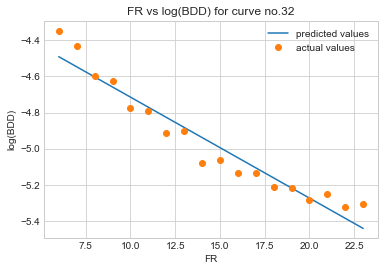

Equation of the line of best fit for curve no. 32: log_of_BDD_pred = -0.055946000246528745*FR + -4.15512344441135
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9653017502389714
The Mean-Squared Error is equal to 0.00616552388525916


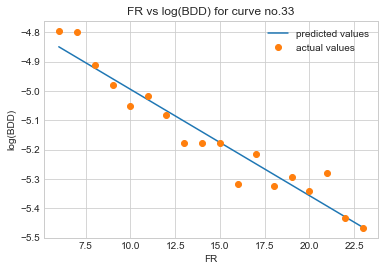

Equation of the line of best fit for curve no. 33: log_of_BDD_pred = -0.03623979568413471*FR + -4.632281446073663
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9636019641666167
The Mean-Squared Error is equal to 0.002721001681832182


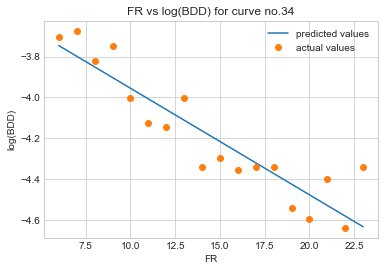

Equation of the line of best fit for curve no. 34: log_of_BDD_pred = -0.052164845838800135*FR + -3.4334762748218814
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9142554533622023
The Mean-Squared Error is equal to 0.014382964721377532


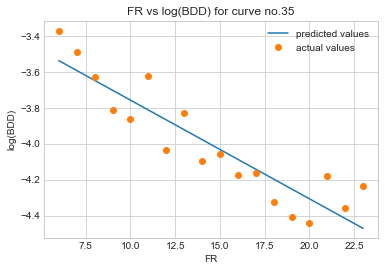

Equation of the line of best fit for curve no. 35: log_of_BDD_pred = -0.05493252004017531*FR + -3.2083642213398473
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9087241649017508
The Mean-Squared Error is equal to 0.017136224957985967


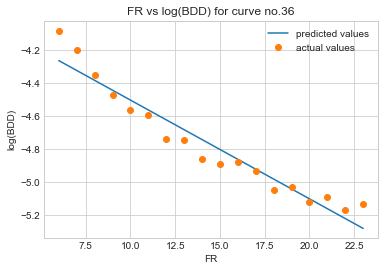

Equation of the line of best fit for curve no. 36: log_of_BDD_pred = -0.059800174078794704*FR + -3.903937237397849
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9646350268151547
The Mean-Squared Error is equal to 0.0071871272377915275


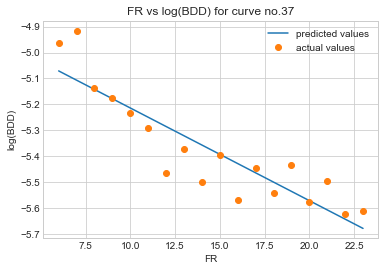

Equation of the line of best fit for curve no. 37: log_of_BDD_pred = -0.035703343555025205*FR + -4.8566438111566965
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8931917613652235
The Mean-Squared Error is equal to 0.008696590006242445


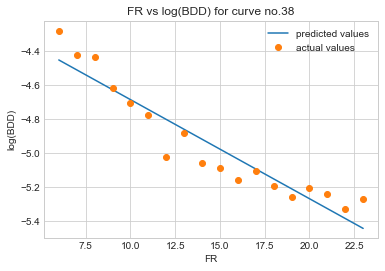

Equation of the line of best fit for curve no. 38: log_of_BDD_pred = -0.05836082486787898*FR + -4.100841571799171
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9444094238894017
The Mean-Squared Error is equal to 0.011110468882526934


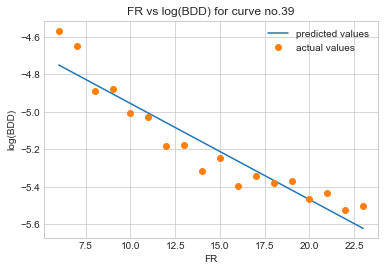

Equation of the line of best fit for curve no. 39: log_of_BDD_pred = -0.0512446993505589*FR + -4.442605791701591
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9451073421517654
The Mean-Squared Error is equal to 0.008449183335216041


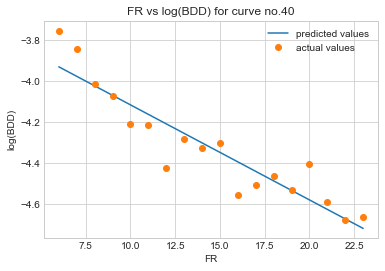

Equation of the line of best fit for curve no. 40: log_of_BDD_pred = -0.046302610245376276*FR + -3.65247986056127
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9239416836990058
The Mean-Squared Error is equal to 0.00989194549992619


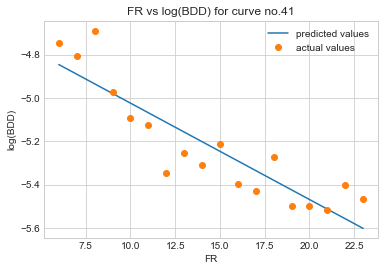

Equation of the line of best fit for curve no. 41: log_of_BDD_pred = -0.04452673386054337*FR + -4.5785443597131925
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8929009634676213
The Mean-Squared Error is equal to 0.013569686956557782


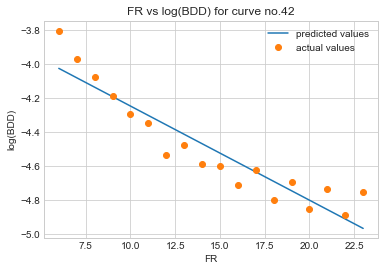

Equation of the line of best fit for curve no. 42: log_of_BDD_pred = -0.05531205511893935*FR + -3.6926562287869142
The correlation coeffcient for FR and log(BDD) is equal to r =-0.93243088677132
The Mean-Squared Error is equal to 0.01236743833842998


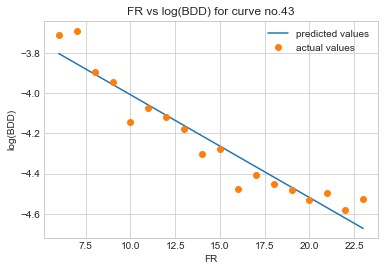

Equation of the line of best fit for curve no. 43: log_of_BDD_pred = -0.05122254062122029*FR + -3.4947327192020334
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9557579327876703
The Mean-Squared Error is equal to 0.0066895699035715225


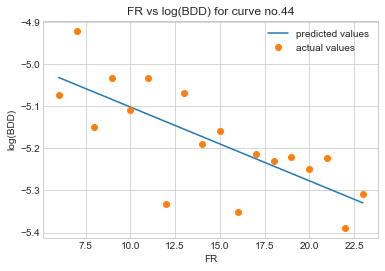

Equation of the line of best fit for curve no. 44: log_of_BDD_pred = -0.017525648647003306*FR + -4.92664738262708
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7483861145048994
The Mean-Squared Error is equal to 0.00649366662267458


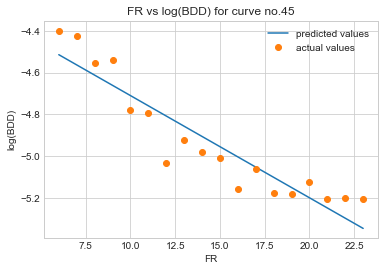

Equation of the line of best fit for curve no. 45: log_of_BDD_pred = -0.04883852763509226*FR + -4.221277579900526
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9273112616287382
The Mean-Squared Error is equal to 0.01045958186368132


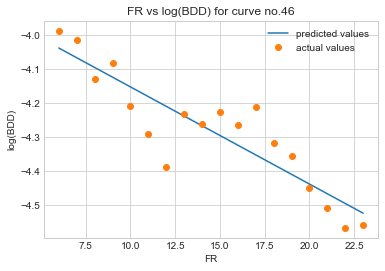

Equation of the line of best fit for curve no. 46: log_of_BDD_pred = -0.028539890737739448*FR + -3.8662553663980352
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8951660703728787
The Mean-Squared Error is equal to 0.005435854217099394


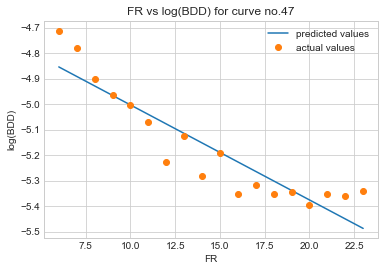

Equation of the line of best fit for curve no. 47: log_of_BDD_pred = -0.03725347943400179*FR + -4.630892687689249
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9159554567705149
The Mean-Squared Error is equal to 0.007169703240261104


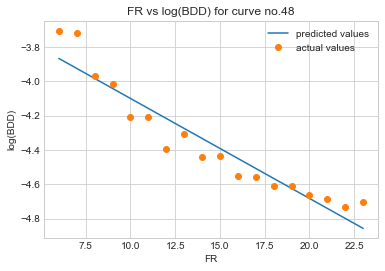

Equation of the line of best fit for curve no. 48: log_of_BDD_pred = -0.05829490599282448*FR + -3.516934050640247
The correlation coeffcient for FR and log(BDD) is equal to r =-0.949292282454115
The Mean-Squared Error is equal to 0.010033064735639355


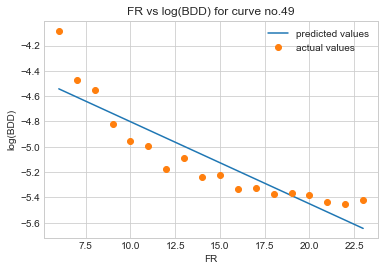

Equation of the line of best fit for curve no. 49: log_of_BDD_pred = -0.06487569314301725*FR + -4.1528788716943135
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8951433875617725
The Mean-Squared Error is equal to 0.028095578573828685
[-0.94816086 -0.94568558 -0.87543428 -0.93576488 -0.93961741 -0.87901782
 -0.96413436 -0.93486341 -0.95804092 -0.93548176 -0.92135786 -0.95323238
 -0.9238747  -0.9563534  -0.91656462 -0.92933657 -0.81535973 -0.89007891
 -0.92582603 -0.89519502 -0.88348668 -0.80048261 -0.94034958 -0.9251745
 -0.9611872  -0.94767249 -0.88372161 -0.92258025 -0.95328241 -0.89432478
 -0.90844038 -0.94170639 -0.96530175 -0.96360196 -0.91425545 -0.90872416
 -0.96463503 -0.89319176 -0.94440942 -0.94510734 -0.92394168 -0.89290096
 -0.93243089 -0.95575793 -0.74838611 -0.92731126 -0.89516607 -0.91595546
 -0.94929228 -0.89514339]
[0.00854873 0.00967861 0.02032946 0.00901276 0.00972007 0.02140051
 0.00765624 0.01581122 0.00819289 0.00799514 0.00783192 0.00860104
 0.0

In [27]:
for i in range(50):
    fitExpRegression(i)
    
print(r_values)
print(mse_values)
print(m_values_expreg)
print(c_values_expreg)

In [28]:
#how to get a general equation? Should be sth like log(BDD) = -0.05*FR - 4
#BDD = e*(-(0.05*FR + 4))
#it's inverse would be BDD = (log(FR) + 4)/(-0.05), BDD = -20log(FR) - 80 but this doesn't fit FR > 24 esp given
#that it is decreasing

(0.0, 20.0)

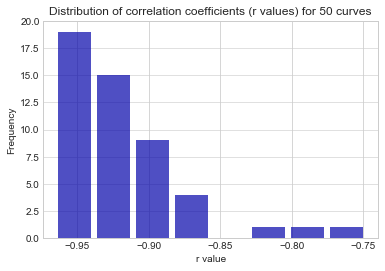

In [29]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

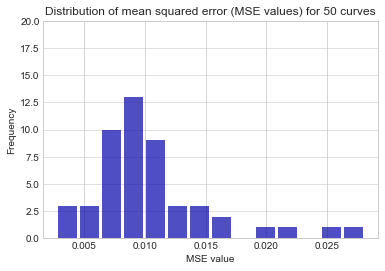

In [30]:
# Plot a histogram for mean squared error values for 50 curves
n, bins, patches = plt.hist(x= mse_values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MSE value')
plt.ylabel('Frequency')
plt.title('Distribution of mean squared error (MSE values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [31]:
import statistics as st

-0.04756947954001013
0.01135776279069114
-0.05123361998588959
-0.0512446993505589
-0.05122254062122029


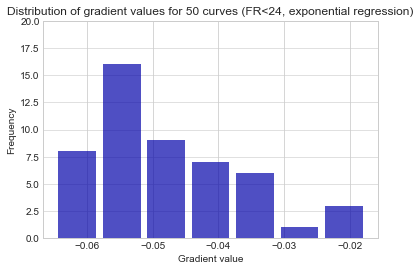

In [32]:
#Gradient of the line
# Plot a histogram for graident values for 50 curves

n, bins, patches = plt.hist(x= m_values_expreg, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Gradient value')
plt.ylabel('Frequency')
plt.title('Distribution of gradient values for 50 curves (FR<24, exponential regression)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#Other stats for gradient
print(st.mean(m_values_expreg))
print(st.stdev(m_values_expreg)) 
print(st.median(m_values_expreg)) 
print(st.median_low(m_values_expreg)) 
print(st.median_high(m_values_expreg)) 


-4.008767935978423
0.47218508629345995
-4.008818632442168
-4.030522195876091
-3.9871150690082446


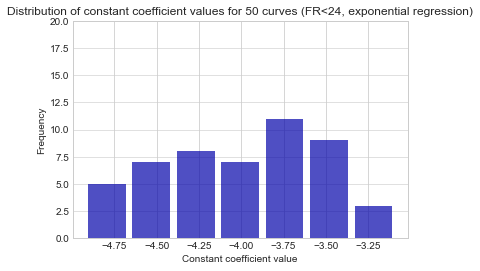

In [33]:
#constant c of the line
# Plot a histogram for c values for 50 curves

n, bins, patches = plt.hist(x= c_values_expreg, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Constant coefficient value')
plt.ylabel('Frequency')
plt.title('Distribution of constant coefficient values for 50 curves (FR<24, exponential regression)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#Other stats 
print(st.mean(c_values_expreg)) 
print(st.stdev(c_values_expreg)) 
print(st.median(c_values_expreg)) 
print(st.median_low(c_values_expreg)) 
print(st.median_high(c_values_expreg)) 

In [34]:
#REGRESSION FOR FR > 24

r_values_log = np.zeros(50)
mse_values_log = np.zeros(50)
m_values = np.zeros(50)
c_values = np.zeros(50)
# where y = mx + c / we want to store the gradient values to analyse them later

def fitLogRegression(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    exp_of_BDD = np.exp(BDD) #log-y-axis
    curve_fit = np.polyfit(FR, exp_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, exp_of_BDD, "o", label = 'actual values')
    plt.title("FR vs exp(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('exp(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    exp_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'exp_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, exp_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and exp(BDD) is equal to r =' + str(r))
    r_values_log[curve] = r

#mean-squared-error
    mse = mean_squared_error(exp_of_BDD, exp_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values_log[curve]=mse
    
#store gradient value and c-value
    m_values[curve]= curve_fit[0]
    c_values[curve]= curve_fit[1]

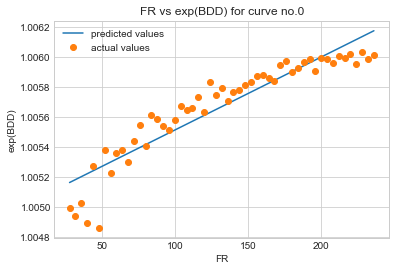

Equation of the line of best fit for curve no. 0: exp_of_BDD_pred = 4.8740562382242455e-06*FR + 1.0050267549878362
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9256107001697094
The Mean-Squared Error is equal to 1.4870964623989176e-08


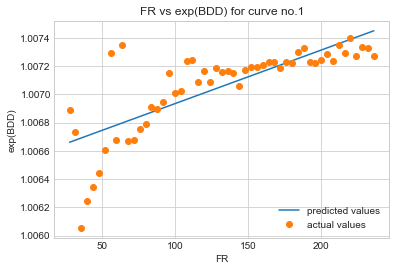

Equation of the line of best fit for curve no. 1: exp_of_BDD_pred = 3.7980467671290817e-06*FR + 1.006554475395611
The correlation coeffcient for FR and exp(BDD) is equal to r =0.7676332400046411
The Mean-Squared Error is equal to 3.764567373404495e-08


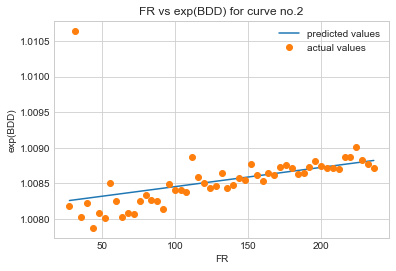

Equation of the line of best fit for curve no. 2: exp_of_BDD_pred = 2.7090013616222727e-06*FR + 1.008181497316179
The correlation coeffcient for FR and exp(BDD) is equal to r =0.4169530672575051
The Mean-Squared Error is equal to 1.3056865226277492e-07


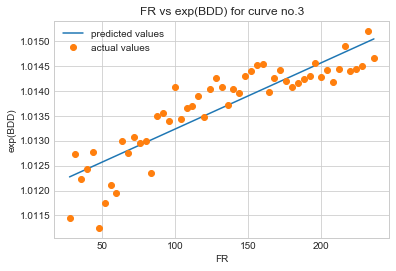

Equation of the line of best fit for curve no. 3: exp_of_BDD_pred = 1.3301205209997995e-05*FR + 1.0119007929527193
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8857472729463243
The Mean-Squared Error is equal to 1.819065105572516e-07


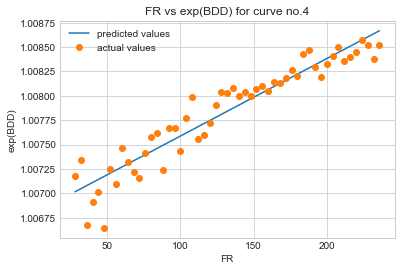

Equation of the line of best fit for curve no. 4: exp_of_BDD_pred = 7.944904856198479e-06*FR + 1.0067930838846932
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9452675685527574
The Mean-Squared Error is equal to 2.8159686395824443e-08


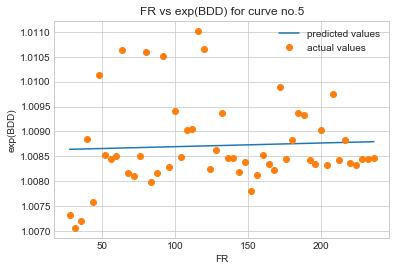

Equation of the line of best fit for curve no. 5: exp_of_BDD_pred = 7.398509987662008e-07*FR + 1.0086185018043867
The correlation coeffcient for FR and exp(BDD) is equal to r =0.05228844438957029
The Mean-Squared Error is equal to 7.475218700338195e-07


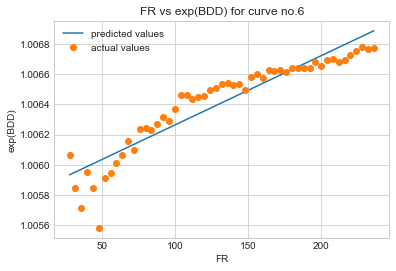

Equation of the line of best fit for curve no. 6: exp_of_BDD_pred = 4.5865697909413434e-06*FR + 1.005805520764903
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9294709670383388
The Mean-Squared Error is equal to 1.2406416944995155e-08


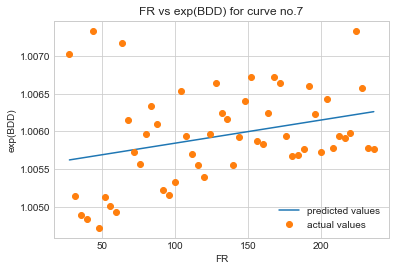

Equation of the line of best fit for curve no. 7: exp_of_BDD_pred = 3.0827949517391544e-06*FR + 1.0055354801987433
The correlation coeffcient for FR and exp(BDD) is equal to r =0.3020295690762474
The Mean-Squared Error is equal to 3.5447373706487407e-07


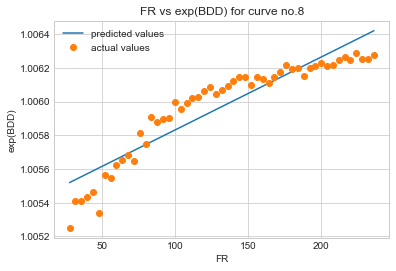

Equation of the line of best fit for curve no. 8: exp_of_BDD_pred = 4.329499665461181e-06*FR + 1.005398244726146
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9261951482867775
The Mean-Squared Error is equal to 1.163031437512288e-08


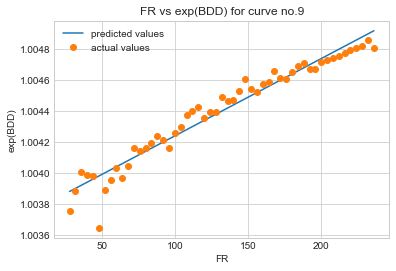

Equation of the line of best fit for curve no. 9: exp_of_BDD_pred = 4.98407442225251e-06*FR + 1.0037413996551072
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9720806974509624
The Mean-Squared Error is equal to 5.41912895356664e-09


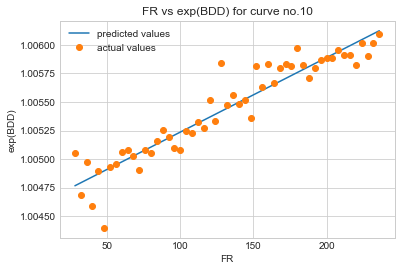

Equation of the line of best fit for curve no. 10: exp_of_BDD_pred = 6.534714647139292e-06*FR + 1.0045826293126514
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9426106565493635
The Mean-Squared Error is equal to 2.0060484985567437e-08


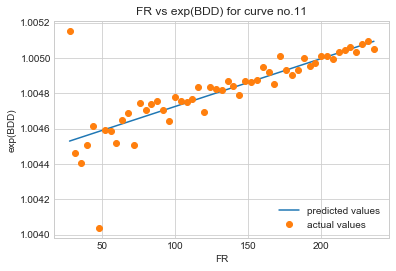

Equation of the line of best fit for curve no. 11: exp_of_BDD_pred = 2.714046361297142e-06*FR + 1.0044530657796442
The correlation coeffcient for FR and exp(BDD) is equal to r =0.800079877475253
The Mean-Squared Error is equal to 1.5504292565792163e-08


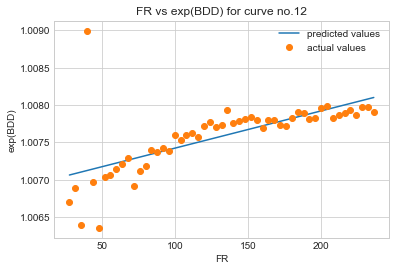

Equation of the line of best fit for curve no. 12: exp_of_BDD_pred = 4.990525926287257e-06*FR + 1.0069231517287642
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6812253404174395
The Mean-Squared Error is equal to 1.0768534433475032e-07


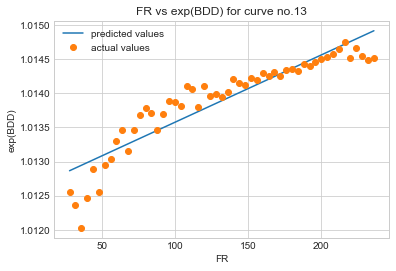

Equation of the line of best fit for curve no. 13: exp_of_BDD_pred = 9.860984023127037e-06*FR + 1.0125888307333508
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9157465756168617
The Mean-Squared Error is equal to 7.007310517412838e-08


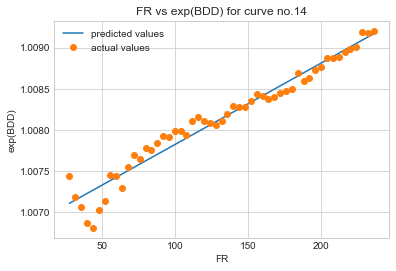

Equation of the line of best fit for curve no. 14: exp_of_BDD_pred = 9.924065004148621e-06*FR + 1.0068271416597132
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9756911482019213
The Mean-Squared Error is equal to 1.8602606979794262e-08


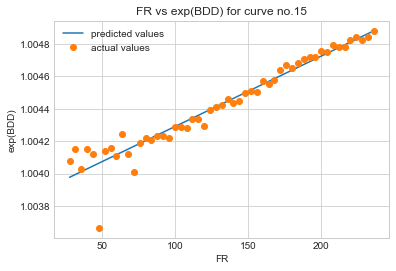

Equation of the line of best fit for curve no. 15: exp_of_BDD_pred = 4.347453024316019e-06*FR + 1.00385491816597
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9634726242724551
The Mean-Squared Error is equal to 5.467265945051923e-09


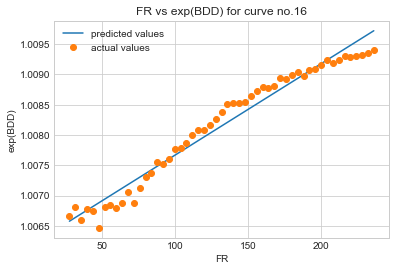

Equation of the line of best fit for curve no. 16: exp_of_BDD_pred = 1.511409860285629e-05*FR + 1.0061536594061926
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9822651445879426
The Mean-Squared Error is equal to 3.1162498609091795e-08


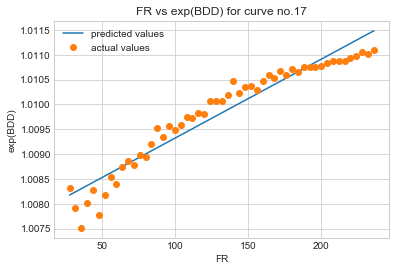

Equation of the line of best fit for curve no. 17: exp_of_BDD_pred = 1.589952695910325e-05*FR + 1.0077293292511231
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9619885312316651
The Mean-Squared Error is equal to 7.6273833346829e-08


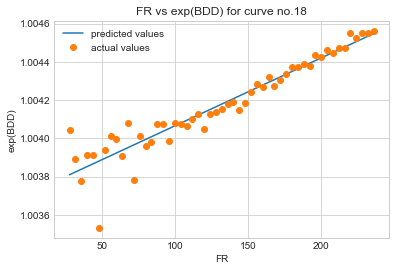

Equation of the line of best fit for curve no. 18: exp_of_BDD_pred = 3.553084652041359e-06*FR + 1.0037100155158771
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9445097087740473
The Mean-Squared Error is equal to 5.716908172269319e-09


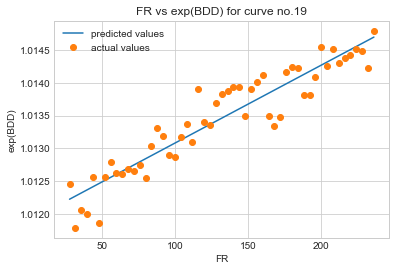

Equation of the line of best fit for curve no. 19: exp_of_BDD_pred = 1.1871317201573939e-05*FR + 1.0118944012806745
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9364754516829918
The Mean-Squared Error is equal to 7.401068873549915e-08


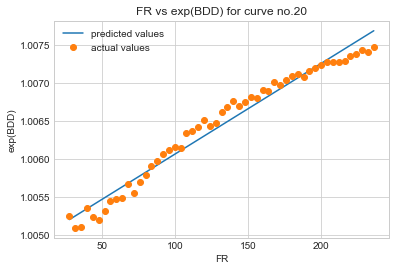

Equation of the line of best fit for curve no. 20: exp_of_BDD_pred = 1.1991360335531638e-05*FR + 1.0048647121123162
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9848771892592437
The Mean-Squared Error is equal to 1.665999041587561e-08


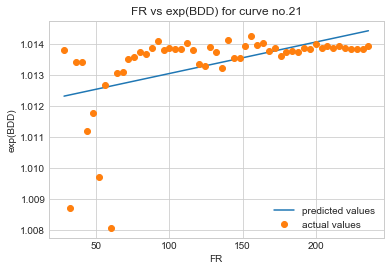

Equation of the line of best fit for curve no. 21: exp_of_BDD_pred = 1.0148796707927109e-05*FR + 1.01203101310949
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5006288328493382
The Mean-Squared Error is equal to 1.1530017847014516e-06


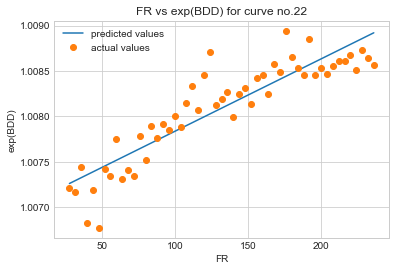

Equation of the line of best fit for curve no. 22: exp_of_BDD_pred = 7.989495393294121e-06*FR + 1.007035321406234
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8977112133627478
The Mean-Squared Error is equal to 5.756511706267725e-08


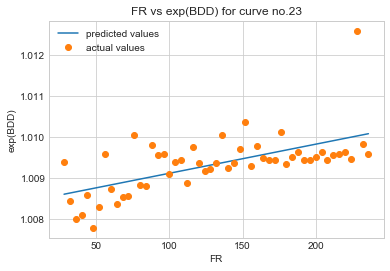

Equation of the line of best fit for curve no. 23: exp_of_BDD_pred = 7.084107767405197e-06*FR + 1.0084078934284855
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6125922300023
The Mean-Squared Error is equal to 3.1279231937342854e-07


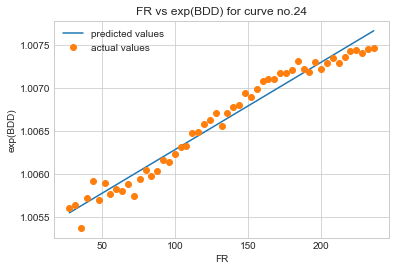

Equation of the line of best fit for curve no. 24: exp_of_BDD_pred = 1.0173473237571669e-05*FR + 1.0052684338673497
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9825435071968145
The Mean-Squared Error is equal to 1.3891542573165891e-08


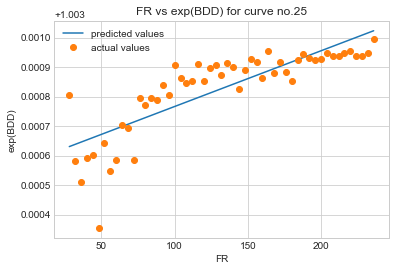

Equation of the line of best fit for curve no. 25: exp_of_BDD_pred = 1.8879946664229395e-06*FR + 1.0035776342926432
The correlation coeffcient for FR and exp(BDD) is equal to r =0.819888266466638
The Mean-Squared Error is equal to 6.507508663767103e-09


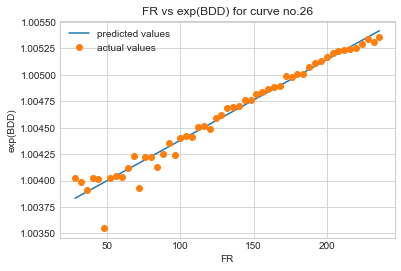

Equation of the line of best fit for curve no. 26: exp_of_BDD_pred = 7.616644299230825e-06*FR + 1.00361894044102
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9830448635769462
The Mean-Squared Error is equal to 7.557015972526425e-09


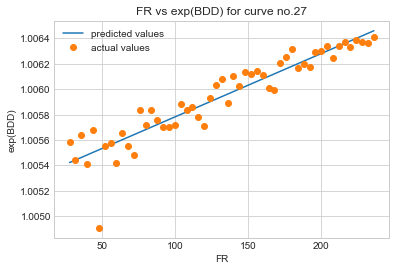

Equation of the line of best fit for curve no. 27: exp_of_BDD_pred = 4.987894497583935e-06*FR + 1.0052833227563192
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9277182087053426
The Mean-Squared Error is equal to 1.5080323311392893e-08


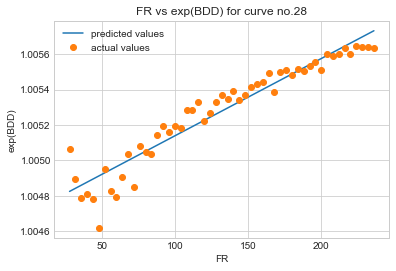

Equation of the line of best fit for curve no. 28: exp_of_BDD_pred = 4.365189946491836e-06*FR + 1.004702700728039
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9538982824684583
The Mean-Squared Error is equal to 7.062477148371179e-09


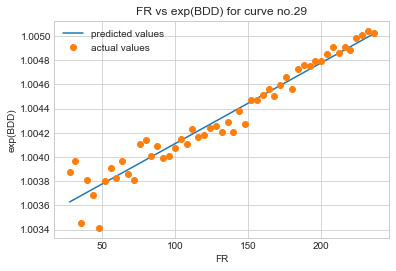

Equation of the line of best fit for curve no. 29: exp_of_BDD_pred = 6.691701093990808e-06*FR + 1.0034404343867855
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9692858700719794
The Mean-Squared Error is equal to 1.079324724101655e-08


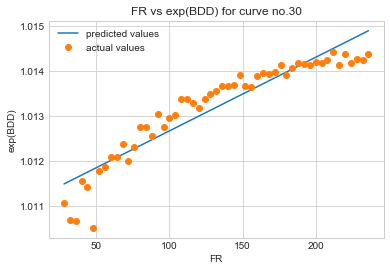

Equation of the line of best fit for curve no. 30: exp_of_BDD_pred = 1.6310473459124555e-05*FR + 1.0110406898685937
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9320771393930175
The Mean-Squared Error is equal to 1.5045467717235776e-07


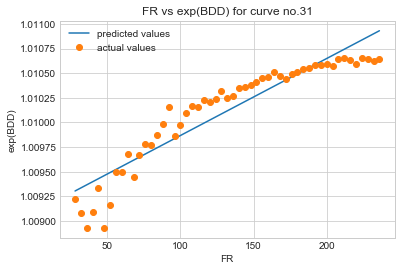

Equation of the line of best fit for curve no. 31: exp_of_BDD_pred = 7.81380909559449e-06*FR + 1.0090863466597328
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9312473259760269
The Mean-Squared Error is equal to 3.499925863296149e-08


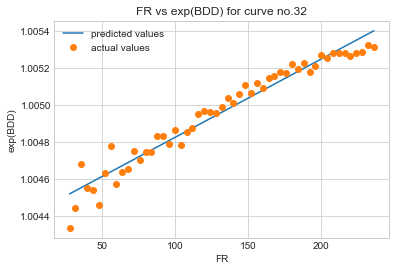

Equation of the line of best fit for curve no. 32: exp_of_BDD_pred = 4.222909775587972e-06*FR + 1.0044030440835756
The correlation coeffcient for FR and exp(BDD) is equal to r =0.974128164673041
The Mean-Squared Error is equal to 3.593600772166798e-09


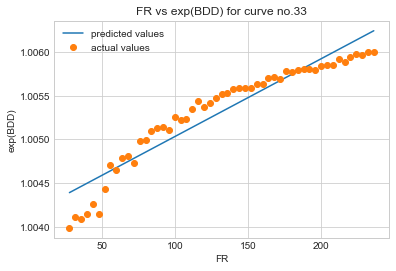

Equation of the line of best fit for curve no. 33: exp_of_BDD_pred = 8.885178407451476e-06*FR + 1.0041446096155744
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9474831685094536
The Mean-Squared Error is equal to 3.36742061589113e-08


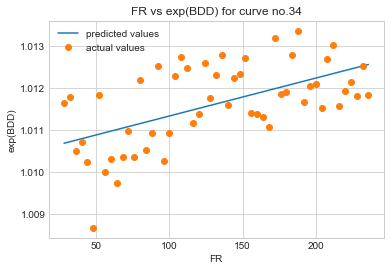

Equation of the line of best fit for curve no. 34: exp_of_BDD_pred = 9.024495385403644e-06*FR + 1.010427165757492
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5717234436392598
The Mean-Squared Error is equal to 6.279283998836825e-07


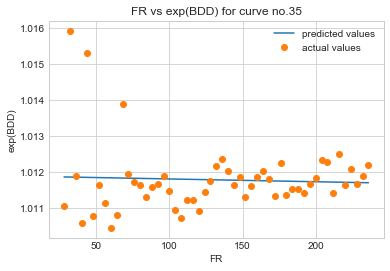

Equation of the line of best fit for curve no. 35: exp_of_BDD_pred = -7.722907014613287e-07*FR + 1.0118952507586534
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.05022997788527513
The Mean-Squared Error is equal to 8.828244373032503e-07


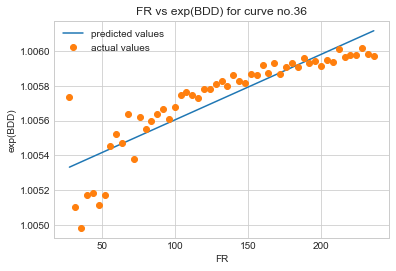

Equation of the line of best fit for curve no. 36: exp_of_BDD_pred = 3.759365514763789e-06*FR + 1.0052277865510468
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8718348655173472
The Mean-Squared Error is equal to 1.6700670620297533e-08


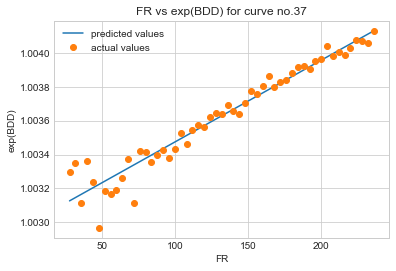

Equation of the line of best fit for curve no. 37: exp_of_BDD_pred = 4.821420032392421e-06*FR + 1.0029919396744023
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9691495712951439
The Mean-Squared Error is equal to 5.629166167204098e-09


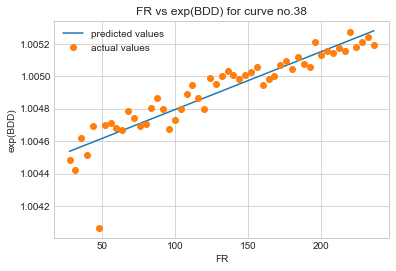

Equation of the line of best fit for curve no. 38: exp_of_BDD_pred = 3.573565332116216e-06*FR + 1.0044368378798718
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9127746345822982
The Mean-Squared Error is equal to 9.574558753878176e-09


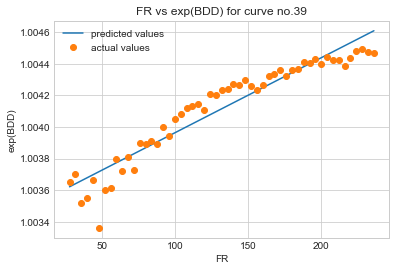

Equation of the line of best fit for curve no. 39: exp_of_BDD_pred = 4.747180672987057e-06*FR + 1.0034891403557353
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9512852163743454
The Mean-Squared Error is equal to 8.862727548256905e-09


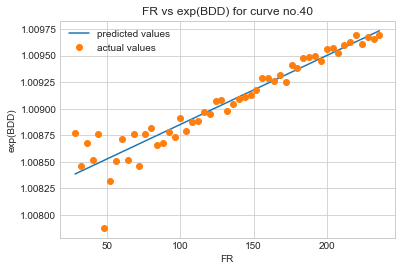

Equation of the line of best fit for curve no. 40: exp_of_BDD_pred = 6.485551056148931e-06*FR + 1.0082031154989317
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9471452780738123
The Mean-Squared Error is equal to 1.806668848872861e-08


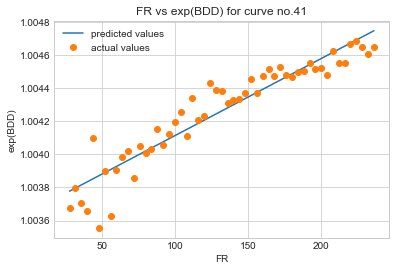

Equation of the line of best fit for curve no. 41: exp_of_BDD_pred = 4.66505763115784e-06*FR + 1.0036470327093812
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9403502182125146
The Mean-Squared Error is equal to 1.0664968827131483e-08


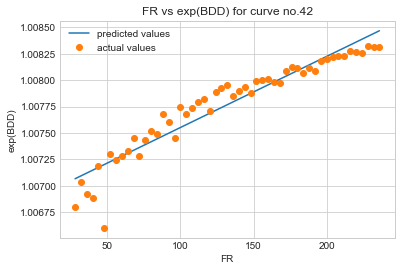

Equation of the line of best fit for curve no. 42: exp_of_BDD_pred = 6.746165873844013e-06*FR + 1.0068767196687234
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9485069541175585
The Mean-Squared Error is equal to 1.9002877727029877e-08


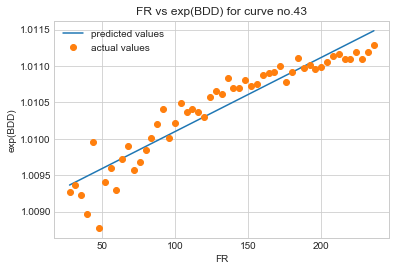

Equation of the line of best fit for curve no. 43: exp_of_BDD_pred = 1.0187432816208516e-05*FR + 1.0090795470553182
The correlation coeffcient for FR and exp(BDD) is equal to r =0.938142388041053
The Mean-Squared Error is equal to 5.293058171007829e-08


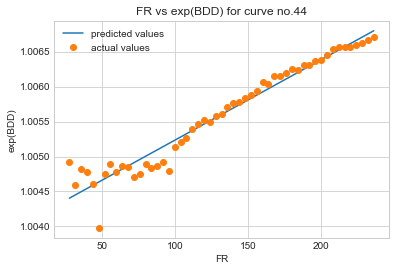

Equation of the line of best fit for curve no. 44: exp_of_BDD_pred = 1.1509589296159384e-05*FR + 1.0040821754480673
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9732925247950497
The Mean-Squared Error is equal to 2.7592625232001918e-08


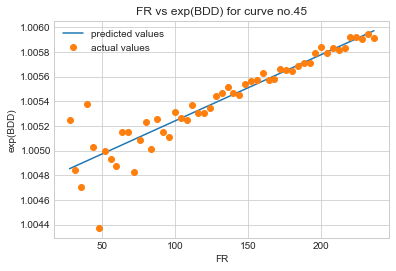

Equation of the line of best fit for curve no. 45: exp_of_BDD_pred = 5.374868579475917e-06*FR + 1.0047023426507353
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9239343768187419
The Mean-Squared Error is equal to 1.8542486419916677e-08


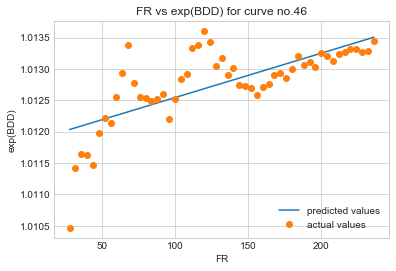

Equation of the line of best fit for curve no. 46: exp_of_BDD_pred = 7.073431552423446e-06*FR + 1.0118352967992144
The correlation coeffcient for FR and exp(BDD) is equal to r =0.717932183461042
The Mean-Squared Error is equal to 1.7611196328371552e-07


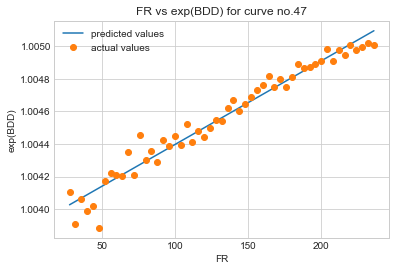

Equation of the line of best fit for curve no. 47: exp_of_BDD_pred = 5.126514578714173e-06*FR + 1.003883769691642
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9783358406630722
The Mean-Squared Error is equal to 4.406016974427003e-09


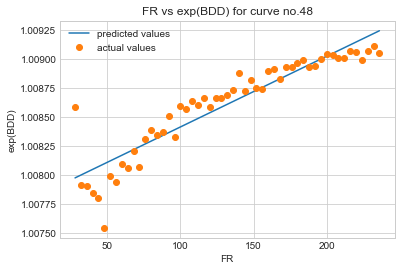

Equation of the line of best fit for curve no. 48: exp_of_BDD_pred = 6.102081609224635e-06*FR + 1.0078032441884275
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9191633198686647
The Mean-Squared Error is equal to 2.559922967976289e-08


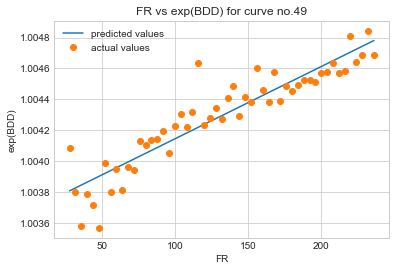

Equation of the line of best fit for curve no. 49: exp_of_BDD_pred = 4.674353282253319e-06*FR + 1.0036774434204632
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9201163878400394
The Mean-Squared Error is equal to 1.4821038065818988e-08
[ 0.9256107   0.76763324  0.41695307  0.88574727  0.94526757  0.05228844
  0.92947097  0.30202957  0.92619515  0.9720807   0.94261066  0.80007988
  0.68122534  0.91574658  0.97569115  0.96347262  0.98226514  0.96198853
  0.94450971  0.93647545  0.98487719  0.50062883  0.89771121  0.61259223
  0.98254351  0.81988827  0.98304486  0.92771821  0.95389828  0.96928587
  0.93207714  0.93124733  0.97412816  0.94748317  0.57172344 -0.05022998
  0.87183487  0.96914957  0.91277463  0.95128522  0.94714528  0.94035022
  0.94850695  0.93814239  0.97329252  0.92393438  0.71793218  0.97833584
  0.91916332  0.92011639]
[1.48709646e-08 3.76456737e-08 1.30568652e-07 1.81906511e-07
 2.81596864e-08 7.47521870e-07 1.24064169e-08 3.54473737e-07
 1.16303144e-0

In [35]:
for i in range(50):
    fitLogRegression(i)
    
print(r_values_log)
print(mse_values_log)

#looks like we squared linear values ?

(0.0, 30.0)

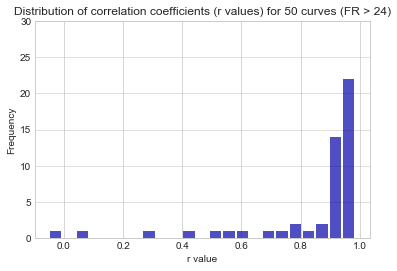

In [37]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values_log, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves (FR > 24)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# Set a clean upper y-axis limit.

(0.0, 40.0)

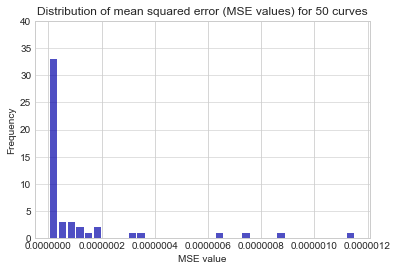

In [38]:
# Plot a histogram for mean squared error values for 50 curves
n, bins, patches = plt.hist(x= mse_values_log, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MSE value')
plt.ylabel('Frequency')
plt.title('Distribution of mean squared error (MSE values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [41]:
#TRY LINEAR REGRESSION

r_values_lin = np.zeros(50)
mse_values_lin = np.zeros(50)

def fitLinearRegression(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])
    curve_fit = np.polyfit(FR, BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, BDD, "o", label = 'actual values')
    plt.title("FR vs BDD for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('BDD')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and BDD is equal to r =' + str(r))
    r_values_lin[curve] = r

#mean-squared-error
    mse = mean_squared_error(BDD, BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values_lin[curve]=mse

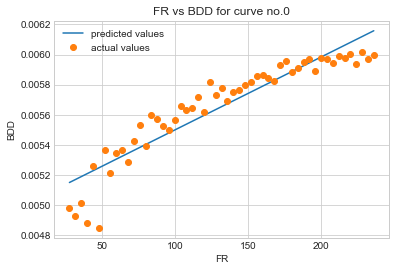

Equation of the line of best fit for curve no. 0: BDD_pred = 4.847058366282497e-06*FR + 0.005014252691222108
The correlation coeffcient for FR and BDD is equal to r =0.9255567616090794
The Mean-Squared Error is equal to 1.4718644151871805e-08


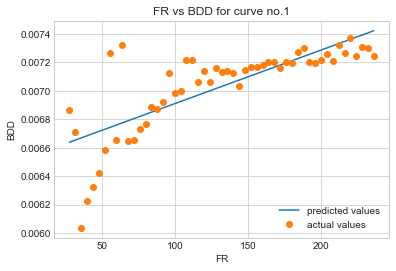

Equation of the line of best fit for curve no. 1: BDD_pred = 3.772039606793616e-06*FR + 0.006533087333790861
The correlation coeffcient for FR and BDD is equal to r =0.7675842011110805
The Mean-Squared Error is equal to 3.714343220537221e-08


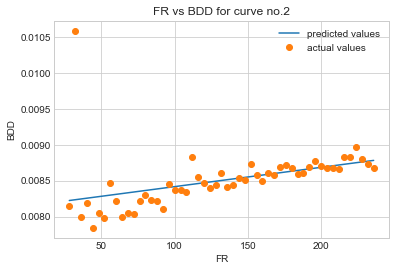

Equation of the line of best fit for curve no. 2: BDD_pred = 2.6874656078939907e-06*FR + 0.00814801063184767
The correlation coeffcient for FR and BDD is equal to r =0.4173780662033609
The Mean-Squared Error is equal to 1.2818433760927536e-07


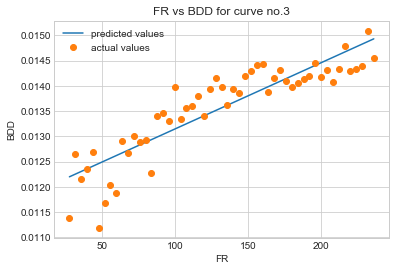

Equation of the line of best fit for curve no. 3: BDD_pred = 1.3125476158609748e-05*FR + 0.011831167791504942
The correlation coeffcient for FR and BDD is equal to r =0.8856209276015986
The Mean-Squared Error is equal to 1.773663356039175e-07


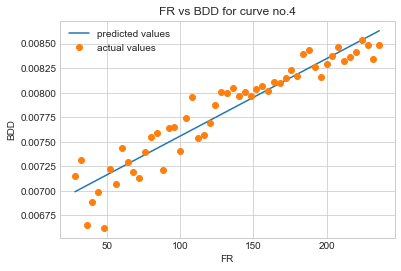

Equation of the line of best fit for curve no. 4: BDD_pred = 7.883698441124002e-06*FR + 0.00677044571438084
The correlation coeffcient for FR and BDD is equal to r =0.9452143268875166
The Mean-Squared Error is equal to 2.7756820542794135e-08


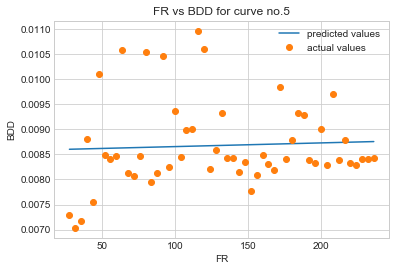

Equation of the line of best fit for curve no. 5: BDD_pred = 7.371485964238515e-07*FR + 0.0085807239247519
The correlation coeffcient for FR and BDD is equal to r =0.052571608978627615
The Mean-Squared Error is equal to 7.340766912948176e-07


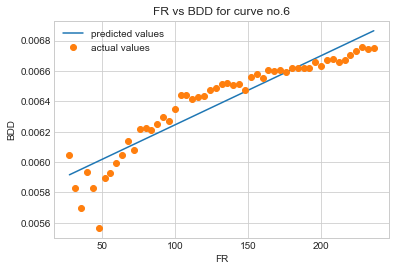

Equation of the line of best fit for curve no. 6: BDD_pred = 4.55774070680373e-06*FR + 0.005788818474154196
The correlation coeffcient for FR and BDD is equal to r =0.929420287047302
The Mean-Squared Error is equal to 1.2260763099825477e-08


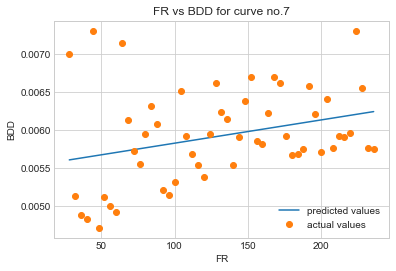

Equation of the line of best fit for curve no. 7: BDD_pred = 3.066447547387958e-06*FR + 0.005519858864262567
The correlation coeffcient for FR and BDD is equal to r =0.302231191415653
The Mean-Squared Error is equal to 3.502095620094085e-07


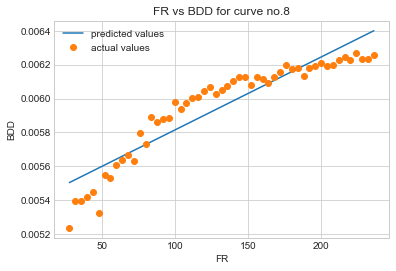

Equation of the line of best fit for curve no. 8: BDD_pred = 4.3042203673711886e-06*FR + 0.0053837928751760975
The correlation coeffcient for FR and BDD is equal to r =0.9261554826016913
The Mean-Squared Error is equal to 1.1501821683903056e-08


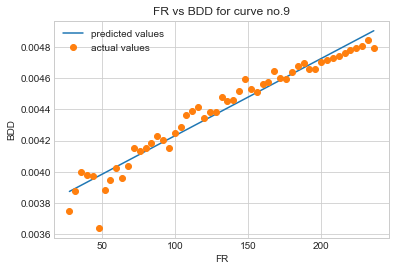

Equation of the line of best fit for curve no. 9: BDD_pred = 4.9624601850004475e-06*FR + 0.0037345553264761895
The correlation coeffcient for FR and BDD is equal to r =0.9720514366914114
The Mean-Squared Error is equal to 5.378103354694585e-09


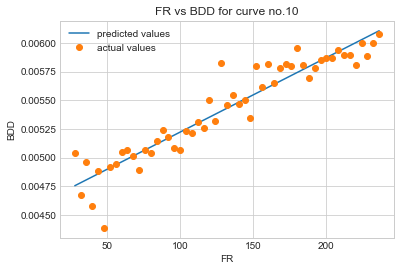

Equation of the line of best fit for curve no. 10: BDD_pred = 6.4996067713888666e-06*FR + 0.004572402979585566
The correlation coeffcient for FR and BDD is equal to r =0.9425810408965205
The Mean-Squared Error is equal to 1.98566996102879e-08


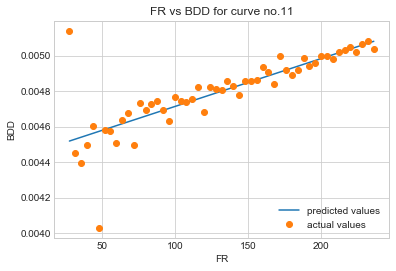

Equation of the line of best fit for curve no. 11: BDD_pred = 2.7012288040218792e-06*FR + 0.004443198950853884
The correlation coeffcient for FR and BDD is equal to r =0.8000440908022967
The Mean-Squared Error is equal to 1.5362012944016915e-08


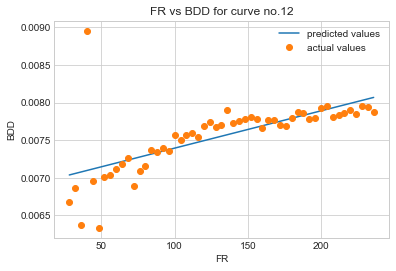

Equation of the line of best fit for curve no. 12: BDD_pred = 4.9544740240016004e-06*FR + 0.006899213455294825
The correlation coeffcient for FR and BDD is equal to r =0.6813588816899979
The Mean-Squared Error is equal to 1.0605749097989315e-07


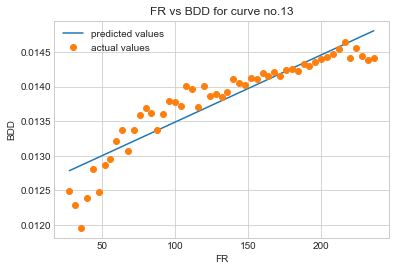

Equation of the line of best fit for curve no. 13: BDD_pred = 9.728061987454677e-06*FR + 0.012510576618744603
The correlation coeffcient for FR and BDD is equal to r =0.9156263017041215
The Mean-Squared Error is equal to 6.830773056099005e-08


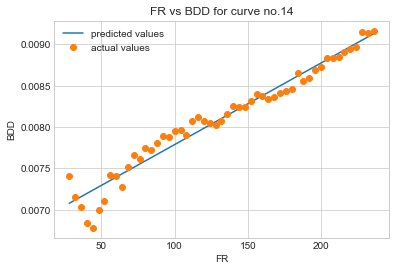

Equation of the line of best fit for curve no. 14: BDD_pred = 9.844395976312606e-06*FR + 0.006804539551938606
The correlation coeffcient for FR and BDD is equal to r =0.9756493153915103
The Mean-Squared Error is equal to 1.833781277151452e-08


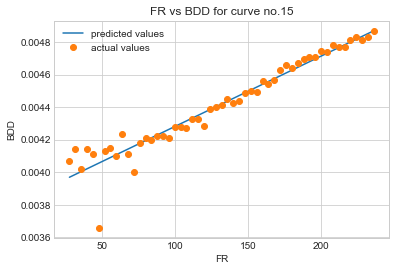

Equation of the line of best fit for curve no. 15: BDD_pred = 4.328285377538481e-06*FR + 0.0038476323192224624
The correlation coeffcient for FR and BDD is equal to r =0.9634486876581017
The Mean-Squared Error is equal to 5.4229171130243434e-09


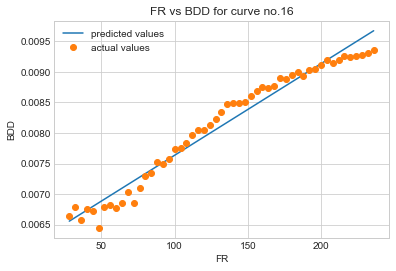

Equation of the line of best fit for curve no. 16: BDD_pred = 1.4993519431030816e-05*FR + 0.006136118135462073
The correlation coeffcient for FR and BDD is equal to r =0.9822181709949713
The Mean-Squared Error is equal to 3.075069726446312e-08


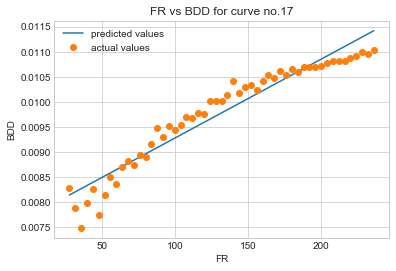

Equation of the line of best fit for curve no. 17: BDD_pred = 1.5748223206429016e-05*FR + 0.0077008183343769574
The correlation coeffcient for FR and BDD is equal to r =0.9618829525132934
The Mean-Squared Error is equal to 7.504933603445436e-08


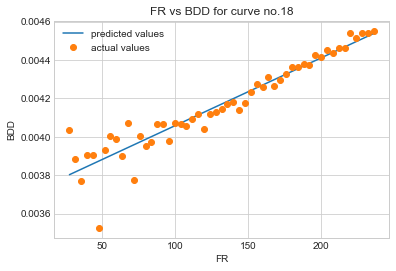

Equation of the line of best fit for curve no. 18: BDD_pred = 3.538290273239337e-06*FR + 0.0037032342382256602
The correlation coeffcient for FR and BDD is equal to r =0.9444853568636795
The Mean-Squared Error is equal to 5.672108482672133e-09


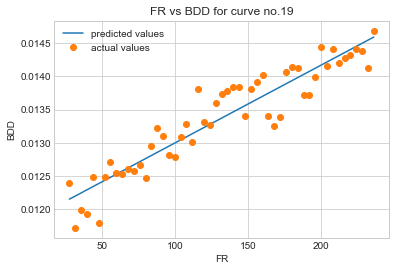

Equation of the line of best fit for curve no. 19: BDD_pred = 1.1714694508046515e-05*FR + 0.011824982682965066
The correlation coeffcient for FR and BDD is equal to r =0.9364379104876183
The Mean-Squared Error is equal to 7.211764609171203e-08


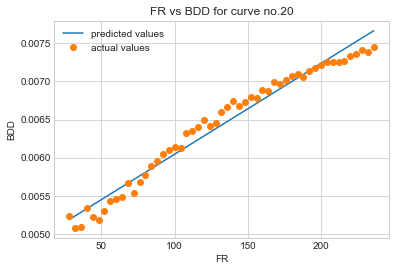

Equation of the line of best fit for curve no. 20: BDD_pred = 1.191569426387036e-05*FR + 0.004853729340639943
The correlation coeffcient for FR and BDD is equal to r =0.9848332212389425
The Mean-Squared Error is equal to 1.6499338579330622e-08


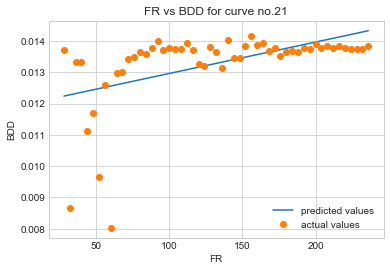

Equation of the line of best fit for curve no. 21: BDD_pred = 1.0029013102170445e-05*FR + 0.011957475182184468
The correlation coeffcient for FR and BDD is equal to r =0.5003879415529027
The Mean-Squared Error is equal to 1.1273922459720175e-06


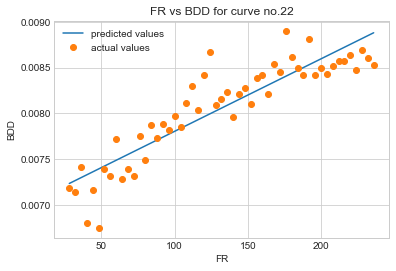

Equation of the line of best fit for curve no. 22: BDD_pred = 7.92648822751287e-06*FR + 0.007010944312034273
The correlation coeffcient for FR and BDD is equal to r =0.8976742837283969
The Mean-Squared Error is equal to 5.6684768318739074e-08


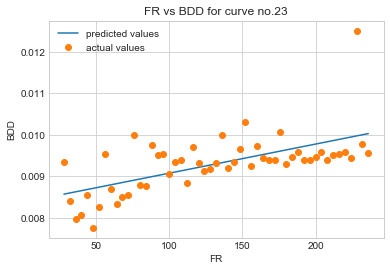

Equation of the line of best fit for curve no. 23: BDD_pred = 7.018194959283283e-06*FR + 0.008372972516246182
The correlation coeffcient for FR and BDD is equal to r =0.6128346064019583
The Mean-Squared Error is equal to 3.066101293212821e-07


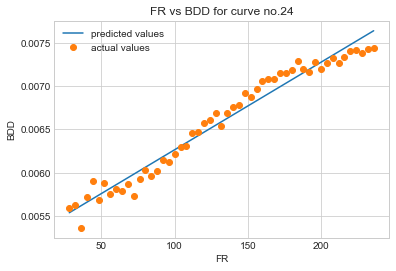

Equation of the line of best fit for curve no. 24: BDD_pred = 1.010714966521487e-05*FR + 0.005255231484690186
The correlation coeffcient for FR and BDD is equal to r =0.9825221557058013
The Mean-Squared Error is equal to 1.3728226759770556e-08


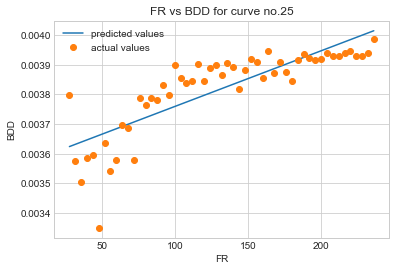

Equation of the line of best fit for curve no. 25: BDD_pred = 1.8809124972180339e-06*FR + 0.0035712555254709265
The correlation coeffcient for FR and BDD is equal to r =0.8198583419388074
The Mean-Squared Error is equal to 6.460217260311655e-09


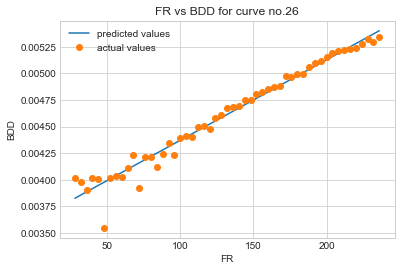

Equation of the line of best fit for curve no. 26: BDD_pred = 7.5816809726851495e-06*FR + 0.003612784848332936
The correlation coeffcient for FR and BDD is equal to r =0.9830231133224733
The Mean-Squared Error is equal to 7.497650968391574e-09


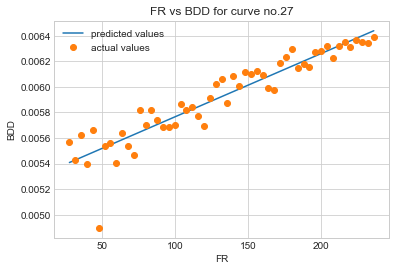

Equation of the line of best fit for curve no. 27: BDD_pred = 4.958610566078378e-06*FR + 0.005269552317467457
The correlation coeffcient for FR and BDD is equal to r =0.9276647050638416
The Mean-Squared Error is equal to 1.4916108326283574e-08


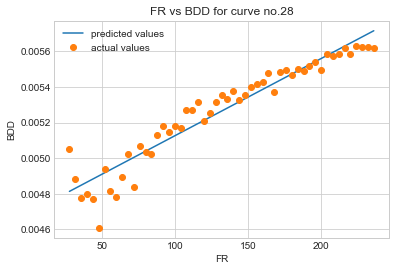

Equation of the line of best fit for curve no. 28: BDD_pred = 4.342450946133897e-06*FR + 0.004691778899781925
The correlation coeffcient for FR and BDD is equal to r =0.9538668192830889
The Mean-Squared Error is equal to 6.994208184740595e-09


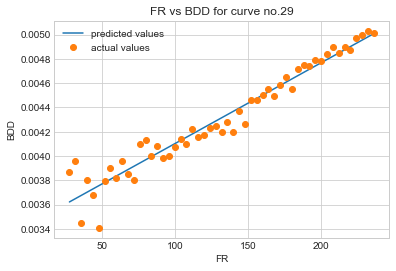

Equation of the line of best fit for curve no. 29: BDD_pred = 6.66279594939115e-06*FR + 0.003434840907387267
The correlation coeffcient for FR and BDD is equal to r =0.9692730166107103
The Mean-Squared Error is equal to 1.0704896596373613e-08


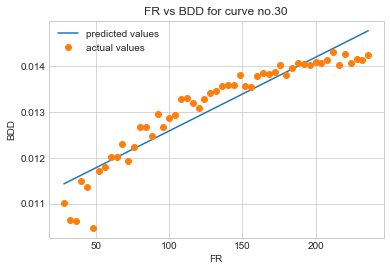

Equation of the line of best fit for curve no. 30: BDD_pred = 1.6103341588875595e-05*FR + 0.010981194057432354
The correlation coeffcient for FR and BDD is equal to r =0.9319133648419011
The Mean-Squared Error is equal to 1.470504268311818e-07


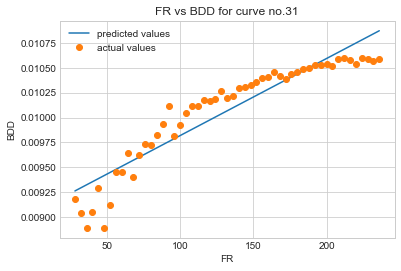

Equation of the line of best fit for curve no. 31: BDD_pred = 7.736761923758012e-06*FR + 0.009045545698594714
The correlation coeffcient for FR and BDD is equal to r =0.9311758839271947
The Mean-Squared Error is equal to 3.435210368475695e-08


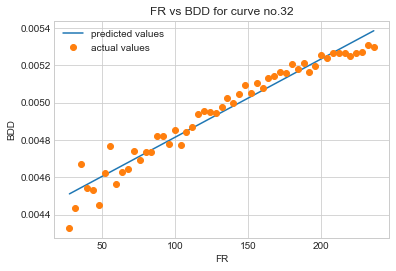

Equation of the line of best fit for curve no. 32: BDD_pred = 4.202214870075773e-06*FR + 0.004393478387905829
The correlation coeffcient for FR and BDD is equal to r =0.9741068670099436
The Mean-Squared Error is equal to 3.561511916621073e-09


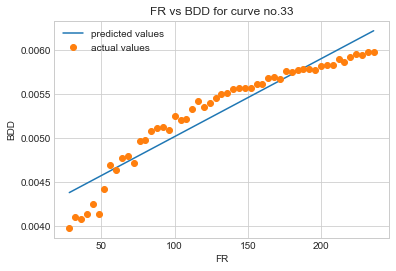

Equation of the line of best fit for curve no. 33: BDD_pred = 8.839643652306051e-06*FR + 0.004136369525099976
The correlation coeffcient for FR and BDD is equal to r =0.9474011239224613
The Mean-Squared Error is equal to 3.3386388696588716e-08


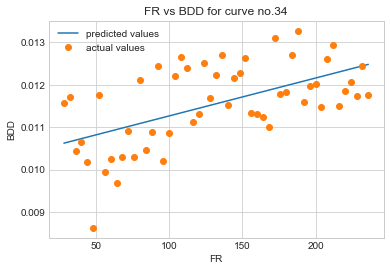

Equation of the line of best fit for curve no. 34: BDD_pred = 8.924245584996507e-06*FR + 0.010372967445841865
The correlation coeffcient for FR and BDD is equal to r =0.5717714050098311
The Mean-Squared Error is equal to 6.13902002031339e-07


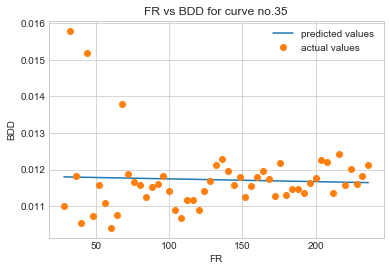

Equation of the line of best fit for curve no. 35: BDD_pred = -7.547279346971409e-07*FR + 0.011823501785530037
The correlation coeffcient for FR and BDD is equal to r =-0.04972620212751553
The Mean-Squared Error is equal to 8.60341554825535e-07


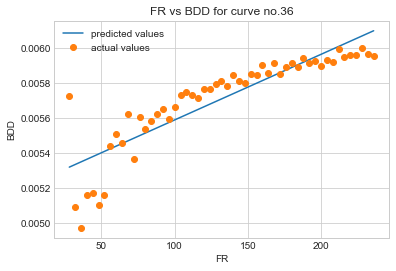

Equation of the line of best fit for curve no. 36: BDD_pred = 3.738348769728816e-06*FR + 0.005214206371071309
The correlation coeffcient for FR and BDD is equal to r =0.871780024328845
The Mean-Squared Error is equal to 1.6523123323819175e-08


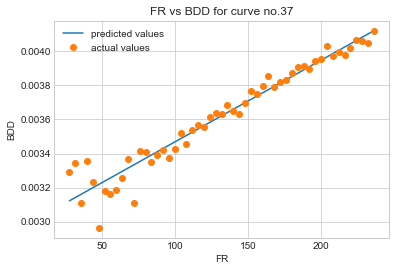

Equation of the line of best fit for curve no. 37: BDD_pred = 4.804024940799831e-06*FR + 0.0029876231833630847
The correlation coeffcient for FR and BDD is equal to r =0.9691311314407338
The Mean-Squared Error is equal to 5.592121612252199e-09


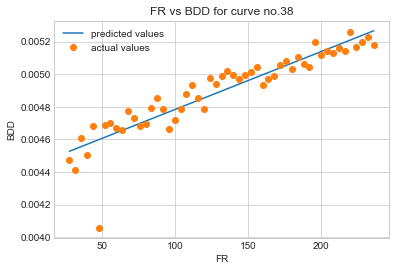

Equation of the line of best fit for curve no. 38: BDD_pred = 3.5562848723244644e-06*FR + 0.004427082835679777
The correlation coeffcient for FR and BDD is equal to r =0.9127165607062346
The Mean-Squared Error is equal to 9.489417018917239e-09


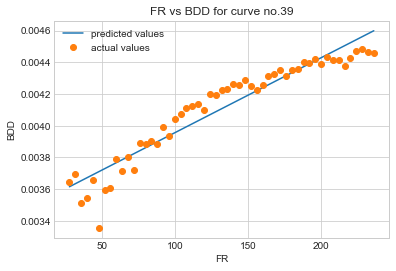

Equation of the line of best fit for curve no. 39: BDD_pred = 4.7280377593052425e-06*FR + 0.0034831743713505457
The correlation coeffcient for FR and BDD is equal to r =0.9512494876753717
The Mean-Squared Error is equal to 8.798341748710008e-09


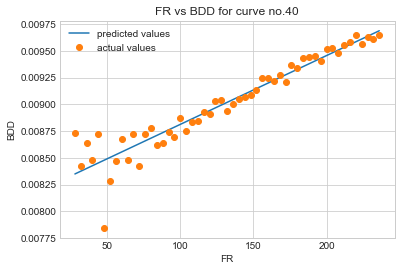

Equation of the line of best fit for curve no. 40: BDD_pred = 6.427399290685805e-06*FR + 0.008169916848404783
The correlation coeffcient for FR and BDD is equal to r =0.9470965914484152
The Mean-Squared Error is equal to 1.7761882992438484e-08


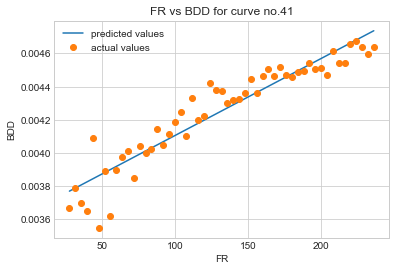

Equation of the line of best fit for curve no. 41: BDD_pred = 4.6455436534300315e-06*FR + 0.0036405027862353805
The correlation coeffcient for FR and BDD is equal to r =0.9403137270198921
The Mean-Squared Error is equal to 1.0583024357651914e-08


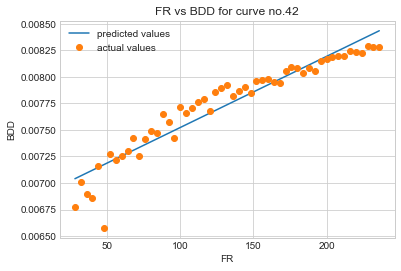

Equation of the line of best fit for curve no. 42: BDD_pred = 6.694852491731195e-06*FR + 0.00685339026033506
The correlation coeffcient for FR and BDD is equal to r =0.9484399798734062
The Mean-Squared Error is equal to 1.8741237764044085e-08


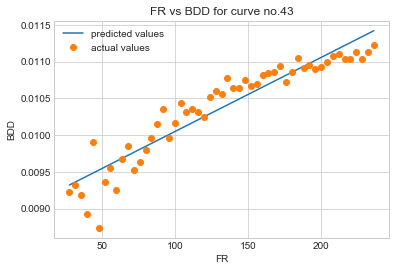

Equation of the line of best fit for curve no. 43: BDD_pred = 1.0083901111489126e-05*FR + 0.009039038719952742
The correlation coeffcient for FR and BDD is equal to r =0.9380566723516744
The Mean-Squared Error is equal to 5.193927069543545e-08


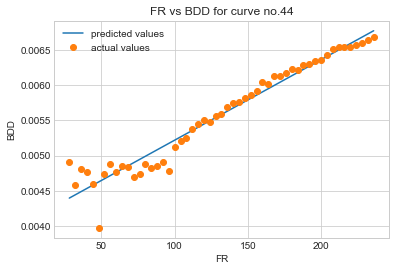

Equation of the line of best fit for curve no. 44: BDD_pred = 1.144549995326301e-05*FR + 0.004074746622721578
The correlation coeffcient for FR and BDD is equal to r =0.9732594177289486
The Mean-Squared Error is equal to 2.732141513066245e-08


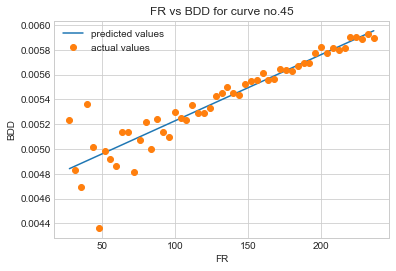

Equation of the line of best fit for curve no. 45: BDD_pred = 5.346114573062098e-06*FR + 0.0046914841934932805
The correlation coeffcient for FR and BDD is equal to r =0.9238774755494161
The Mean-Squared Error is equal to 1.8360064319880306e-08


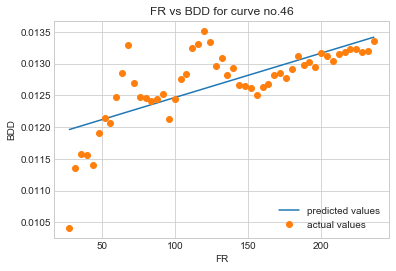

Equation of the line of best fit for curve no. 46: BDD_pred = 6.986837006786026e-06*FR + 0.01176571385905145
The correlation coeffcient for FR and BDD is equal to r =0.7178684419020009
The Mean-Squared Error is equal to 1.7188932616617103e-07


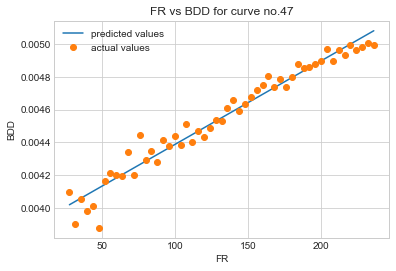

Equation of the line of best fit for curve no. 47: BDD_pred = 5.103387153097746e-06*FR + 0.003876404139541023
The correlation coeffcient for FR and BDD is equal to r =0.9783157821764712
The Mean-Squared Error is equal to 4.3705302425092044e-09


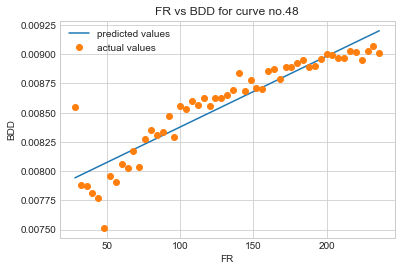

Equation of the line of best fit for curve no. 48: BDD_pred = 6.050577789888367e-06*FR + 0.007773117852866416
The correlation coeffcient for FR and BDD is equal to r =0.9191048815461095
The Mean-Squared Error is equal to 2.5189550501636918e-08


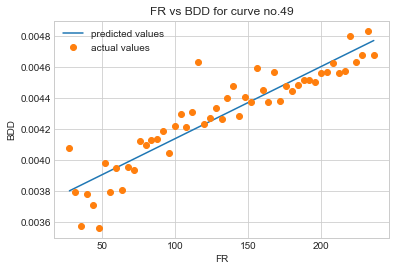

Equation of the line of best fit for curve no. 49: BDD_pred = 4.6546153586897985e-06*FR + 0.0036708060507130097
The correlation coeffcient for FR and BDD is equal to r =0.9200895148872624
The Mean-Squared Error is equal to 1.4701732500238512e-08
[ 0.92555676  0.7675842   0.41737807  0.88562093  0.94521433  0.05257161
  0.92942029  0.30223119  0.92615548  0.97205144  0.94258104  0.80004409
  0.68135888  0.9156263   0.97564932  0.96344869  0.98221817  0.96188295
  0.94448536  0.93643791  0.98483322  0.50038794  0.89767428  0.61283461
  0.98252216  0.81985834  0.98302311  0.92766471  0.95386682  0.96927302
  0.93191336  0.93117588  0.97410687  0.94740112  0.57177141 -0.0497262
  0.87178002  0.96913113  0.91271656  0.95124949  0.94709659  0.94031373
  0.94843998  0.93805667  0.97325942  0.92387748  0.71786844  0.97831578
  0.91910488  0.92008951]
[1.47186442e-08 3.71434322e-08 1.28184338e-07 1.77366336e-07
 2.77568205e-08 7.34076691e-07 1.22607631e-08 3.50209562e-07
 1.15018217e-08 5.37810

In [42]:
for i in range(50):
    fitLinearRegression(i)
    
print(r_values_lin)
print(mse_values_lin)

(0.0, 30.0)

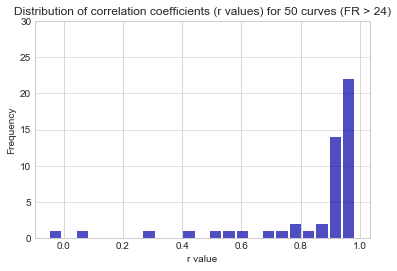

In [43]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values_lin, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves (FR > 24)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [44]:
#TRY 1/X REGRESSION

r_values = np.zeros(50)
mse_values = np.zeros(50)
m_values = np.zeros(50)
c_values = np.zeros(50)
# where y = mx + c / we want to store the gradient values to analyse them later

def fitInvRegression(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    one_over_BDD = 1/BDD #log-y-axis
    curve_fit = np.polyfit(FR, one_over_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, one_over_BDD, "o", label = 'actual values')
    plt.title("FR vs 1/BDD for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('1/BDD')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    one_over_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'one_over_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, one_over_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and 1/(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(one_over_BDD, one_over_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse
    
#store gradient value and c-value
    m_values[curve]= curve_fit[0]
    c_values[curve]= curve_fit[1]

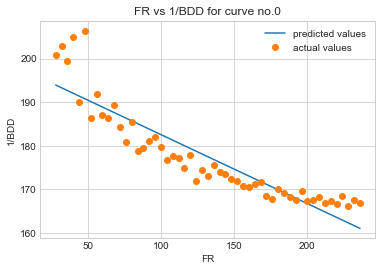

Equation of the line of best fit for curve no. 0: one_over_BDD_pred = -0.1582968333208741*FR + 198.36521493289342
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9039167622169386
The Mean-Squared Error is equal to 21.004821773082877


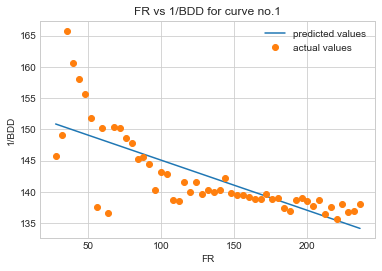

Equation of the line of best fit for curve no. 1: one_over_BDD_pred = -0.0803138756711019*FR + 153.107962963817
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.7516834015046142
The Mean-Squared Error is equal to 18.591244075334313


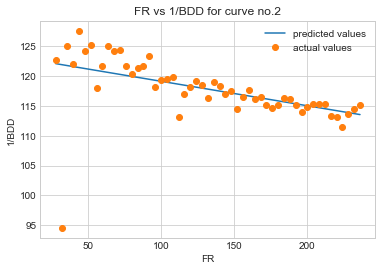

Equation of the line of best fit for curve no. 2: one_over_BDD_pred = -0.04114350106305418*FR + 123.26964121388106
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.5040362900846592
The Mean-Squared Error is equal to 18.6089955553362


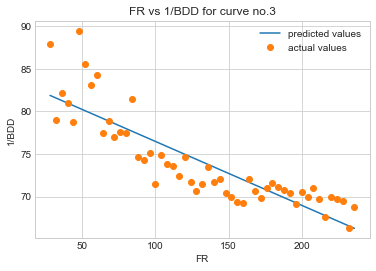

Equation of the line of best fit for curve no. 3: one_over_BDD_pred = -0.07498173330962281*FR + 83.97796512108226
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8631970872340511
The Mean-Squared Error is equal to 7.2008041615204865


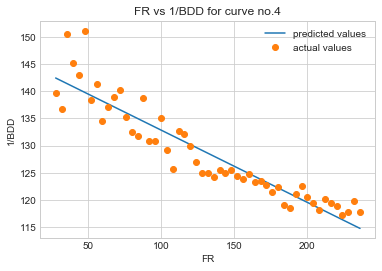

Equation of the line of best fit for curve no. 4: one_over_BDD_pred = -0.13295432331651316*FR + 146.1440839880364
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9285669336652588
The Mean-Squared Error is equal to 10.574220166946533


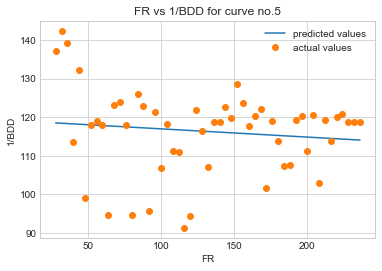

Equation of the line of best fit for curve no. 5: one_over_BDD_pred = -0.02135078511962909*FR + 119.11436903549834
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.12043672610467374
The Mean-Squared Error is equal to 115.95783007282517


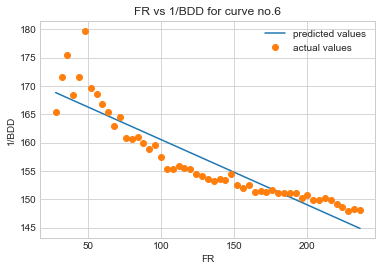

Equation of the line of best fit for curve no. 6: one_over_BDD_pred = -0.11519271343167024*FR + 172.0516838311598
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9118242768182908
The Mean-Squared Error is equal to 10.073039977995132


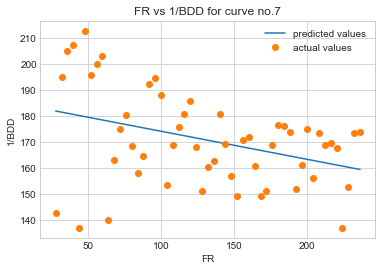

Equation of the line of best fit for curve no. 7: one_over_BDD_pred = -0.10799762629206404*FR + 184.9124695153859
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.3670407416912857
The Mean-Squared Error is equal to 280.4742060540909


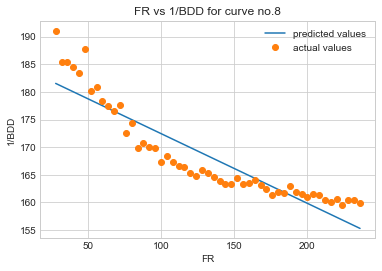

Equation of the line of best fit for curve no. 8: one_over_BDD_pred = -0.12612698507652056*FR + 185.0649458958891
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9117671405723747
The Mean-Squared Error is equal to 12.085074800168876


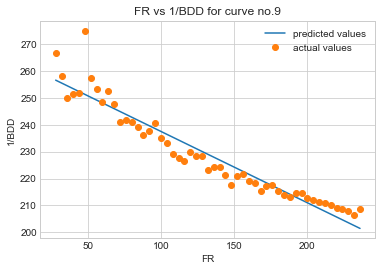

Equation of the line of best fit for curve no. 9: one_over_BDD_pred = -0.2653839983732557*FR + 264.048274345535
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9552788138714929
The Mean-Squared Error is equal to 25.2666126384954


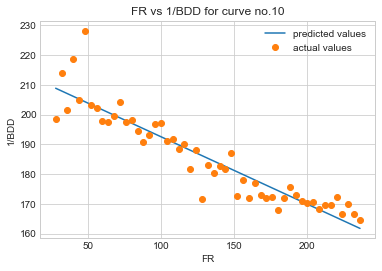

Equation of the line of best fit for curve no. 10: one_over_BDD_pred = -0.22660038553477008*FR + 215.21961975097324
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9268055044753326
The Mean-Squared Error is equal to 31.56430419448582


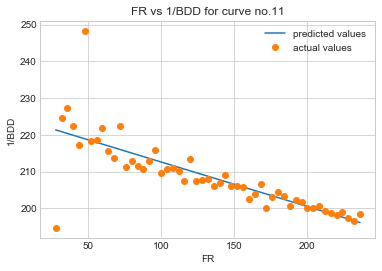

Equation of the line of best fit for curve no. 11: one_over_BDD_pred = -0.12119039388111322*FR + 224.7486969530826
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.7801430582126568
The Mean-Squared Error is equal to 35.36053480461641


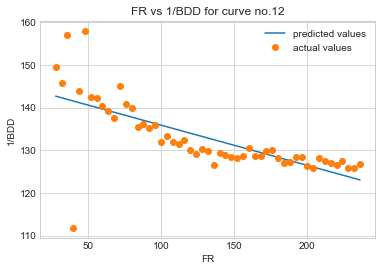

Equation of the line of best fit for curve no. 12: one_over_BDD_pred = -0.09442971387483692*FR + 145.33900019075728
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.7050369468585964
The Mean-Squared Error is equal to 33.77776026390289


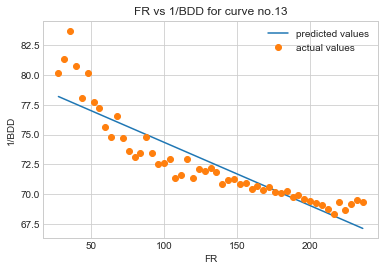

Equation of the line of best fit for curve no. 13: one_over_BDD_pred = -0.05311357065148422*FR + 79.6733292599881
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8963227341266687
The Mean-Squared Error is equal to 2.5847217701853427


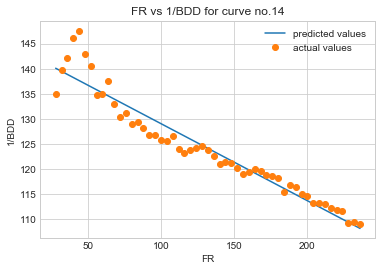

Equation of the line of best fit for curve no. 14: one_over_BDD_pred = -0.15346361894856075*FR + 144.395010199811
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9604967251907123
The Mean-Squared Error is equal to 7.402086487397131


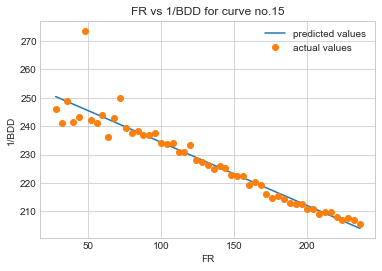

Equation of the line of best fit for curve no. 15: one_over_BDD_pred = -0.22343074582337116*FR + 256.6846453565932
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9477347612978736
The Mean-Squared Error is equal to 21.18316474069467


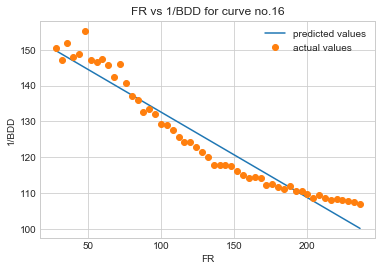

Equation of the line of best fit for curve no. 16: one_over_BDD_pred = -0.23904094295354705*FR + 156.5118313554107
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9672300199880509
The Mean-Squared Error is equal to 14.741857598029842


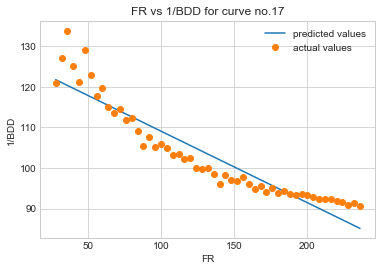

Equation of the line of best fit for curve no. 17: one_over_BDD_pred = -0.17598376231701687*FR + 126.65807485066783
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9348262293055327
The Mean-Squared Error is equal to 16.73146896762679


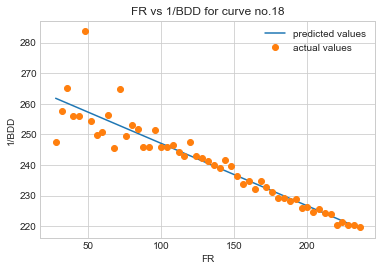

Equation of the line of best fit for curve no. 18: one_over_BDD_pred = -0.20460432018854763*FR + 267.5383494223623
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9285117577595876
The Mean-Squared Error is equal to 25.06383562669368


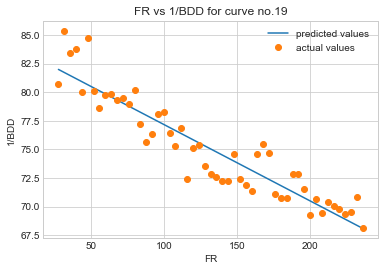

Equation of the line of best fit for curve no. 19: one_over_BDD_pred = -0.06685676303144436*FR + 83.86369312115238
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.928845097641621
The Mean-Squared Error is equal to 2.6622088549732585


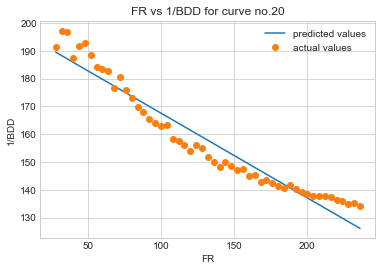

Equation of the line of best fit for curve no. 20: one_over_BDD_pred = -0.3047404029836689*FR + 198.04057062345666
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9667275143217108
The Mean-Squared Error is equal to 24.345415822796237


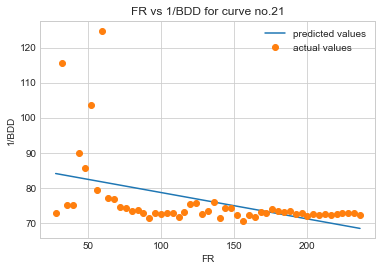

Equation of the line of best fit for curve no. 21: one_over_BDD_pred = -0.07530645271782957*FR + 86.16174538643173
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.4546945668519261
The Mean-Squared Error is equal to 81.46523854932086


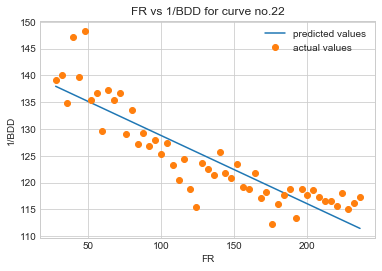

Equation of the line of best fit for curve no. 22: one_over_BDD_pred = -0.12759252944106705*FR + 141.5442355752129
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8850329584647316
The Mean-Squared Error is equal to 16.86396724170884


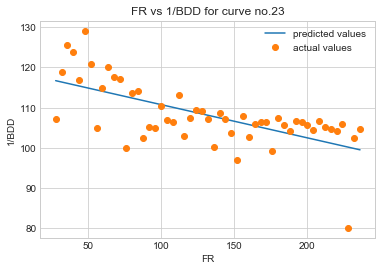

Equation of the line of best fit for curve no. 23: one_over_BDD_pred = -0.08275929172854696*FR + 119.03750523017581
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.6487197976264896
The Mean-Squared Error is equal to 35.29031979485308


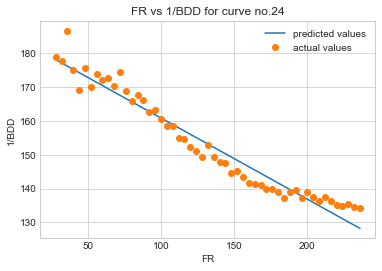

Equation of the line of best fit for curve no. 24: one_over_BDD_pred = -0.23987484832035727*FR + 184.8591966136406
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9734801246022116
The Mean-Squared Error is equal to 11.897489340696854


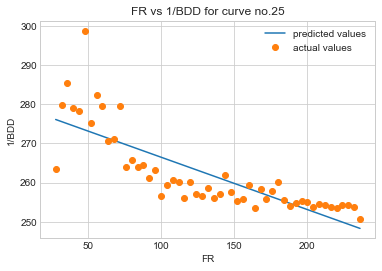

Equation of the line of best fit for curve no. 25: one_over_BDD_pred = -0.13363304411536167*FR + 279.8254621466225
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8027514992129099
The Mean-Squared Error is equal to 36.893587611425


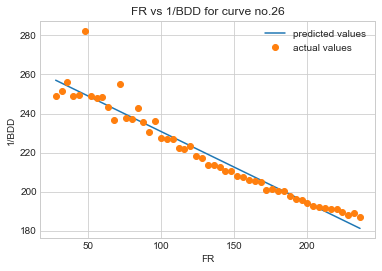

Equation of the line of best fit for curve no. 26: one_over_BDD_pred = -0.3650570269222465*FR + 267.2900262530737
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9670889939716566
The Mean-Squared Error is equal to 34.537392810811596


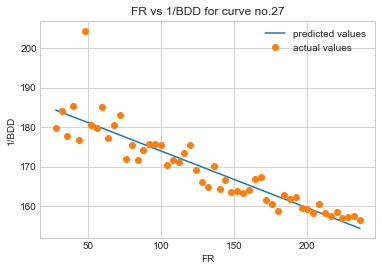

Equation of the line of best fit for curve no. 27: one_over_BDD_pred = -0.1440195164748458*FR + 188.34908676564666
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9044985609253279
The Mean-Squared Error is equal to 17.264473608713633


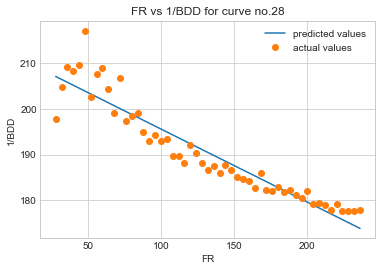

Equation of the line of best fit for curve no. 28: one_over_BDD_pred = -0.16006160617366133*FR + 211.61265047826657
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.940253412423948
The Mean-Squared Error is equal to 12.577429923499091


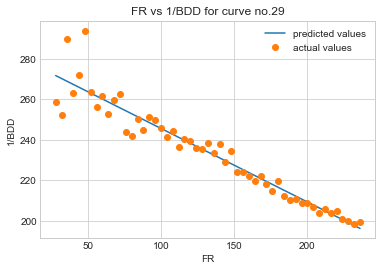

Equation of the line of best fit for curve no. 29: one_over_BDD_pred = -0.362377945307697*FR + 281.8679795000307
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9556278186336237
The Mean-Squared Error is equal to 46.717411863412266


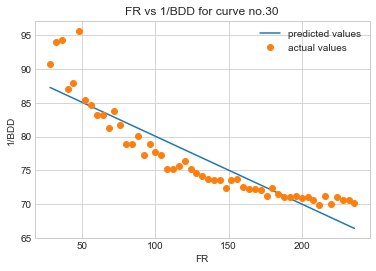

Equation of the line of best fit for curve no. 30: one_over_BDD_pred = -0.1000896769249937*FR + 90.05357613721603
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9020117511381781
The Mean-Squared Error is equal to 8.591662652343523


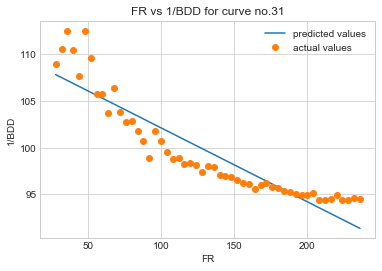

Equation of the line of best fit for curve no. 31: one_over_BDD_pred = -0.07921066937908389*FR + 110.05927113586131
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.915704298126106
The Mean-Squared Error is equal to 4.524041770907598


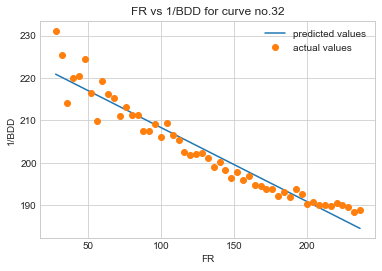

Equation of the line of best fit for curve no. 32: one_over_BDD_pred = -0.17509124199862874*FR + 225.7990668484512
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.963799066961725
The Mean-Squared Error is equal to 8.784327061411854


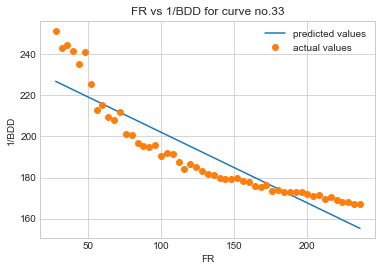

Equation of the line of best fit for curve no. 33: one_over_BDD_pred = -0.344150382118173*FR + 236.47040440121577
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.909635251794985
The Mean-Squared Error is equal to 92.47987905024391


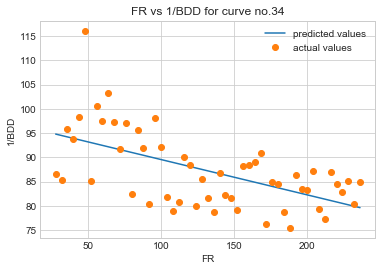

Equation of the line of best fit for curve no. 34: one_over_BDD_pred = -0.07288647855750965*FR + 96.83162092041269
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.5736941228495667
The Mean-Squared Error is equal to 40.54250861790062


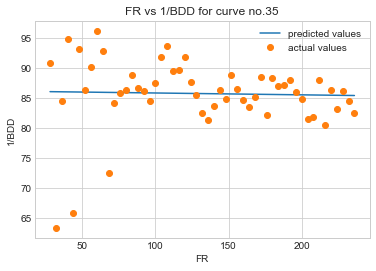

Equation of the line of best fit for curve no. 35: one_over_BDD_pred = -0.0030839935083728193*FR + 86.15813449353963
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.03251426908185724
The Mean-Squared Error is equal to 33.647700532469976


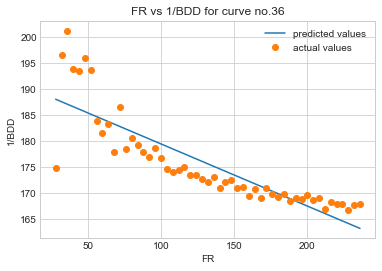

Equation of the line of best fit for curve no. 36: one_over_BDD_pred = -0.11959739877592653*FR + 191.3845309505667
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8510835159734738
The Mean-Squared Error is equal to 20.379979227530832


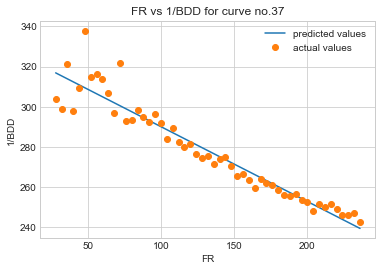

Equation of the line of best fit for curve no. 37: one_over_BDD_pred = -0.3724998126769927*FR + 327.2720244857584
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9545486391182925
The Mean-Squared Error is equal to 50.650671263535386


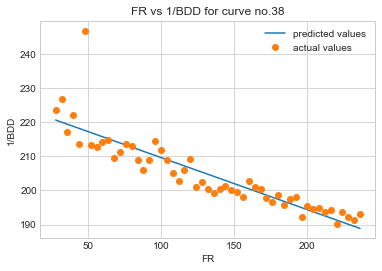

Equation of the line of best fit for curve no. 38: one_over_BDD_pred = -0.15235169810992927*FR + 224.8495170026771
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8833761835930201
The Mean-Squared Error is equal to 24.460390692414528


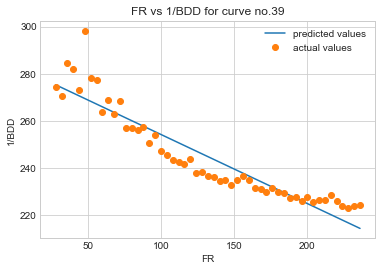

Equation of the line of best fit for curve no. 39: one_over_BDD_pred = -0.2927356872642564*FR + 283.5330665967753
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9306554681284752
The Mean-Squared Error is equal to 49.59367754011191


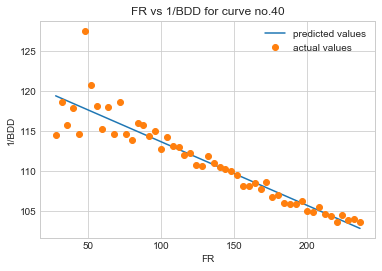

Equation of the line of best fit for curve no. 40: one_over_BDD_pred = -0.07958351635604316*FR + 121.6299975929201
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9336129174610905
The Mean-Squared Error is equal to 3.4922192898545776


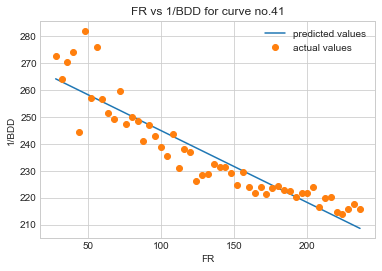

Equation of the line of best fit for curve no. 41: one_over_BDD_pred = -0.26721876061850697*FR + 271.62139851228983
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9198014792581395
The Mean-Squared Error is equal to 48.652392668003806


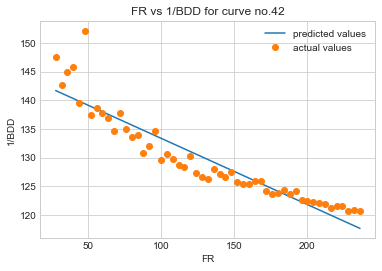

Equation of the line of best fit for curve no. 42: one_over_BDD_pred = -0.11565482934454119*FR + 144.93832747867523
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9283317998825603
The Mean-Squared Error is equal to 8.030917978416635


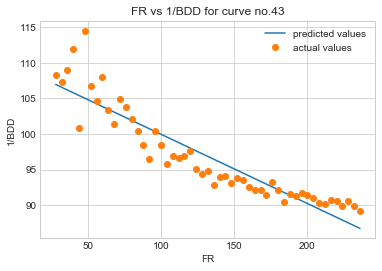

Equation of the line of best fit for curve no. 43: one_over_BDD_pred = -0.09744573492214616*FR + 109.70450115395872
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9190282165122793
The Mean-Squared Error is equal to 6.540619507092396


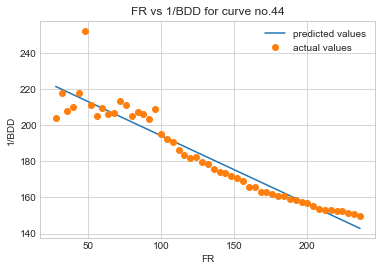

Equation of the line of best fit for curve no. 44: one_over_BDD_pred = -0.3778024137504345*FR + 232.00838498999173
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9516790561570309
The Mean-Squared Error is equal to 55.645248133237025


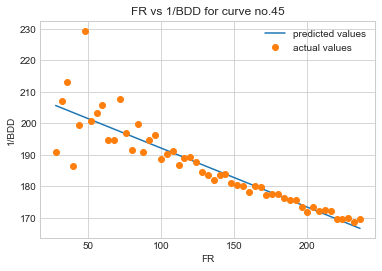

Equation of the line of best fit for curve no. 45: one_over_BDD_pred = -0.18769840040064795*FR + 210.8950354943095
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.8969665865210632
The Mean-Squared Error is equal to 32.043667904693734


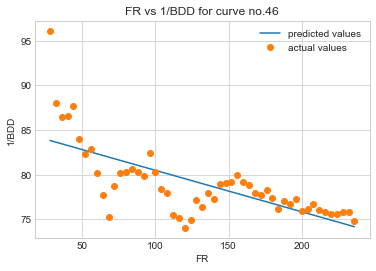

Equation of the line of best fit for curve no. 46: one_over_BDD_pred = -0.04641160625835079*FR + 85.12993250299316
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.7036490178574578
The Mean-Squared Error is equal to 8.22362626357387


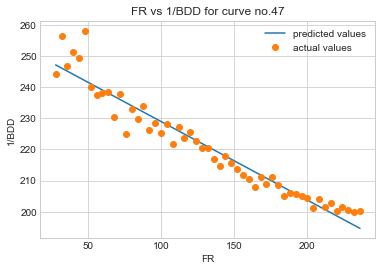

Equation of the line of best fit for curve no. 47: one_over_BDD_pred = -0.2520504255216625*FR + 254.16497165400662
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9664824409863231
The Mean-Squared Error is equal to 16.78360420017387


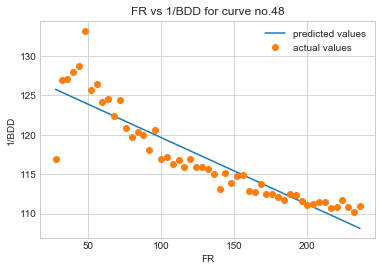

Equation of the line of best fit for curve no. 48: one_over_BDD_pred = -0.08460575629188595*FR + 128.09844059348714
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.904047317692469
The Mean-Squared Error is equal to 5.990846563887972


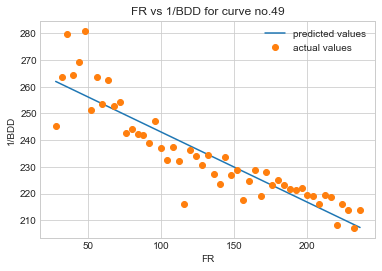

Equation of the line of best fit for curve no. 49: one_over_BDD_pred = -0.2629739131709668*FR + 269.35564013051845
The correlation coeffcient for FR and 1/(BDD) is equal to r =-0.9031112930489869
The Mean-Squared Error is equal to 58.53504792365444
[-0.90391676 -0.7516834  -0.50403629 -0.86319709 -0.92856693 -0.12043673
 -0.91182428 -0.36704074 -0.91176714 -0.95527881 -0.9268055  -0.78014306
 -0.70503695 -0.89632273 -0.96049673 -0.94773476 -0.96723002 -0.93482623
 -0.92851176 -0.9288451  -0.96672751 -0.45469457 -0.88503296 -0.6487198
 -0.97348012 -0.8027515  -0.96708899 -0.90449856 -0.94025341 -0.95562782
 -0.90201175 -0.9157043  -0.96379907 -0.90963525 -0.57369412 -0.03251427
 -0.85108352 -0.95454864 -0.88337618 -0.93065547 -0.93361292 -0.91980148
 -0.9283318  -0.91902822 -0.95167906 -0.89696659 -0.70364902 -0.96648244
 -0.90404732 -0.90311129]
[ 21.00482177  18.59124408  18.60899556   7.20080416  10.57422017
 115.95783007  10.07303998 280.47420605  12.0850748   25.26661264
  31.56430

In [45]:
for i in range(50):
    fitInvRegression(i)
    
print(r_values)
print(mse_values)